# Data Wrangling Showcase

### Context
This project is part of my Data Wrangling module assignment. The primary problem statement of this project is for me to predict the driver's ranking on the Formula 1 grand prix, given selected factors, such as the time of race, constructor history & characteristics, driver history & characteristics, and qualifying performance.

### Results
After data wrangling and building a simple Linear Regression model to predict ranking, I achieved a Mean Absolute Error (MAE) of 1.92 ranks and a Root Mean Squared Error (RMSE) of 2.56 ranks.

### Further information
The code may be found in part 1 of this Jupyter Notebook, whereas the detailed report may be found in part 2 of this Jupyter Notebook. Datasets are also provided in the GitHub Repository.

### This Jupyter Workbook comprises of 2 sections:
#### 1. [Assignment part 1: Code](#section1)
#### 2. [Assignment part 2: Report](#section2)

# Assignment part 1: Code <a id="section1"></a>

In [4]:
# Import the necessary packages.

# Base data wrangling packages.
import pandas as pd
import numpy as np

# sklearn packages.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# feature_engine packages.
from feature_engine.discretisation import EqualFrequencyDiscretiser
from feature_engine.transformation import YeoJohnsonTransformer, LogTransformer, BoxCoxTransformer, ReciprocalTransformer

# Other packages.
import scipy.stats as stats
import statsmodels.api as sm

# Visualisation packages.
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Problem Formulation
### 1.1. Tables selected & Exploratory Data Analysis

Start off by importing the races table. See the range of raceId, and the count of nulls of this table.

In [7]:
# Import races. Display shape and subset of data.
df_races = pd.read_csv('./f1db_csv_mod/races_mod.csv')
print(df_races.shape)
df_races.head()

(1080, 7)


raceId  round  circuitId                   name       date      time  \
0       1      1          1  Australian Grand Prix  3/29/2009   6:00:00   
1       2      2          2   Malaysian Grand Prix  4/5/12009   9:00:00   
2       3      3         17     Chinese Grand Prix  4/19/2009   7:00:00   
3       4      4          3     Bahrain Grand Prix  4/26/2009  12:00:00   
4       5      5          4     Spanish Grand Prix  5/10/2009  12:00:00   

                                                 url  
0  http://en.wikipedia.org/wiki/2009_Australian_G...  
1  http://en.wikipedia.org/wiki/2009_Malaysian_Gr...  
2  http://en.wikipedia.org/wiki/2009_Chinese_Gran...  
3  http://en.wikipedia.org/wiki/2009_Bahrain_Gran...  
4  http://en.wikipedia.org/wiki/2009_Spanish_Gran...

In [8]:
# Display number of unique raceId.
print(f'No. of unique RaceId: {df_races['raceId'].nunique()}, starting {df_races['raceId'].min()} & ending {df_races['raceId'].max()}')

No. of unique RaceId: 1080, starting 1 & ending 1096


In [9]:
df_races.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   raceId     1080 non-null   int64 
 1   round      1080 non-null   int64 
 2   circuitId  1080 non-null   int64 
 3   name       1080 non-null   object
 4   date       1070 non-null   object
 5   time       1080 non-null   object
 6   url        1080 non-null   object
dtypes: int64(3), object(4)
memory usage: 59.2+ KB


Explore the nulls in date, and `\N` values in time. 10 records don't have date, 731 records don't have time.

In [11]:
# Display records where date is null.
df_races[df_races['date'].isnull()]

raceId  round  circuitId                      name date      time  \
26        27     10         10         German Grand Prix  NaN  12:00:00   
68        69     17         22       Japanese Grand Prix  NaN  14:00:00   
104      105     16         17        Chinese Grand Prix  NaN        \N   
897      900      1          1     Australian Grand Prix  NaN   6:00:00   
914      917     18         18      Brazilian Grand Prix  NaN  16:00:00   
935      948      1          1     Australian Grand Prix  NaN   5:00:00   
948      961     14         14        Italian Grand Prix  NaN  12:00:00   
978      991      3         17        Chinese Grand Prix  NaN   6:10:00   
1015    1028     19         69  United States Grand Prix  NaN  19:10:00   
1047    1062     11         11      Hungarian Grand Prix  NaN  13:00:00   

                                                    url  
26    http://en.wikipedia.org/wiki/2008_German_Grand...  
68    http://en.wikipedia.org/wiki/2006_Japanese_Gra...  
104   http://en.wikipedia.org/wiki/2004_Chinese_Gran...  
897   https://en.wikipedia.org/wiki/2014_Australian_...  
914   http://en.wikipedia.org/wiki/2014_Brazilian_Gr...  
935   https://en.wikipedia.org/wiki/2016_Australian_...  
948   https://en.wikipedia.org/wiki/2016_Italian_Gra...  
978   https://en.wikipedia.org/wiki/2018_Chinese_Gra...  
1015  https://en.wikipedia.org/wiki/2019_United_Stat...  
1047  http://en.wikipedia.org/wiki/2021_Hungarian_Gr...

In [12]:
# Display records where time holds \N value.
df_races[df_races['time']=='\\N']

raceId  round  circuitId                   name       date time  \
89       90      1          1  Australian Grand Prix   3/7/2004   \N   
90       91      2          2   Malaysian Grand Prix  3/21/2004   \N   
91       92      3          3     Bahrain Grand Prix   4/4/2004   \N   
92       93      4         21  San Marino Grand Prix  4/25/2004   \N   
93       94      5          4     Spanish Grand Prix   5/9/2004   \N   
..      ...    ...        ...                    ...        ...  ...   
834     835      3         19       Indianapolis 500  5/30/1950   \N   
835     836      4         66       Swiss Grand Prix   6/4/1950   \N   
836     837      5         13     Belgian Grand Prix  6/18/1950   \N   
837     838      6         55      French Grand Prix   7/2/1950   \N   
838     839      7         14     Italian Grand Prix   9/3/1950   \N   

                                                   url  
89   http://en.wikipedia.org/wiki/2004_Australian_G...  
90   http://en.wikipedia.org/wiki/2004_Malaysian_Gr...  
91   http://en.wikipedia.org/wiki/2004_Bahrain_Gran...  
92   http://en.wikipedia.org/wiki/2004_San_Marino_G...  
93   http://en.wikipedia.org/wiki/2004_Spanish_Gran...  
..                                                 ...  
834  http://en.wikipedia.org/wiki/1950_Indianapolis...  
835  http://en.wikipedia.org/wiki/1950_Swiss_Grand_...  
836  http://en.wikipedia.org/wiki/1950_Belgian_Gran...  
837  http://en.wikipedia.org/wiki/1950_French_Grand...  
838  http://en.wikipedia.org/wiki/1950_Italian_Gran...  

[731 rows x 7 columns]

Now explore the qualifying table. The only columns with nulls are `q1`, `q2` and `q3`.

In [14]:
# Import qualifying table, displying its shape and subset of the data.
df_qualifying = pd.read_csv('./f1db_csv_mod/qualifying_mod.csv')
print(df_qualifying.shape)
df_qualifying.head(10)

(9135, 9)


qualifyId  raceId  driverId  constructorId  number  position        q1  \
0          1      18         1              1      22         1  1:26.572   
1          2      18         9              2       4         2  1:26.103   
2          3      18         5              1      23         3  1:25.664   
3          4      18        13              6       2         4  1:25.994   
4          5      18         2              2       3         5  1:25.960   
5          6      18        15              7      11         6  1:26.427   
6          7      18         3              3       7         7  1:26.295   
7          8      18        14              9       9         8  1:26.381   
8          9      18        10              7      12         9  1:26.919   
9         10      18        20              5      15        10  1:26.702   

         q2        q3  
0  1:25.187  1:26.714  
1  1:25.315  1:26.869  
2  1:25.452  1:27.079  
3  1:25.691  1:27.178  
4  1:25.518  1:27.236  
5  1:26.101  1:28.527  
6  1:26.059  1:28.687  
7  1:26.063  1:29.041  
8  1:26.164  1:29.593  
9  1:25.842        \N

In [15]:
df_qualifying.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9135 entries, 0 to 9134
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   qualifyId      9135 non-null   int64 
 1   raceId         9135 non-null   int64 
 2   driverId       9135 non-null   int64 
 3   constructorId  9135 non-null   int64 
 4   number         9135 non-null   int64 
 5   position       9135 non-null   int64 
 6   q1             9127 non-null   object
 7   q2             9001 non-null   object
 8   q3             8880 non-null   object
dtypes: int64(6), object(3)
memory usage: 642.4+ KB


Explore the ranges and count of the identifiers. There are only 426 races out of 1080 races in race table.

In [17]:
# Display number of unique values for identifiers.
for c in ['raceId', 'driverId', 'constructorId']:
    print(f'No. of unique {c}: {df_qualifying[c].nunique()}, starting {df_qualifying[c].min()} and ending {df_qualifying[c].max()}')

No. of unique raceId: 426, starting 1 and ending 1073
No. of unique driverId: 164, starting 1 and ending 854
No. of unique constructorId: 46, starting 1 and ending 214


Explore the number of times a unique driverId or constructorId can appear.

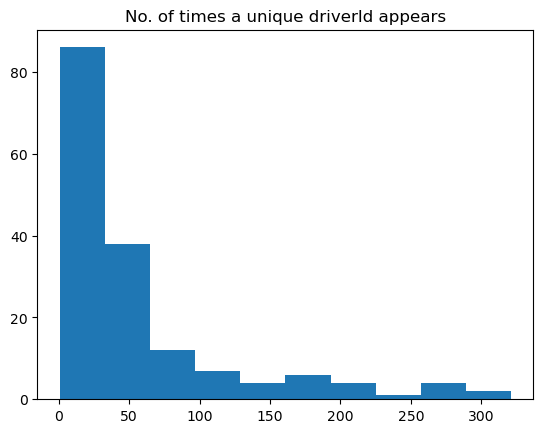

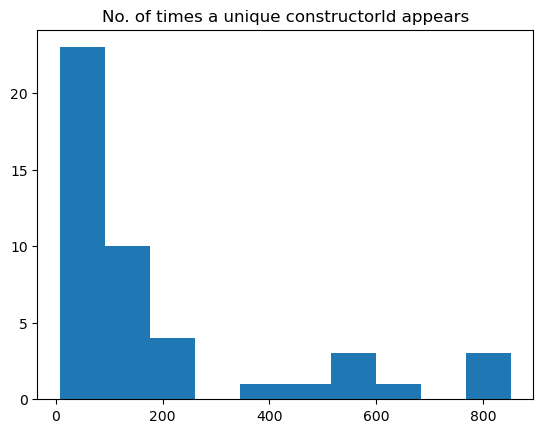

In [19]:
# Display number of times the identifier can appear.
for c in ['driverId', 'constructorId']:
    # temp_list contains the number of times an identifier has appeared (via value_counts()).
    temp_list = df_qualifying[c].value_counts().to_list()
    plt.hist(temp_list)
    plt.title(f'No. of times a unique {c} appears')
    plt.show()

Explore the reasons (if any) for nulls in `q1` to `q3`. It's noted that if a qualifying round doesn't have a value (e.g. `q1`), then subsequent qualifying rounds won't have a value (e.g. `q2` and `q3`).

In [21]:
# Display records where q1 is null.
df_qualifying[df_qualifying['q1'].isnull()]

qualifyId  raceId  driverId  constructorId  number  position   q1   q2  \
7401       7424     983        20              6       5        20  NaN  NaN   
7615       7639     993       843              5      28        20  NaN  NaN   
7632       7656     994       830              9      33        20  NaN  NaN   
7653       7677     995       154            210       8        20  NaN  NaN   
8012       8036    1013         8             51       7        19  NaN  NaN   
8013       8037    1013       842              9      10        20  NaN  NaN   
8153       8177    1020        20              6       5        20  NaN  NaN   
8233       8257    1024       817              4       3        20  NaN  NaN   

       q3  
7401  NaN  
7615  NaN  
7632  NaN  
7653  NaN  
8012  NaN  
8013  NaN  
8153  NaN  
8233  NaN

In [22]:
# Display records where q2 is null and the count.
print(f'No. of NaN \'q2\': {len(df_qualifying[df_qualifying['q2'].isnull()])}')
df_qualifying[df_qualifying['q2'].isnull()].sample(n=10, random_state=1)

No. of NaN 'q2': 134


qualifyId  raceId  driverId  constructorId  number  position        q1  \
7612       7636     993       828             15       9        17  1:19.493   
7534       7558     989       845              3      35        19  1:24.922   
8150       8174    1020       848              5      23        17  1:13.461   
3885       3887     114        14              1       5         6  1:15.700   
7811       7835    1003       825            210      20        16  1:39.644   
8230       8254    1024       154            210       8        17  1:40.277   
7711       7735     998       832              4      55        16  1:28.456   
3897       3899     114        50             18      19        18  1:18.706   
7651       7675     995       845              3      35        18  1:13.643   
8271       8295    1026       847              3      63        18  1:30.364   

       q2   q3  
7612  NaN  NaN  
7534  NaN  NaN  
8150  NaN  NaN  
3885  NaN  NaN  
7811  NaN  NaN  
8230  NaN  NaN  
7711  NaN  NaN  
3897  NaN  NaN  
7651  NaN  NaN  
8271  NaN  NaN

In [23]:
# Display records where q3 is null and the count.
print(f'No. of NaN \'q3\': {len(df_qualifying[df_qualifying['q3'].isnull()])}')
df_qualifying[df_qualifying['q3'].isnull()].sample(n=10, random_state=1)

No. of NaN 'q3': 255


qualifyId  raceId  driverId  constructorId  number  position        q1  \
8191       8215    1022       826              5      26        18  1:46.518   
7412       7435     983       154            210       8        16  1:33.308   
7752       7776    1000       815             10      11        19  1:19.200   
7806       7830    1003         4              1      14        11  1:39.022   
8325       8349    1029       817              4       3        12  1:09.086   
7749       7773    1000       838              1       2        16  1:18.782   
8009       8033    1013       807              4      27        16  1:43.427   
7375       7398     981       836             15      94        19  1:41.875   
8664       8705    1046       839              4      31        11  0:54.309   
8203       8227    1023         8             51       7        10  1:20.634   

            q2   q3  
8191       NaN  NaN  
7412       NaN  NaN  
7752       NaN  NaN  
7806  1:38.641  NaN  
8325  1:08.903  NaN  
7749       NaN  NaN  
8009       NaN  NaN  
7375       NaN  NaN  
8664  0:53.995  NaN  
8203  1:20.515  NaN

Apart from nulls, `\N` values are noted. They are present in around 67.50% of all rows.

In [25]:
# Display the number of \N in these columns.
for q in ['q1', 'q2', 'q3']:
    print(f'No. of \\N in {q}: {len(df_qualifying[df_qualifying[q]=='\\N'])}')

# incomplete_records is a dataframe with qualifying records where `q1`, `q2`, and/or `q3` contain `\N` and/or nulls.
incomplete_records = df_qualifying[((df_qualifying['q1']=='\\N') | (df_qualifying['q2']=='\\N') | 
                                    (df_qualifying['q3']=='\\N') | (df_qualifying['q1'].isnull()) | 
                                    (df_qualifying['q2'].isnull()) | (df_qualifying['q3'].isnull()))]

# Display the total counts and proportion of incomplete_records against qualifying.
print(f'\nTotal no. of records with \\N or NaN: {len(incomplete_records)}')
print(f'Proportion with \\N or NaN: {(len(incomplete_records) / len(df_qualifying)) * 100}%')

No. of \N in q1: 135
No. of \N in q2: 4164
No. of \N in q3: 5911

Total no. of records with \N or NaN: 6166
Proportion with \N or NaN: 67.49863163656266%


Now import the constructors table. No nulls are observed, and the number of unique constructorId matches the number of rows.

In [27]:
# Import constructors table, displaying its shape and subset of data.
df_constructor = pd.read_csv('./f1db_csv_mod/constructors_mod.csv')
print(df_constructor.shape)
df_constructor.head()

(211, 5)


constructorId constructorRef        name nationality  \
0              1        mclaren     McLaren     British   
1              2     bmw_sauber  BMW Sauber      German   
2              3       williams    Williams     British   
3              4        renault     Renault      French   
4              5     toro_rosso  Toro Rosso     Italian   

                                                 url  
0               http://en.wikipedia.org/wiki/McLaren  
1            http://en.wikipedia.org/wiki/BMW_Sauber  
2  http://en.wikipedia.org/wiki/Williams_Grand_Pr...  
3  http://en.wikipedia.org/wiki/Renault_in_Formul...  
4   http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso

In [28]:
df_constructor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   constructorId   211 non-null    int64 
 1   constructorRef  211 non-null    object
 2   name            211 non-null    object
 3   nationality     211 non-null    object
 4   url             211 non-null    object
dtypes: int64(1), object(4)
memory usage: 8.4+ KB


In [29]:
print(f'No. of unique constructorId: {df_constructor['constructorId'].nunique()}')

No. of unique constructorId: 211


Now import the drivers table. Again, the number of unique driverId matches the number of rows.

In [31]:
# Import the drivers table, displaying its shape and subset of data.
df_drivers = pd.read_csv('./f1db_csv_mod/drivers_mod.csv')
print(df_drivers.shape)
df_drivers.head()

(854, 9)


driverId   driverRef number code  forename     surname         dob  \
0         1    hamilton     44  HAM     Lewis    Hamilton  1985-01-07   
1         2    heidfeld     \N  HEI      Nick    Heidfeld  1977-05-10   
2         3     rosberg      6  ROS      Nico     Rosberg  1985-06-27   
3         4      alonso     14  ALO  Fernando      Alonso  1981-07-29   
4         5  kovalainen     \N  KOV    Heikki  Kovalainen  1981-10-19   

  nationality                                             url  
0     British     http://en.wikipedia.org/wiki/Lewis_Hamilton  
1      German      http://en.wikipedia.org/wiki/Nick_Heidfeld  
2      German       http://en.wikipedia.org/wiki/Nico_Rosberg  
3     Spanish    http://en.wikipedia.org/wiki/Fernando_Alonso  
4     Finnish  http://en.wikipedia.org/wiki/Heikki_Kovalainen

In [32]:
df_drivers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 854 entries, 0 to 853
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   driverId     854 non-null    int64 
 1   driverRef    854 non-null    object
 2   number       854 non-null    object
 3   code         854 non-null    object
 4   forename     854 non-null    object
 5   surname      854 non-null    object
 6   dob          854 non-null    object
 7   nationality  854 non-null    object
 8   url          854 non-null    object
dtypes: int64(1), object(8)
memory usage: 60.2+ KB


In [33]:
print(f'No. of unique driverId: {df_drivers['driverId'].nunique()}')

No. of unique driverId: 854


Next, import the circuits table. No nulls are observed.

In [35]:
# Import the circuits table, displaying its shape and subset of data.
df_circuits = pd.read_csv('./f1db_csv_mod/circuits_mod.csv')
print(df_circuits.shape)
df_circuits.head()

(79, 9)


circuitId   circuitRef                            name      location  \
0          1  albert_park  Albert Park Grand Prix Circuit     Melbourne   
1          2       sepang    Sepang International Circuit  Kuala Lumpur   
2          3      bahrain   Bahrain International Circuit        Sakhir   
3          4    catalunya  Circuit de Barcelona-Catalunya      Montmeló   
4          5     istanbul                   Istanbul Park      Istanbul   

     country       lat        lng  alt  \
0  Australia -37.84970  144.96800   10   
1   Malaysia   2.76083  101.73800   18   
2    Bahrain  26.03250   50.51060    7   
3      Spain  41.57000    2.26111  109   
4     Turkey  40.95170   29.40500  130   

                                                 url  
0  http://en.wikipedia.org/wiki/Melbourne_Grand_P...  
1  http://en.wikipedia.org/wiki/Sepang_Internatio...  
2  http://en.wikipedia.org/wiki/Bahrain_Internati...  
3  http://en.wikipedia.org/wiki/Circuit_de_Barcel...  
4         http://en.wikipedia.org/wiki/Istanbul_Park

In [36]:
df_circuits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   circuitId   79 non-null     int64  
 1   circuitRef  79 non-null     object 
 2   name        79 non-null     object 
 3   location    79 non-null     object 
 4   country     79 non-null     object 
 5   lat         79 non-null     float64
 6   lng         79 non-null     float64
 7   alt         79 non-null     object 
 8   url         79 non-null     object 
dtypes: float64(2), int64(1), object(6)
memory usage: 5.7+ KB


`alt` is object type when it should be of numeric type. Checking the unique values, 2 circuit records are observed to hold `\N` value, which must be dealt with later.

In [38]:
# Display all values of alt.
df_circuits['alt'].unique()

array(['10', '18', '7', '109', '130', '13', '228', '153', '103', '264',
       '4', '401', '162', '583', '5', '785', '223', '578', '37', '45',
       '678', '3', '8', '266', '58', '1460', '88', '2227', '345', '432',
       '0', '1126', '177', '145', '6', '36', '484', '139', '12', '639',
       '609', '485', '332', '79', '790', '214', '81', '67', '15', '676',
       '20', '28', '470', '53', '158', '19', '129', '551', '85', '194',
       '161', '2', '-7', '9', '108', '255', '\\N'], dtype=object)

In [39]:
# Display records where alt is \N value.
df_circuits[df_circuits['alt']=='\\N']

circuitId circuitRef                           name   location  \
77         78     losail   Losail International Circuit  Al Daayen   
78         79      miami  Miami International Autodrome      Miami   

          country      lat      lng alt  \
77          Qatar  25.4900  51.4542  \N   
78  United States  25.9581 -80.2389  \N   

                                                  url  
77  http://en.wikipedia.org/wiki/Losail_Internatio...  
78  https://en.wikipedia.org/wiki/Miami_Internatio...

Lastly, import the results table. No nulls are observed, but based on previous tables and the data type of some columns, I suspect the presence of `\N` values again.

In [41]:
# Import the results table, displaying its shape and subset of data.
df_results = pd.read_csv('./f1db_csv_mod/results_mod.csv')
print(df_results.shape)
df_results.head()

(25399, 18)


resultId  raceId  driverId  constructorId number  grid position  \
0         1      18         1              1     22     1        1   
1         2      18         2              2      3     5        2   
2         3      18         3              3      7     7        3   
3         4      18         4              4      5    11        4   
4         5      18         5              1     23     3        5   

  positionText  positionOrder  points  laps     time milliseconds fastestLap  \
0            1              1    10.0    58  34:50.6      5690616         39   
1            2              2     8.0    58    5.478      5696094         41   
2            3              3     6.0    58    8.163      5698779         41   
3            4              4     5.0    58   17.181      5707797         58   
4            5              5     4.0    58   18.014      5708630         43   

  rank fastestLapTime fastestLapSpeed  statusId  
0    2        01:27.5           218.3         1  
1    3        01:27.7         217.586         1  
2    5        01:28.1         216.719         1  
3    7        01:28.6         215.464         1  
4    1        01:27.4         218.385         1

In [42]:
df_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25399 entries, 0 to 25398
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         25399 non-null  int64  
 1   raceId           25399 non-null  int64  
 2   driverId         25399 non-null  int64  
 3   constructorId    25399 non-null  int64  
 4   number           25399 non-null  object 
 5   grid             25399 non-null  int64  
 6   position         25399 non-null  object 
 7   positionText     25399 non-null  object 
 8   positionOrder    25399 non-null  int64  
 9   points           25399 non-null  float64
 10  laps             25399 non-null  int64  
 11  time             25399 non-null  object 
 12  milliseconds     25399 non-null  object 
 13  fastestLap       25399 non-null  object 
 14  rank             25399 non-null  object 
 15  fastestLapTime   25399 non-null  object 
 16  fastestLapSpeed  25399 non-null  object 
 17  statusId    

My suspicions are confirmed - some columns have up to 73.19% (18,590 rows) of `\N` values.

In [44]:
# Display number of \N records per object type column.
for d in [c for c in df_results.columns if df_results[c].dtype == 'O']:
    print(f'No. of \\N in {d}: {len(df_results[df_results[d]=='\\N'])}')

No. of \N in number: 6
No. of \N in position: 10786
No. of \N in positionText: 0
No. of \N in time: 18590
No. of \N in milliseconds: 18591
No. of \N in fastestLap: 18446
No. of \N in rank: 18249
No. of \N in fastestLapTime: 18446
No. of \N in fastestLapSpeed: 18446


Explore the number of unique drivers and constructors appearing in this table, and the number of times they can appear.

In [46]:
# Display range and cardinality of identifiers.
for c in ['raceId', 'driverId', 'constructorId']:
    print(f'No. of unique {c}: {df_results[c].nunique()}, starting {df_results[c].min()}, ending {df_results[c].max()}')

No. of unique raceId: 1057, starting 1, ending 1073
No. of unique driverId: 853, starting 1, ending 854
No. of unique constructorId: 210, starting 1, ending 214


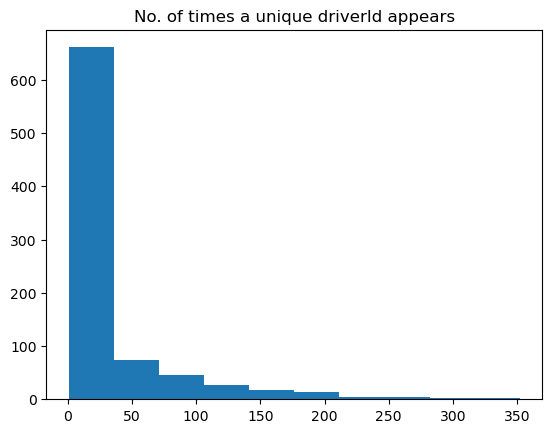

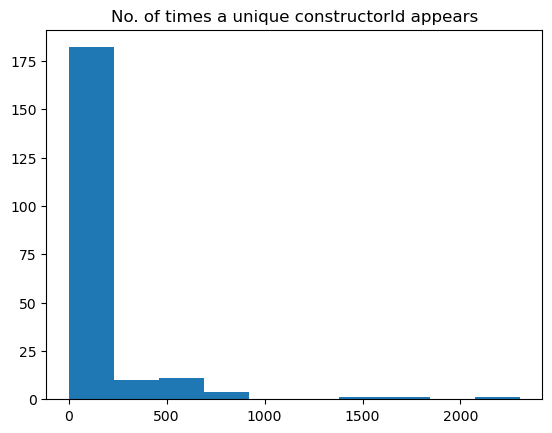

In [47]:
# Display number of times a identifier can appear.
for c in ['driverId', 'constructorId']:
    temp_list = df_results[c].value_counts().to_list()
    plt.hist(temp_list)
    plt.title(f'No. of times a unique {c} appears')
    plt.show()

## 2. Data Wrangling on multiple tables
### 2.1. Preparing tables individually & feature engineering

For the races table, extract the hour and month of the race, as its raw string won't be of value.

In [50]:
df_races.head()

raceId  round  circuitId                   name       date      time  \
0       1      1          1  Australian Grand Prix  3/29/2009   6:00:00   
1       2      2          2   Malaysian Grand Prix  4/5/12009   9:00:00   
2       3      3         17     Chinese Grand Prix  4/19/2009   7:00:00   
3       4      4          3     Bahrain Grand Prix  4/26/2009  12:00:00   
4       5      5          4     Spanish Grand Prix  5/10/2009  12:00:00   

                                                 url  
0  http://en.wikipedia.org/wiki/2009_Australian_G...  
1  http://en.wikipedia.org/wiki/2009_Malaysian_Gr...  
2  http://en.wikipedia.org/wiki/2009_Chinese_Gran...  
3  http://en.wikipedia.org/wiki/2009_Bahrain_Gran...  
4  http://en.wikipedia.org/wiki/2009_Spanish_Gran...

In [51]:
# Keep only relevant columns.
df_races_filtered = df_races[['raceId', 'circuitId', 'date', 'time']]
df_races_filtered = df_races_filtered.copy() # This line of code is to suppress copy warnings.

# month_extraction will return the month of the race date.
def month_extraction(row):
    if pd.isna(row):
        return 0
    return row.split('/')[0]

# Apply month_extraction and drop date.
df_races_filtered['race_mth'] = df_races_filtered['date'].apply(month_extraction)
df_races_filtered = df_races_filtered.drop('date', axis=1)
df_races_filtered.head()

raceId  circuitId      time race_mth
0       1          1   6:00:00        3
1       2          2   9:00:00        4
2       3         17   7:00:00        4
3       4          3  12:00:00        4
4       5          4  12:00:00        5

In [52]:
# hr_extraction extracts the hour of the race.
def hr_extraction(row):
    if pd.isna(row):
        return 0
    return row.split(':')[0]

# Apply hr_extraction and drop race time.
df_races_filtered['race_hr'] = df_races_filtered['time'].apply(hr_extraction)
df_races_final = df_races_filtered.drop('time', axis=1)
print(df_races_final.shape)
df_races_final.head()

(1080, 4)


raceId  circuitId race_mth race_hr
0       1          1        3       6
1       2          2        4       9
2       3         17        4       7
3       4          3        4      12
4       5          4        5      12

For qualifying, first convert all values in `q1` to `q3` to numeric type (convert `\N` to 0 to preserve data).

In [54]:
df_qualifying.head()

qualifyId  raceId  driverId  constructorId  number  position        q1  \
0          1      18         1              1      22         1  1:26.572   
1          2      18         9              2       4         2  1:26.103   
2          3      18         5              1      23         3  1:25.664   
3          4      18        13              6       2         4  1:25.994   
4          5      18         2              2       3         5  1:25.960   

         q2        q3  
0  1:25.187  1:26.714  
1  1:25.315  1:26.869  
2  1:25.452  1:27.079  
3  1:25.691  1:27.178  
4  1:25.518  1:27.236

In [55]:
# Filter for revelant columns.
df_qualifying_filtered = df_qualifying.drop(['qualifyId', 'number'], axis=1)
df_qualifying_filtered = df_qualifying_filtered.rename(columns={'position': 'qual_position'})

# Replace all \N and nulls with 0.
for c in ['q1', 'q2', 'q3']:
    df_qualifying_filtered[c] = df_qualifying_filtered[c].replace('\\N', np.nan)
    df_qualifying_filtered[c] = df_qualifying_filtered[c].fillna(0)

df_qualifying_filtered.sample(n=5, random_state=1)

raceId  driverId  constructorId  qual_position        q1        q2  \
3461     342         5            205             18  1:17.094         0   
5661     891        17              9              3  2:01.597  1:48.641   
623       47        25              3             14  1:28.360  1:28.390   
307       32        21             10             20         0         0   
3369     338       810            166             22  1:30.185         0   

            q3  
3461         0  
5661  2:01.325  
623          0  
307          0  
3369         0

Convert the time strings into numeric data type. Then calculate the mean qualifying time with respect to the number of qualifying rounds participated in.

In [57]:
# time_convert converts the qualifying times to numeric data type.
def time_convert(time):
    if time != 0:
        time = float(time.split(':')[0]) * 60 + float(time.split(':')[1])
        return time
    return 0

# Apply time_convert on qualifying time columns.
for c in ['q1', 'q2', 'q3']:
    df_qualifying_filtered[c] = df_qualifying_filtered[c].apply(time_convert)

df_qualifying_filtered.sample(n=5, random_state=1)

raceId  driverId  constructorId  qual_position       q1       q2  \
3461     342         5            205             18   77.094    0.000   
5661     891        17              9              3  121.597  108.641   
623       47        25              3             14   88.360   88.390   
307       32        21             10             20    0.000    0.000   
3369     338       810            166             22   90.185    0.000   

           q3  
3461    0.000  
5661  121.325  
623     0.000  
307     0.000  
3369    0.000

In [58]:
# mean_qualifying returns the mean qualifying time (with respect to number of non-zero qualifying times).
def mean_qualifying(rows):
    time_sum = 0
    time_count = 0
    for v in ['q1', 'q2', 'q3']:
        if rows[v]==0:
            # Do not include records with 0 into average.
            continue
        time_sum += rows[v]
        time_count += 1
    if time_count > 0:
        return time_sum / time_count, time_count
    else:
        return 0, 0

# Apply mean_qualifying onto the 2 columns. Use result_type='expand' as mean_qualifying returned 2 values (corresponding to the 2 columns).
df_qualifying_filtered[['mean_qual_time', 'no_of_qual']] = df_qualifying_filtered.apply(mean_qualifying, axis=1, result_type='expand')
df_qualifying_filtered.sample(n=5, random_state=2)

raceId  driverId  constructorId  qual_position      q1      q2      q3  \
144       24        16             10             17  79.108   0.000   0.000   
8933    1064       830              9              1  70.036  69.071  68.885   
1147      77        30              6             10  91.585   0.000   0.000   
2592     257       102              3              1  75.962   0.000   0.000   
8389    1032         8             51             16  81.140   0.000   0.000   

      mean_qual_time  no_of_qual  
144        79.108000         1.0  
8933       69.330667         3.0  
1147       91.585000         1.0  
2592       75.962000         1.0  
8389       81.140000         1.0

Now filter columns and rows, and sort the values for easier visualisation.

In [60]:
# Filter the columns and sort the records.
df_qualifying_filtered = df_qualifying_filtered.drop(['q1', 'q2', 'q3'], axis=1)
df_qualifying_refined = df_qualifying_filtered.sort_values(['raceId', 'driverId'])

print(df_qualifying_refined.shape)
df_qualifying_refined.head()

(9135, 6)


raceId  driverId  constructorId  qual_position  mean_qual_time  \
2998       1         1              1             15       86.454000   
2994       1         2              2             11       85.665500   
2988       1         3              3              5       85.980667   
2995       1         4              4             12       85.815500   
2997       1         5              1             14       85.955000   

      no_of_qual  
2998         1.0  
2994         2.0  
2988         3.0  
2995         2.0  
2997         2.0

In [61]:
# Drop records where there is no real qualifying time.
df_qualifying_refined = df_qualifying_refined[df_qualifying_refined['no_of_qual']>0]

print(df_qualifying_refined.shape)
df_qualifying_refined.head()

(8992, 6)


raceId  driverId  constructorId  qual_position  mean_qual_time  \
2998       1         1              1             15       86.454000   
2994       1         2              2             11       85.665500   
2988       1         3              3              5       85.980667   
2995       1         4              4             12       85.815500   
2997       1         5              1             14       85.955000   

      no_of_qual  
2998         1.0  
2994         2.0  
2988         3.0  
2995         2.0  
2997         2.0

Find the lowest mean qualifying time per raceId. In other words, the fastest racer per qualifying weekend. 

In [63]:
# Find the minimum mean_qual_time per race, via .groupby(). Use .reset_index() to have raceId as a column itself.
df_qualifying_lowest_time = pd.DataFrame(df_qualifying_refined.groupby('raceId')['mean_qual_time'].min()).reset_index()
df_qualifying_lowest_time.columns = ['raceId', 'lowest_mean_qual_time']

# Display this new table.
print(df_qualifying_lowest_time.shape)
df_qualifying_lowest_time.head()

(425, 2)


raceId  lowest_mean_qual_time
0       1              85.422667
1       2              94.669333
2       3              95.796667
3       4              92.967000
4       5              80.475333

Merge the lowest mean qualifying time with the main qualifying table, and derive the difference between current mean qualifying time against fastest.

In [65]:
# Merge to have lowest_mean_qual_time included in the qualifying table.
df_qualifying_merged = pd.merge(df_qualifying_refined, df_qualifying_lowest_time, on='raceId', how='inner')
df_qualifying_merged.head()

raceId  driverId  constructorId  qual_position  mean_qual_time  no_of_qual  \
0       1         1              1             15       86.454000         1.0   
1       1         2              2             11       85.665500         2.0   
2       1         3              3              5       85.980667         3.0   
3       1         4              4             12       85.815500         2.0   
4       1         5              1             14       85.955000         2.0   

   lowest_mean_qual_time  
0              85.422667  
1              85.422667  
2              85.422667  
3              85.422667  
4              85.422667

In [66]:
# Derive the difference between mean qualifying time and race's best mean qualifying time.
df_qualifying_merged['diff_from_best_qual'] = df_qualifying_merged['mean_qual_time'] - df_qualifying_merged['lowest_mean_qual_time']

# Drop lowest_mean_qual_time as we have diff_from_best_qual.
df_qualifying_merged = df_qualifying_merged.drop('lowest_mean_qual_time', axis=1)
df_qualifying_merged.head()

raceId  driverId  constructorId  qual_position  mean_qual_time  no_of_qual  \
0       1         1              1             15       86.454000         1.0   
1       1         2              2             11       85.665500         2.0   
2       1         3              3              5       85.980667         3.0   
3       1         4              4             12       85.815500         2.0   
4       1         5              1             14       85.955000         2.0   

   diff_from_best_qual  
0             1.031333  
1             0.242833  
2             0.558000  
3             0.392833  
4             0.532333

Apply a similar concept, this time I will find the circuit record mean qualifying time, by grouping all circuitIds.

In [68]:
# Merge qualifying with selected columns in race (we want the circuitId for circuit record).
df_qualifying_merged = pd.merge(df_qualifying_merged, df_races[['raceId', 'circuitId']], on='raceId', how='inner')

# Group records by circuitId and obtain the minimum mean_qual_time. This is the circuit's record mean qualifying time.
# Again, perform .reset_index() to have circuitId as a column and not the index.
record_quals = pd.DataFrame(df_qualifying_merged.groupby('circuitId')['mean_qual_time'].min()).reset_index()
record_quals.columns = ['circuitId', 'record_mean_qual_time']

print(record_quals.shape)
record_quals.head()

(42, 2)


circuitId  record_mean_qual_time
0          1              81.181000
1          2              90.886000
2          3              53.694667
3          4              75.022000
4          5              83.511667

Add the circuit record mean qualifying time to the qualifying table, and derive the difference between current row and circuit record.

In [70]:
# Now merge with qualifying table to have the record_mean_qual_time inside.
df_qualifying_final = pd.merge(df_qualifying_merged, record_quals, on='circuitId', how='inner')

# Calculate the difference between the current record and circuit record, then drop record_mean_qual_time (since we have difference).
df_qualifying_final['against_circuit_record'] = df_qualifying_final['mean_qual_time'] - df_qualifying_final['record_mean_qual_time']
df_qualifying_final = df_qualifying_final.drop(['record_mean_qual_time', 'circuitId'], axis=1)

df_qualifying_final.head()

raceId  driverId  constructorId  qual_position  mean_qual_time  no_of_qual  \
0       1         1              1             15       86.454000         1.0   
1       1         2              2             11       85.665500         2.0   
2       1         3              3              5       85.980667         3.0   
3       1         4              4             12       85.815500         2.0   
4       1         5              1             14       85.955000         2.0   

   diff_from_best_qual  against_circuit_record  
0             1.031333                5.273000  
1             0.242833                4.484500  
2             0.558000                4.799667  
3             0.392833                4.634500  
4             0.532333                4.774000

For the circuits table, filter for the relevant columns.

In [72]:
df_circuits.head()

circuitId   circuitRef                            name      location  \
0          1  albert_park  Albert Park Grand Prix Circuit     Melbourne   
1          2       sepang    Sepang International Circuit  Kuala Lumpur   
2          3      bahrain   Bahrain International Circuit        Sakhir   
3          4    catalunya  Circuit de Barcelona-Catalunya      Montmeló   
4          5     istanbul                   Istanbul Park      Istanbul   

     country       lat        lng  alt  \
0  Australia -37.84970  144.96800   10   
1   Malaysia   2.76083  101.73800   18   
2    Bahrain  26.03250   50.51060    7   
3      Spain  41.57000    2.26111  109   
4     Turkey  40.95170   29.40500  130   

                                                 url  
0  http://en.wikipedia.org/wiki/Melbourne_Grand_P...  
1  http://en.wikipedia.org/wiki/Sepang_Internatio...  
2  http://en.wikipedia.org/wiki/Bahrain_Internati...  
3  http://en.wikipedia.org/wiki/Circuit_de_Barcel...  
4         http://en.wikipedia.org/wiki/Istanbul_Park

In [73]:
# We only want the altitude per circuit.
df_circuits_final = df_circuits[['circuitId', 'alt']]
df_circuits_final.head()

circuitId  alt
0          1   10
1          2   18
2          3    7
3          4  109
4          5  130

For the results table, first filter the rows (drop all missing time) and columns.

In [75]:
df_results.head()

resultId  raceId  driverId  constructorId number  grid position  \
0         1      18         1              1     22     1        1   
1         2      18         2              2      3     5        2   
2         3      18         3              3      7     7        3   
3         4      18         4              4      5    11        4   
4         5      18         5              1     23     3        5   

  positionText  positionOrder  points  laps     time milliseconds fastestLap  \
0            1              1    10.0    58  34:50.6      5690616         39   
1            2              2     8.0    58    5.478      5696094         41   
2            3              3     6.0    58    8.163      5698779         41   
3            4              4     5.0    58   17.181      5707797         58   
4            5              5     4.0    58   18.014      5708630         43   

  rank fastestLapTime fastestLapSpeed  statusId  
0    2        01:27.5           218.3         1  
1    3        01:27.7         217.586         1  
2    5        01:28.1         216.719         1  
3    7        01:28.6         215.464         1  
4    1        01:27.4         218.385         1

In [76]:
# Drop all \N values in time. Keep only relevant columns.
df_results_filtered = df_results[df_results['time']!='\\N']
df_results_filtered = df_results_filtered[['raceId', 'driverId', 'grid', 'constructorId', 'milliseconds']]
df_results_filtered.head()

raceId  driverId  grid  constructorId milliseconds
0      18         1     1              1      5690616
1      18         2     5              2      5696094
2      18         3     7              3      5698779
3      18         4    11              4      5707797
4      18         5     3              1      5708630

Derive the target column - `time_rank` - the ranking based purely on time.

In [78]:
# Use .rank() to rank the milliseconds per raceId. method='min' ensures that in the event of a tie, both are still given the same rank.
# Use ascending=True as lower time is better score.
df_results_filtered['time_rank'] = df_results_filtered.groupby('raceId')['milliseconds'].rank(method='min', ascending=True).astype(int)
df_results_filtered['time_rank'].value_counts()

time_rank
1     1060
2     1034
3      929
4      793
5      652
6      525
7      412
8      332
9      284
10     217
11     178
12     132
13     106
14      66
15      46
16      24
17      11
18       4
19       3
20       1
Name: count, dtype: int64

Drop `milliseconds` (since we have `time_rank`), and sort the values for easier visualisation.

In [80]:
# Drop columns and sort values.
df_results_final = df_results_filtered.drop('milliseconds', axis=1)
df_results_final = df_results_final.sort_values(['raceId', 'time_rank'])

df_results_final.head()

raceId  driverId  grid  constructorId  time_rank
7553       1        18     1             23          1
7554       1        22     2             23          2
7555       1        15    20              7          3
7556       1        10    19              7          4
7557       1         4    10              4          5

For the constructor table, first merge it with the results table. The objective is to create running count and running average, as defined [in the report](#part2.2).

In [82]:
df_constructor.head()

constructorId constructorRef        name nationality  \
0              1        mclaren     McLaren     British   
1              2     bmw_sauber  BMW Sauber      German   
2              3       williams    Williams     British   
3              4        renault     Renault      French   
4              5     toro_rosso  Toro Rosso     Italian   

                                                 url  
0               http://en.wikipedia.org/wiki/McLaren  
1            http://en.wikipedia.org/wiki/BMW_Sauber  
2  http://en.wikipedia.org/wiki/Williams_Grand_Pr...  
3  http://en.wikipedia.org/wiki/Renault_in_Formul...  
4   http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso

In [83]:
# Merge with results. We want running calculations.
df_constructor_merged = pd.merge(df_constructor, df_results_final, on='constructorId', how='inner')
print(df_constructor_merged.shape)
df_constructor_merged.head()

(6809, 9)


constructorId constructorRef     name nationality  \
0              1        mclaren  McLaren     British   
1              1        mclaren  McLaren     British   
2              1        mclaren  McLaren     British   
3              1        mclaren  McLaren     British   
4              1        mclaren  McLaren     British   

                                    url  raceId  driverId  grid  time_rank  
0  http://en.wikipedia.org/wiki/McLaren       2         1    12          7  
1  http://en.wikipedia.org/wiki/McLaren       3         5    12          5  
2  http://en.wikipedia.org/wiki/McLaren       3         1     9          6  
3  http://en.wikipedia.org/wiki/McLaren       4         1     5          4  
4  http://en.wikipedia.org/wiki/McLaren       4         5    11         12

Create 2 running calculations - count and sum of rank. They do NOT include the current record, to prevent data leakage (via `.shift()` for sum).

In [85]:
# First sort by raceId.
df_constructor_merged = df_constructor_merged.sort_values('raceId')

# Running counts are done via .cumcount (cumulative count), which starts from 0 and increments with each appearance of the same constructorId.
df_constructor_merged['running_construct_participation_count'] = (df_constructor_merged.groupby('constructorId').cumcount())

# Running sums are done via .cumsum (cumulative sum). As they factor in the current row by default, .shift() is introduced for the
# sum to only include rows up to the previous row. Because we used .shift(), I need to introduce another .groupby() for .shift() to understand
# how to function.
df_constructor_merged['running_sum_construct_rank'] = (df_constructor_merged.groupby('constructorId')['time_rank'] \
                                                       .shift() \
                                                       .groupby(df_constructor_merged['constructorId']).cumsum())

print(df_constructor_merged.shape)
df_constructor_merged.head()

(6809, 11)


constructorId constructorRef         name nationality  \
880               2     bmw_sauber   BMW Sauber      German   
4771             23          brawn        Brawn     British   
4770             23          brawn        Brawn     British   
3900             10    force_india  Force India      Indian   
3899             10    force_india  Force India      Indian   

                                                    url  raceId  driverId  \
880             http://en.wikipedia.org/wiki/BMW_Sauber       1         2   
4771              http://en.wikipedia.org/wiki/Brawn_GP       1        22   
4770              http://en.wikipedia.org/wiki/Brawn_GP       1        18   
3900  http://en.wikipedia.org/wiki/Racing_Point_Forc...       1        21   
3899  http://en.wikipedia.org/wiki/Racing_Point_Forc...       1        16   

      grid  time_rank  running_construct_participation_count  \
880      9         10                                      0   
4771     2          2                                      0   
4770     1          1                                      1   
3900    15         11                                      0   
3899    16          9                                      1   

      running_sum_construct_rank  
880                          NaN  
4771                         NaN  
4770                         2.0  
3900                         NaN  
3899                        11.0

Checking the running calculations, they work as intended (e.g. 2nd record has count 1 and sum 11, which is derived from 1st record).

In [87]:
# Display records where we have the same constructorId.
df_constructor_merged[df_constructor_merged['constructorId']==10].head()

constructorId constructorRef         name nationality  \
3900             10    force_india  Force India      Indian   
3899             10    force_india  Force India      Indian   
3901             10    force_india  Force India      Indian   
3902             10    force_india  Force India      Indian   
3904             10    force_india  Force India      Indian   

                                                    url  raceId  driverId  \
3900  http://en.wikipedia.org/wiki/Racing_Point_Forc...       1        21   
3899  http://en.wikipedia.org/wiki/Racing_Point_Forc...       1        16   
3901  http://en.wikipedia.org/wiki/Racing_Point_Forc...       6        21   
3902  http://en.wikipedia.org/wiki/Racing_Point_Forc...       8        21   
3904  http://en.wikipedia.org/wiki/Racing_Point_Forc...       9        16   

      grid  time_rank  running_construct_participation_count  \
3900    15         11                                      0   
3899    16          9                                      1   
3901    13          9                                      2   
3902    16         10                                      3   
3904     7         15                                      4   

      running_sum_construct_rank  
3900                         NaN  
3899                        11.0  
3901                        20.0  
3902                        29.0  
3904                        39.0

Filter the columns. Then create the running average (sum divided by count) and drop the running sum (since we have average).

In [89]:
# Filter for relevant columns only.
df_constructor_merged = df_constructor_merged.drop(['constructorRef', 'name', 'nationality', 'url', 'grid', 'time_rank'], axis=1)
df_constructor_merged.head(10)

constructorId  raceId  driverId  running_construct_participation_count  \
880               2       1         2                                      0   
4771             23       1        22                                      0   
4770             23       1        18                                      1   
3900             10       1        21                                      0   
3899             10       1        16                                      1   
3350              7       1        10                                      0   
3349              7       1        15                                      1   
1968              5       1         7                                      0   
1967              5       1        67                                      1   
1651              4       1         4                                      0   

      running_sum_construct_rank  
880                          NaN  
4771                         NaN  
4770                         2.0  
3900                         NaN  
3899                        11.0  
3350                         NaN  
3349                         4.0  
1968                         NaN  
1967                         8.0  
1651                         NaN

In [90]:
# Derive the running average. Drop the running sum.
df_constructor_merged['running_avg_construct_rank'] = df_constructor_merged['running_sum_construct_rank'] / df_constructor_merged['running_construct_participation_count']
df_constructor_final = df_constructor_merged.drop('running_sum_construct_rank', axis=1)

df_constructor_final.head()

constructorId  raceId  driverId  running_construct_participation_count  \
880               2       1         2                                      0   
4771             23       1        22                                      0   
4770             23       1        18                                      1   
3900             10       1        21                                      0   
3899             10       1        16                                      1   

      running_avg_construct_rank  
880                          NaN  
4771                         NaN  
4770                         2.0  
3900                         NaN  
3899                        11.0

For the drivers table, a similar concept to constructors table is applied. Merge it with the results table.

In [92]:
df_drivers.head()

driverId   driverRef number code  forename     surname         dob  \
0         1    hamilton     44  HAM     Lewis    Hamilton  1985-01-07   
1         2    heidfeld     \N  HEI      Nick    Heidfeld  1977-05-10   
2         3     rosberg      6  ROS      Nico     Rosberg  1985-06-27   
3         4      alonso     14  ALO  Fernando      Alonso  1981-07-29   
4         5  kovalainen     \N  KOV    Heikki  Kovalainen  1981-10-19   

  nationality                                             url  
0     British     http://en.wikipedia.org/wiki/Lewis_Hamilton  
1      German      http://en.wikipedia.org/wiki/Nick_Heidfeld  
2      German       http://en.wikipedia.org/wiki/Nico_Rosberg  
3     Spanish    http://en.wikipedia.org/wiki/Fernando_Alonso  
4     Finnish  http://en.wikipedia.org/wiki/Heikki_Kovalainen

In [93]:
# Merge with results (similar goal to constructors).
df_drivers_merged = pd.merge(df_drivers, df_results_final, on='driverId', how='inner')
print(df_drivers_merged.shape)
df_drivers_merged.head()

(6809, 13)


driverId driverRef number code forename   surname         dob nationality  \
0         1  hamilton     44  HAM    Lewis  Hamilton  1985-01-07     British   
1         1  hamilton     44  HAM    Lewis  Hamilton  1985-01-07     British   
2         1  hamilton     44  HAM    Lewis  Hamilton  1985-01-07     British   
3         1  hamilton     44  HAM    Lewis  Hamilton  1985-01-07     British   
4         1  hamilton     44  HAM    Lewis  Hamilton  1985-01-07     British   

                                           url  raceId  grid  constructorId  \
0  http://en.wikipedia.org/wiki/Lewis_Hamilton       2    12              1   
1  http://en.wikipedia.org/wiki/Lewis_Hamilton       3     9              1   
2  http://en.wikipedia.org/wiki/Lewis_Hamilton       4     5              1   
3  http://en.wikipedia.org/wiki/Lewis_Hamilton       7    16              1   
4  http://en.wikipedia.org/wiki/Lewis_Hamilton      10     4              1   

   time_rank  
0          7  
1          6  
2          4  
3         13  
4          1

Filter the columns. Then calculate the running count and sum of driver rank, before calculating the running average. Finally, filter for columns.

In [95]:
# Filter for only revelant columns.
df_drivers_merged = df_drivers_merged[['driverId', 'raceId', 'constructorId', 'time_rank']]

In [96]:
# First sort by raceId. Then, similar to constructor, derive the running count, sum, and then average.
df_drivers_merged = df_drivers_merged.sort_values('raceId')
df_drivers_merged['running_driver_participation_count'] = (df_drivers_merged.groupby('driverId').cumcount())
df_drivers_merged['running_sum_driver_rank'] = (df_drivers_merged.groupby('driverId')['time_rank'].shift().groupby(df_drivers_merged['driverId']).cumsum())

df_drivers_merged['running_avg_driver_rank'] = df_drivers_merged['running_sum_driver_rank'] / df_drivers_merged['running_driver_participation_count']

# Drop sum (we have average) and time_rank (target).
df_drivers_final = df_drivers_merged.drop(['running_sum_driver_rank', 'time_rank'], axis=1)
df_drivers_final.head()

driverId  raceId  constructorId  running_driver_participation_count  \
1353        15       1              7                                   0   
317          3       1              3                                   0   
462          4       1              4                                   0   
2050        22       1             23                                   0   
729          7       1              5                                   0   

      running_avg_driver_rank  
1353                      NaN  
317                       NaN  
462                       NaN  
2050                      NaN  
729                       NaN

Checking the running count and averages, they work as intended.

In [98]:
# Running calculations work as intended.
df_drivers_final[df_drivers_final['driverId']==4].head()

driverId  raceId  constructorId  running_driver_participation_count  \
462         4       1              4                                   0   
463         4       3              4                                   1   
464         4       4              4                                   2   
465         4       5              4                                   3   
466         4       6              4                                   4   

     running_avg_driver_rank  
462                      NaN  
463                 5.000000  
464                 7.000000  
465                 7.333333  
466                 6.750000

### 2.2. Merging all the tables

With respect to the database schema (found in [section 3.2](#part3.2) of my report), merging was done in the following sequence:
- Race with Qualifying
- Then with Constructors
- Then with Drivers
- Then with Circuits
- And finally the Results

In [101]:
# Merge race with qualifying via raceId.
races_qual = pd.merge(df_races_final, df_qualifying_final, on='raceId', how='inner')
print(races_qual.shape)
races_qual.head()

(8992, 11)


raceId  circuitId race_mth race_hr  driverId  constructorId  qual_position  \
0       1          1        3       6         1              1             15   
1       1          1        3       6         2              2             11   
2       1          1        3       6         3              3              5   
3       1          1        3       6         4              4             12   
4       1          1        3       6         5              1             14   

   mean_qual_time  no_of_qual  diff_from_best_qual  against_circuit_record  
0       86.454000         1.0             1.031333                5.273000  
1       85.665500         2.0             0.242833                4.484500  
2       85.980667         3.0             0.558000                4.799667  
3       85.815500         2.0             0.392833                4.634500  
4       85.955000         2.0             0.532333                4.774000

In [102]:
# Merge with constructors via the set of unique identifiers.
races_qual_con = pd.merge(races_qual, df_constructor_final, on=['constructorId', 'raceId', 'driverId'], how='inner')
print(races_qual_con.shape)
races_qual_con.head()

(3805, 13)


raceId  circuitId race_mth race_hr  driverId  constructorId  qual_position  \
0       1          1        3       6         2              2             11   
1       1          1        3       6         3              3              5   
2       1          1        3       6         4              4             12   
3       1          1        3       6         7              5             20   
4       1          1        3       6        10              7              6   

   mean_qual_time  no_of_qual  diff_from_best_qual  against_circuit_record  \
0       85.665500         2.0             0.242833                4.484500   
1       85.980667         3.0             0.558000                4.799667   
2       85.815500         2.0             0.392833                4.634500   
3       86.964000         1.0             1.541333                5.783000   
4       85.918333         3.0             0.495667                4.737333   

   running_construct_participation_count  running_avg_construct_rank  
0                                      0                         NaN  
1                                      0                         NaN  
2                                      0                         NaN  
3                                      0                         NaN  
4                                      0                         NaN

In [103]:
# Merge with drivers via the set of unique identifiers.
races_qual_con_drivers = pd.merge(races_qual_con, df_drivers_final, on=['raceId', 'driverId', 'constructorId'], how='inner')
print(races_qual_con_drivers.shape)
races_qual_con_drivers.head()

(3805, 15)


raceId  circuitId race_mth race_hr  driverId  constructorId  qual_position  \
0       1          1        3       6         2              2             11   
1       1          1        3       6         3              3              5   
2       1          1        3       6         4              4             12   
3       1          1        3       6         7              5             20   
4       1          1        3       6        10              7              6   

   mean_qual_time  no_of_qual  diff_from_best_qual  against_circuit_record  \
0       85.665500         2.0             0.242833                4.484500   
1       85.980667         3.0             0.558000                4.799667   
2       85.815500         2.0             0.392833                4.634500   
3       86.964000         1.0             1.541333                5.783000   
4       85.918333         3.0             0.495667                4.737333   

   running_construct_participation_count  running_avg_construct_rank  \
0                                      0                         NaN   
1                                      0                         NaN   
2                                      0                         NaN   
3                                      0                         NaN   
4                                      0                         NaN   

   running_driver_participation_count  running_avg_driver_rank  
0                                   0                      NaN  
1                                   0                      NaN  
2                                   0                      NaN  
3                                   0                      NaN  
4                                   0                      NaN

In [104]:
# Merge with circuits via circuitId.
races_qual_con_drivers_cir = pd.merge(races_qual_con_drivers, df_circuits_final, on=['circuitId'], how='inner')
print(races_qual_con_drivers_cir.shape)
races_qual_con_drivers_cir.head()

(3805, 16)


raceId  circuitId race_mth race_hr  driverId  constructorId  qual_position  \
0       1          1        3       6         2              2             11   
1       1          1        3       6         3              3              5   
2       1          1        3       6         4              4             12   
3       1          1        3       6         7              5             20   
4       1          1        3       6        10              7              6   

   mean_qual_time  no_of_qual  diff_from_best_qual  against_circuit_record  \
0       85.665500         2.0             0.242833                4.484500   
1       85.980667         3.0             0.558000                4.799667   
2       85.815500         2.0             0.392833                4.634500   
3       86.964000         1.0             1.541333                5.783000   
4       85.918333         3.0             0.495667                4.737333   

   running_construct_participation_count  running_avg_construct_rank  \
0                                      0                         NaN   
1                                      0                         NaN   
2                                      0                         NaN   
3                                      0                         NaN   
4                                      0                         NaN   

   running_driver_participation_count  running_avg_driver_rank alt  
0                                   0                      NaN  10  
1                                   0                      NaN  10  
2                                   0                      NaN  10  
3                                   0                      NaN  10  
4                                   0                      NaN  10

In [105]:
# Finally, merge with results via the set of unique identifiers.
df = pd.merge(races_qual_con_drivers_cir, df_results_final, on=['raceId', 'driverId', 'constructorId'], how='inner')
print(df.shape)
df.head()

(3805, 18)


raceId  circuitId race_mth race_hr  driverId  constructorId  qual_position  \
0       1          1        3       6         2              2             11   
1       1          1        3       6         3              3              5   
2       1          1        3       6         4              4             12   
3       1          1        3       6         7              5             20   
4       1          1        3       6        10              7              6   

   mean_qual_time  no_of_qual  diff_from_best_qual  against_circuit_record  \
0       85.665500         2.0             0.242833                4.484500   
1       85.980667         3.0             0.558000                4.799667   
2       85.815500         2.0             0.392833                4.634500   
3       86.964000         1.0             1.541333                5.783000   
4       85.918333         3.0             0.495667                4.737333   

   running_construct_participation_count  running_avg_construct_rank  \
0                                      0                         NaN   
1                                      0                         NaN   
2                                      0                         NaN   
3                                      0                         NaN   
4                                      0                         NaN   

   running_driver_participation_count  running_avg_driver_rank alt  grid  \
0                                   0                      NaN  10     9   
1                                   0                      NaN  10     5   
2                                   0                      NaN  10    10   
3                                   0                      NaN  10    17   
4                                   0                      NaN  10    19   

   time_rank  
0         10  
1          6  
2          5  
3          8  
4          4

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3805 entries, 0 to 3804
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   raceId                                 3805 non-null   int64  
 1   circuitId                              3805 non-null   int64  
 2   race_mth                               3805 non-null   object 
 3   race_hr                                3805 non-null   object 
 4   driverId                               3805 non-null   int64  
 5   constructorId                          3805 non-null   int64  
 6   qual_position                          3805 non-null   int64  
 7   mean_qual_time                         3805 non-null   float64
 8   no_of_qual                             3805 non-null   float64
 9   diff_from_best_qual                    3805 non-null   float64
 10  against_circuit_record                 3805 non-null   float64
 11  runn

## 3. Data Cleansing and Transformation
### 3.1. Missing value imputation & data transformation preparations

Observed in the above cell, some columns are of object type when they should be numeric. I first convert all `\N` values to null, and recieved 4 columns with nulls.

In [109]:
# Convert all instances of \N to null.
for c in [d for d in df.columns if df[d].dtype == 'O']:
    df[c] = np.where(df[c]=='\\N', np.NaN, df[c])

df.isnull().sum()

raceId                                     0
circuitId                                  0
race_mth                                   0
race_hr                                  550
driverId                                   0
constructorId                              0
qual_position                              0
mean_qual_time                             0
no_of_qual                                 0
diff_from_best_qual                        0
against_circuit_record                     0
running_construct_participation_count      0
running_avg_construct_rank                31
running_driver_participation_count         0
running_avg_driver_rank                   95
alt                                        8
grid                                       0
time_rank                                  0
dtype: int64

For `running_avg_driver_rank` and `running_avg_construct_rank`, they are null when the running count is 0 (likely due to first race). The nulls are thus replaced with 0 (via logic - if they haven't participated before, obviously their running average is 0).

In [111]:
# Sample 10 records where running_avg_driver_rank is null.
df[df['running_avg_driver_rank'].isnull()].sample(n=10, random_state=1)

raceId  circuitId race_mth race_hr  driverId  constructorId  \
984      108          1        3     NaN        49             15   
562       53          3        3      14        32              9   
1254     227         20        4     NaN        84             17   
1684     849          9        7      12       815             15   
2842     967         18       11      16       836            209   
1338     259         21        5     NaN        91             15   
3225    1011          3        3      15       848              5   
1170     207          1        3     NaN        78             15   
3307    1020         10        7      13       847              3   
3580    1046          3       12      17       850            210   

      qual_position  mean_qual_time  no_of_qual  diff_from_best_qual  \
984               4       88.274000         1.0             1.101000   
562               8       93.175333         3.0             1.392000   
1254             11       81.177000         1.0             2.236000   
1684             12       93.384500         2.0             1.803833   
2842             19       73.427000         1.0             2.265333   
1338             10       83.347000         1.0             1.799000   
3225             12       89.513500         2.0             1.377833   
1170             13       93.327000         1.0             3.958000   
3307             18       74.721000         1.0             2.465000   
3580             20       55.426000         1.0             1.731333   

      against_circuit_record  running_construct_participation_count  \
984                 7.093000                                     24   
562                39.480667                                     59   
1254                2.439000                                     65   
1684               15.151500                                    100   
2842                5.676000                                      2   
1338                9.208667                                     78   
3225               35.818833                                    158   
1170               12.146000                                     59   
3307                2.636000                                    657   
3580                1.731333                                     53   

      running_avg_construct_rank  running_driver_participation_count  \
984                     7.666667                                   0   
562                     6.101695                                   0   
1254                    4.876923                                   0   
1684                    7.250000                                   0   
2842                   12.000000                                   0   
1338                    6.794872                                   0   
3225                    9.841772                                   0   
1170                    7.050847                                   0   
3307                    4.802131                                   0   
3580                   10.037736                                   0   

      running_avg_driver_rank  alt  grid  time_rank  
984                       NaN   10     4          6  
562                       NaN    7     8          8  
1254                      NaN  578    11          6  
1684                      NaN  153    12          7  
2842                      NaN  785    19         15  
1338                      NaN   37    10          4  
3225                      NaN    7    12          9  
1170                      NaN   10    13          6  
3307                      NaN  103    17         11  
3580                      NaN    7    20         17

In [112]:
# Sample 10 records where running_avg_construct_rank is null.
df[df['running_avg_construct_rank'].isnull()].sample(n=10, random_state=1)

raceId  circuitId race_mth race_hr  driverId  constructorId  \
3218    1011          3        3      15       815            211   
3          1          1        3       6         7              5   
1356     265         10        7     NaN       100             33   
1865     867         12        6      12         5            207   
1775     860          1        3       6         8            208   
1725     855         22       10       6        15            205   
1403     337          3        3      12        30            131   
1242     226         25        4     NaN        50             29   
229       19          2        3       7        18             11   
2014     877         24       11      13        37            164   

      qual_position  mean_qual_time  no_of_qual  diff_from_best_qual  \
3218             14       89.824500         2.0             1.688833   
3                20       86.964000         1.0             1.541333   
1356             22      108.229000         1.0             4.647000   
1865             16      100.191000         2.0             1.567667   
1775             18       87.758000         1.0             1.975333   
1725             19       95.514000         1.0             3.981000   
1403              7      115.407333         3.0             1.069667   
1242              7       91.615000         1.0             1.269000   
229              11       95.527500         2.0             0.358500   
2014             23      105.766000         1.0             4.756667   

      against_circuit_record  running_construct_participation_count  \
3218               36.129833                                      0   
3                   5.783000                                      0   
1356               36.144000                                      0   
1865                2.392333                                      0   
1775                6.577000                                      0   
1725                7.568333                                      0   
1403               61.712667                                      0   
1242                7.142000                                      0   
229                 4.641500                                      0   
2014               23.022333                                      0   

      running_avg_construct_rank  running_driver_participation_count  \
3218                         NaN                                  81   
3                            NaN                                   0   
1356                         NaN                                   0   
1865                         NaN                                  35   
1775                         NaN                                  96   
1725                         NaN                                  79   
1403                         NaN                                 185   
1242                         NaN                                   3   
229                          NaN                                  16   
2014                         NaN                                  14   

      running_avg_driver_rank  alt  grid  time_rank  
3218                 7.753086    7    14         10  
3                         NaN   10    17          8  
1356                      NaN  103    22          6  
1865                 6.857143    4    16         14  
1775                 3.562500   10    17          7  
1725                 6.291139   45    19         19  
1403                 2.200000    7     7          6  
1242                 5.333333    8     7          6  
229                  3.562500   18    11         10  
2014                 7.642857    3    22         17

In [113]:
# For these 2 columns, just fill nulls with 0.
df[['running_avg_driver_rank', 'running_avg_construct_rank']] = df[['running_avg_driver_rank', 'running_avg_construct_rank']].fillna(0)

For `race_hr`, nulls are a result of the races table having no time record. But looking at the URLs, the races seem old. It's thus due to old records that the time is unavailable.

Given that how F1 was conducted more than 20 years ago against how it is now, the way F1 is conducted may have changed. As such, records with missing `race_hr` are old and will be dropped.

In [115]:
# Extract the list of raceId that have a null race_hr.
missing_race_hr = df[df['race_hr'].isnull()]['raceId'].unique().tolist()

# Display a sample (of 15 records) of the raw races table where the raceId is in missing_race_hr.
print(len(missing_race_hr))
df_races[df_races['raceId'].isin(missing_race_hr)].sample(n=15, random_state=1)

99


raceId  round  circuitId                      name        date time  \
265     266     10         11      Hungarian Grand Prix   8/14/1994   \N   
254     255     16         22       Japanese Grand Prix  10/29/1995   \N   
121     122     15         19  United States Grand Prix   9/28/2003   \N   
251     252     13         27     Portuguese Grand Prix   9/24/1995   \N   
249     250     11         13        Belgian Grand Prix   8/27/1995   \N   
106     107     18         18      Brazilian Grand Prix  10/24/2004   \N   
139     140     17         22       Japanese Grand Prix  10/13/2002   \N   
252     253     14         20       European Grand Prix   10/1/1995   \N   
261     262      6          7       Canadian Grand Prix   6/12/1994   \N   
264     265      9         10         German Grand Prix   7/31/1994   \N   
191     192      2         18      Brazilian Grand Prix   3/29/1998   \N   
122     123     16         22       Japanese Grand Prix  10/12/2003   \N   
209     210      4         21     San Marino Grand Prix   4/27/1997   \N   
248     249     10         11      Hungarian Grand Prix   8/13/1995   \N   
224     225      2         18      Brazilian Grand Prix   3/31/1996   \N   

                                                   url  
265  http://en.wikipedia.org/wiki/1994_Hungarian_Gr...  
254  http://en.wikipedia.org/wiki/1995_Japanese_Gra...  
121  http://en.wikipedia.org/wiki/2003_United_State...  
251  http://en.wikipedia.org/wiki/1995_Portuguese_G...  
249  http://en.wikipedia.org/wiki/1995_Belgian_Gran...  
106  http://en.wikipedia.org/wiki/2004_Brazilian_Gr...  
139  http://en.wikipedia.org/wiki/2002_Japanese_Gra...  
252  http://en.wikipedia.org/wiki/1995_European_Gra...  
261  http://en.wikipedia.org/wiki/1994_Canadian_Gra...  
264  http://en.wikipedia.org/wiki/1994_German_Grand...  
191  http://en.wikipedia.org/wiki/1998_Brazilian_Gr...  
122  http://en.wikipedia.org/wiki/2003_Japanese_Gra...  
209  http://en.wikipedia.org/wiki/1997_San_Marino_G...  
248  http://en.wikipedia.org/wiki/1995_Hungarian_Gr...  
224  http://en.wikipedia.org/wiki/1996_Brazilian_Gr...

In [116]:
# Drop records where race_hr is null.
df = df[~df['race_hr'].isnull()]

For `alt`, all nulls are a result of 1 circuit having no altitude record. It's easy to impute via a quick search on the internet.

In [118]:
# Display the circuitId with a null altitude value.
df[df['alt'].isnull()]['circuitId'].value_counts()

circuitId
78    8
Name: count, dtype: int64

In [119]:
# Display information about the circuit with no altitude value.
df_circuits[df_circuits['circuitId']==78]

circuitId circuitRef                          name   location country  \
77         78     losail  Losail International Circuit  Al Daayen   Qatar   

      lat      lng alt                                                url  
77  25.49  51.4542  \N  http://en.wikipedia.org/wiki/Losail_Internatio...

In [120]:
# Impute that circuit's altitude with 4 (internet search).
df['alt'] = df['alt'].fillna(4)

# Display the number of missing values left.
print(f'No. of missing values: {df.isnull().sum().sum()}')

No. of missing values: 0


Now preparing for data transformation, I dropped all unique identifiers and converted data types to be all numeric.

In [122]:
# Drop indentifiers.
df = df.drop(['raceId', 'circuitId', 'driverId', 'constructorId'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3255 entries, 0 to 3804
Data columns (total 14 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   race_mth                               3255 non-null   object 
 1   race_hr                                3255 non-null   object 
 2   qual_position                          3255 non-null   int64  
 3   mean_qual_time                         3255 non-null   float64
 4   no_of_qual                             3255 non-null   float64
 5   diff_from_best_qual                    3255 non-null   float64
 6   against_circuit_record                 3255 non-null   float64
 7   running_construct_participation_count  3255 non-null   int64  
 8   running_avg_construct_rank             3255 non-null   float64
 9   running_driver_participation_count     3255 non-null   int64  
 10  running_avg_driver_rank                3255 non-null   float64
 11  alt      

In [123]:
# Convert columns with object data type to numeric data type.
df['race_mth'] = df['race_mth'].astype(int)
df['race_hr'] = df['race_hr'].astype(int)
df['alt'] = df['alt'].astype(float)

df

race_mth  race_hr  qual_position  mean_qual_time  no_of_qual  \
0            3        6             11       85.665500         2.0   
1            3        6              5       85.980667         3.0   
2            3        6             12       85.815500         2.0   
3            3        6             20       86.964000         1.0   
4            3        6              6       85.918333         3.0   
...        ...      ...            ...             ...         ...   
3800        12       13              9       83.524333         3.0   
3801        12       13             12       83.766000         2.0   
3802        12       13              7       83.263667         3.0   
3803        12       13              3       83.246667         3.0   
3804        12       13              8       83.350667         3.0   

      diff_from_best_qual  against_circuit_record  \
0                0.242833                4.484500   
1                0.558000                4.799667   
2                0.392833                4.634500   
3                1.541333                5.783000   
4                0.495667                4.737333   
...                   ...                     ...   
3800             0.780667                0.780667   
3801             1.022333                1.022333   
3802             0.520000                0.520000   
3803             0.503000                0.503000   
3804             0.607000                0.607000   

      running_construct_participation_count  running_avg_construct_rank  \
0                                         0                    0.000000   
1                                         0                    0.000000   
2                                         0                    0.000000   
3                                         0                    0.000000   
4                                         0                    0.000000   
...                                     ...                         ...   
3800                                     19                    6.631579   
3801                                     37                    7.837838   
3802                                   1205                    3.506224   
3803                                    879                    4.023891   
3804                                     36                    7.944444   

      running_driver_participation_count  running_avg_driver_rank   alt  grid  \
0                                      0                 0.000000  10.0     9   
1                                      0                 0.000000  10.0     5   
2                                      0                 0.000000  10.0    10   
3                                      0                 0.000000  10.0    17   
4                                      0                 0.000000  10.0    19   
...                                  ...                      ...   ...   ...   
3800                                  37                 7.378378   3.0     9   
3801                                  38                 7.552632   3.0    12   
3802                                  49                 5.346939   3.0     7   
3803                                  34                 6.558824   3.0     3   
3804                                   6                 9.833333   3.0     8   

      time_rank  
0            10  
1             6  
2             5  
3             8  
4             4  
...         ...  
3800          9  
3801          5  
3802         10  
3803          7  
3804          4  

[3255 rows x 14 columns]

Lastly, I split the dataset into training (70%) and testing (30%) datasets.

In [125]:
# Split the dataset.
X_train, X_test, y_train, y_test = train_test_split(df.drop('time_rank', axis=1), df['time_rank'],
                                                    test_size=0.3, random_state=1)

(X_train.shape, X_test.shape)

((2278, 13), (977, 13))

In [126]:
# Create a copy of the train and test datasets.
X_train_transformed = X_train.copy()
X_test_transformed = X_test.copy()

### 3.2. Outlier handling

To help with data transformation, 4 functions are introduced (with its purpose in code comments).

In [129]:
# residual_plots displays the histogram + KDE plot and the Q-Q plot of the residuals.
def residual_plots(df):

    # Build a linear regression model to obtain predictions.
    lin_reg = LinearRegression()
    lin_reg.fit(df, y_train)
    y_train_pred = lin_reg.predict(df)

    # Calculate the residuals and define the figure.
    residuals = y_train - y_train_pred
    plt.figure(figsize=(15,6))

    # For first subplot, plot the histogram and KDE of the residuals.
    plt.subplot(1, 2, 1)
    sns.histplot(residuals, kde=True, bins=30)
    plt.title("Distribution of residuals")
    plt.xlabel("Residual")
    plt.ylabel("Frequency")

    # For second subplot, plot the Q-Q plot of the residuals.
    plt.subplot(1, 2, 2)
    stats.probplot(residuals, dist="norm", plot=plt)

    # Display the plot.
    plt.show()

In [130]:
# diagnostic_plots displays the histogram and Q-Q plot of an input variable.
def diagnostic_plots(df, variable):

    # Define the figure. First subplot displays the histogram of the variable.
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)

    # Second subplot displays the Q-Q plot of the variable.
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)

    # Display the plot.
    plt.show()

In [131]:
# quantile_finder returns common quantiles of a variable, which can help in outlier handling.
def quantile_finder(df, variable):
    # Display common pairs of quantiles. Separate each pair by a blank line.
    for q in [0.01, 0.99, 0.03, 0.97, 0.05, 0.95]:
        print(f'{q} quantile: {df[variable].quantile(q)}')
        if q > 0.5:
            print()

In [132]:
# describe_distn displays the numeric measures and histogram of an input variable.
def describe_distn(df, variable):
    # Numeric measures.
    print(df[variable].describe())
    
    # Histogram.
    df[variable].hist()
    plt.show()

Display the residual distribution. It's somewhat normally distributed but tails don't follow normality, which can be rectified.

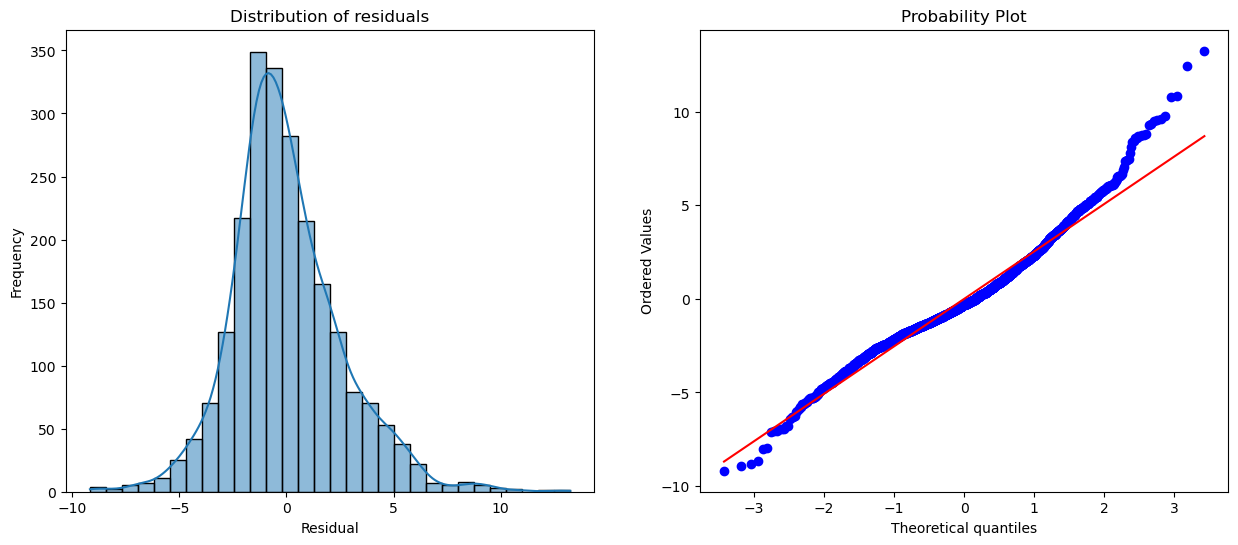

In [134]:
residual_plots(X_train_transformed)

Display the training dataset variable distribution. Some variables have outliers while some are skewed. Addressing these may improve residual distribution.

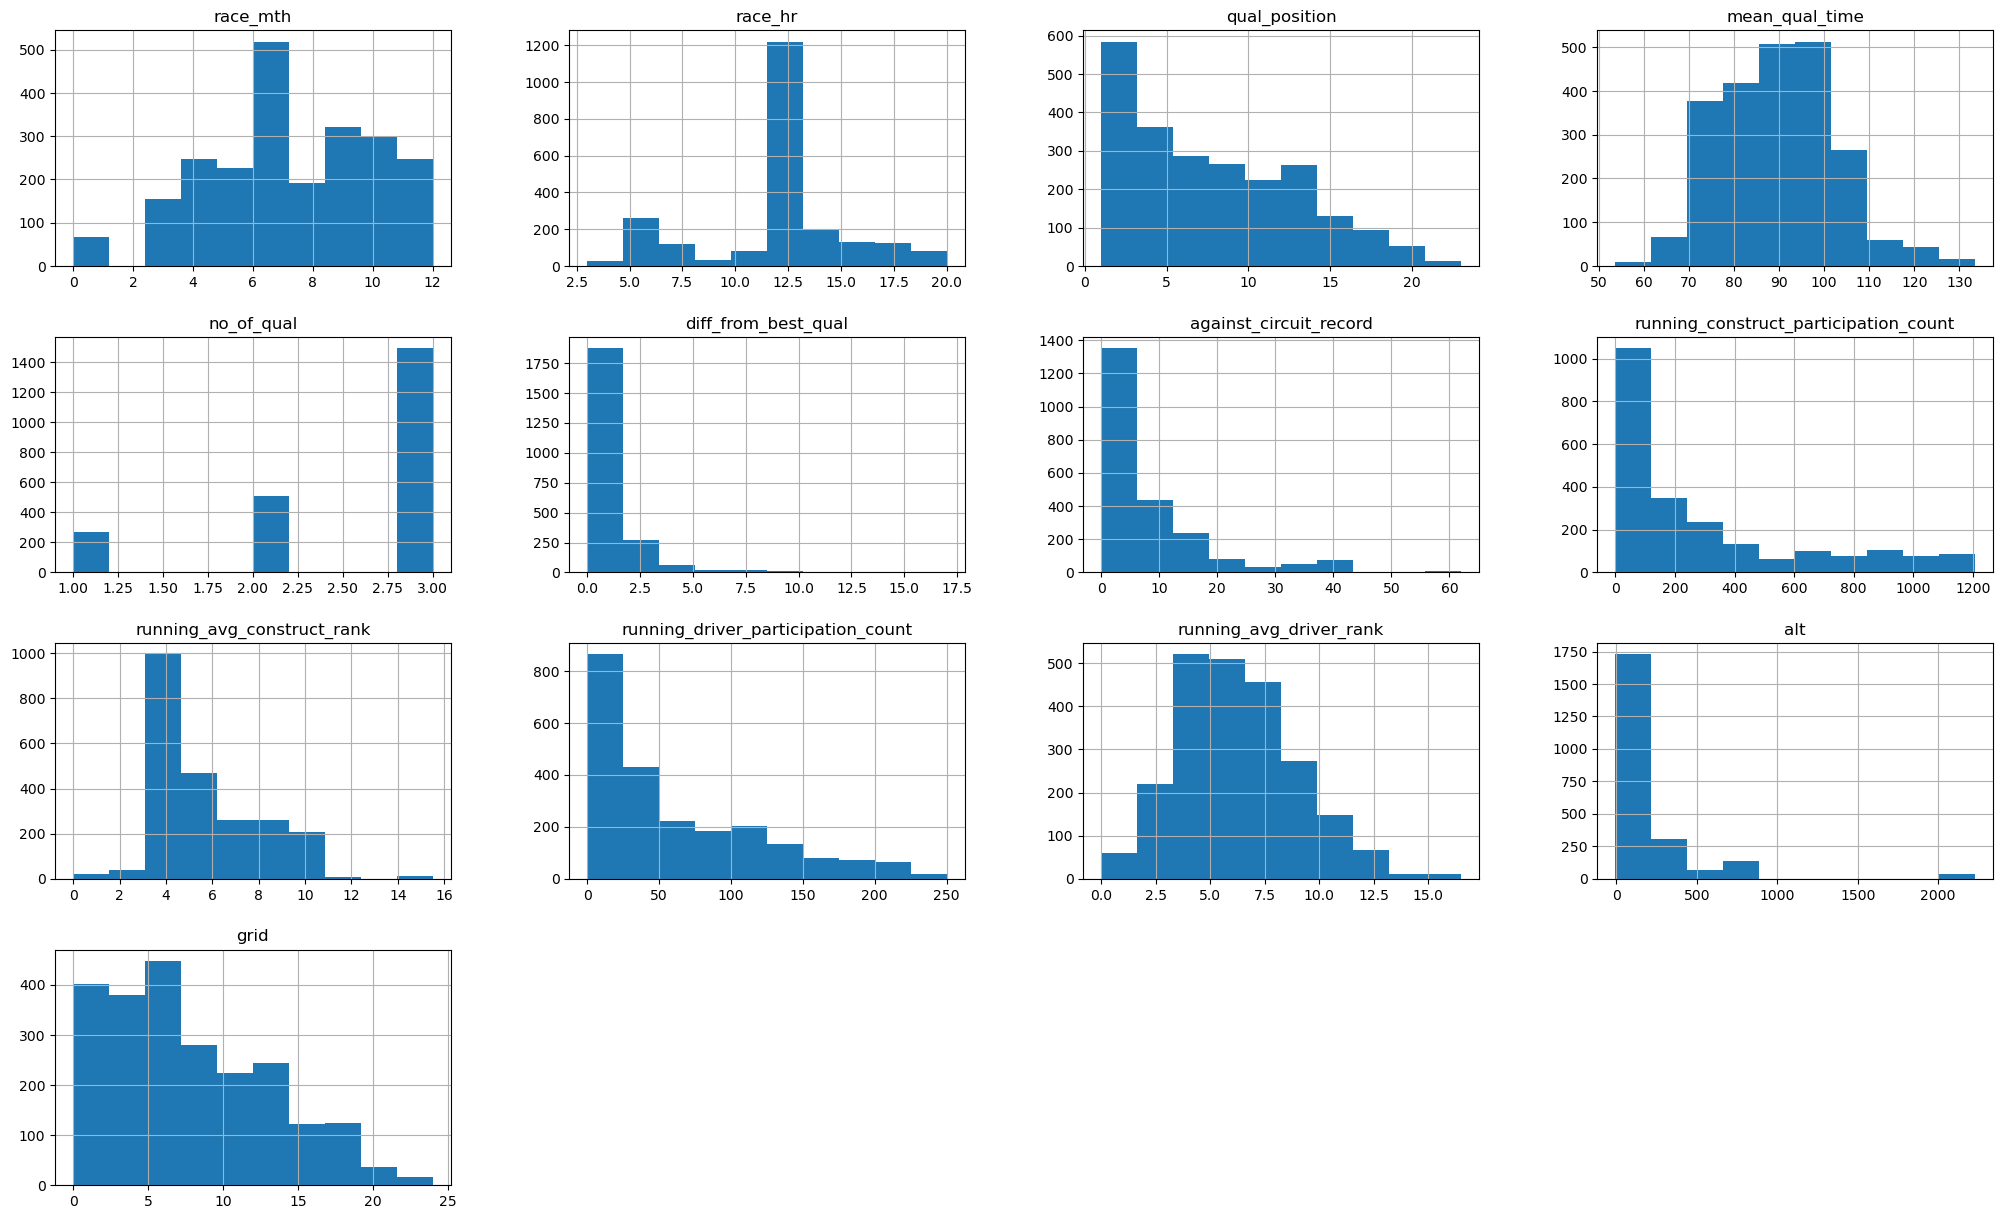

In [136]:
X_train_transformed.hist(figsize=(25,15))
plt.show()

4 variables have been identified to have outliers. Plot their distributions. They display extreme right-skewedness.

In [138]:
outliers = ['diff_from_best_qual', 'against_circuit_record', 'running_avg_construct_rank', 'alt']

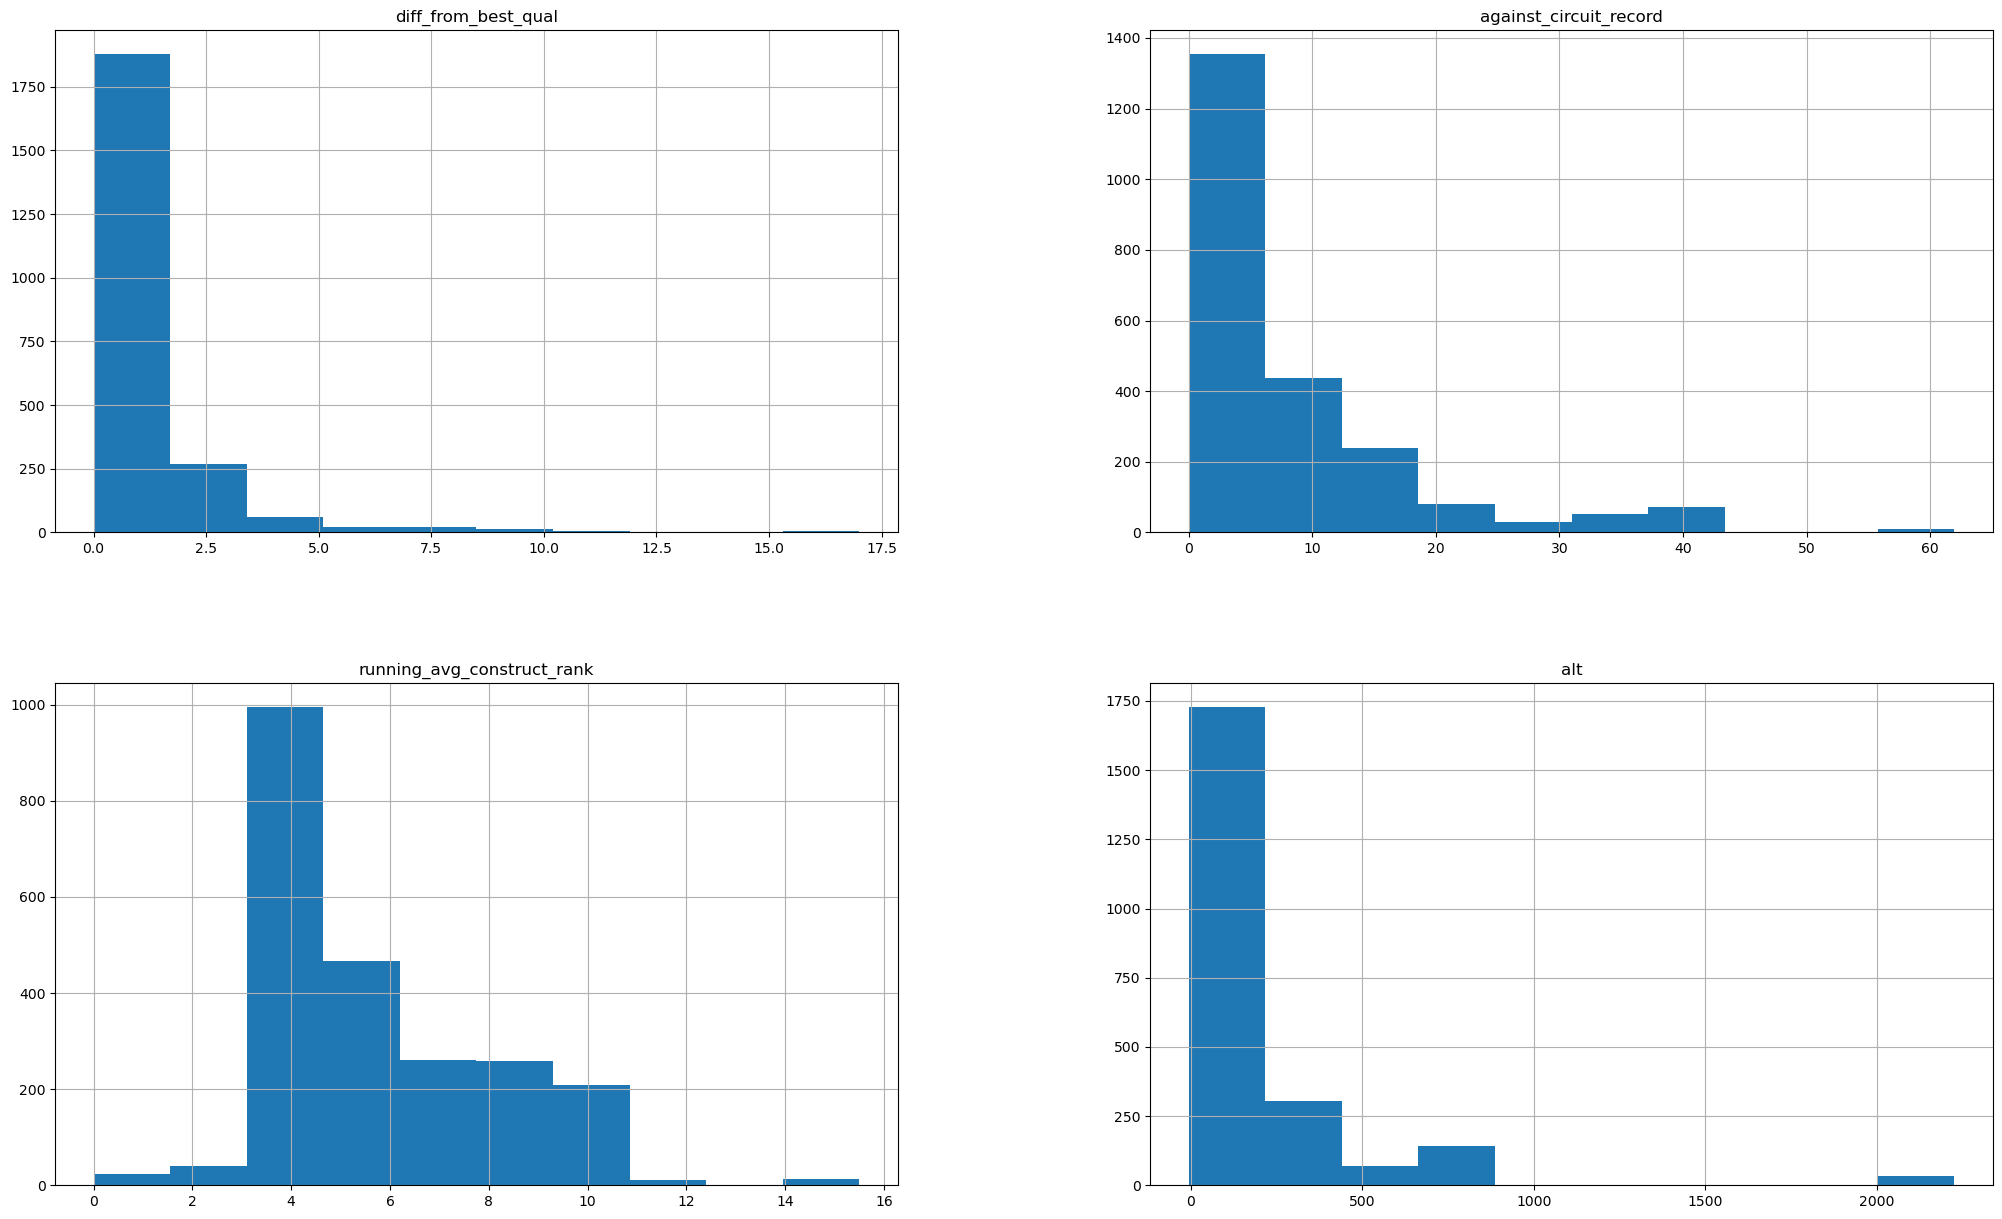

In [139]:
X_train_transformed[outliers].hist(figsize=(25,15))
plt.show()

For `alt`, I will perform capping since it's a discrete varaible. 3% winsorization (capping) has been selected.

In [141]:
quantile_finder(X_train_transformed, 'alt')

0.01 quantile: -7.0
0.99 quantile: 2227.0

0.03 quantile: 0.0
0.97 quantile: 785.0

0.05 quantile: 2.0
0.95 quantile: 785.0



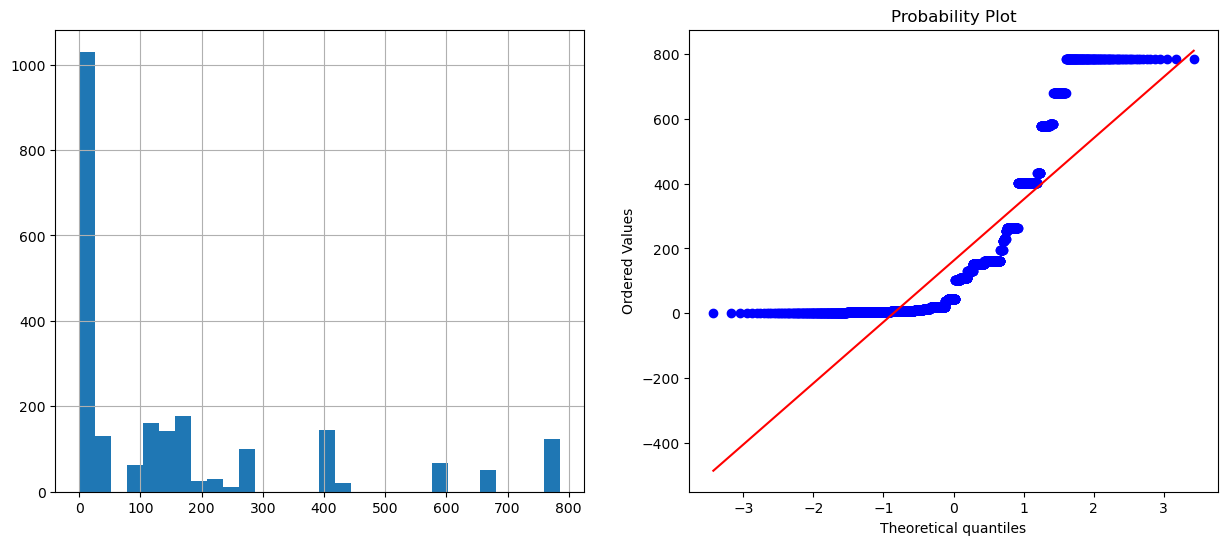

In [142]:
# Cap altitude column at 3% and 97% quantiles.
X_train_transformed['alt'] = np.where(X_train_transformed['alt'] < 0, 0, 
                                      np.where(X_train_transformed['alt'] > 785, 785,
                                               X_train_transformed['alt']))
X_test_transformed['alt'] = np.where(X_test_transformed['alt'] < 0, 0,
                                     np.where(X_test_transformed['alt'] > 785, 785,
                                              X_test_transformed['alt']))

diagnostic_plots(X_train_transformed, 'alt')

For the remaining 3 variables, looking at the distribution and quantiles, I performed various percentages of winsorization (trimming) - from 1% to 3% on either or both tails, as outlined in [section 4.2 of my report](#part4.2).

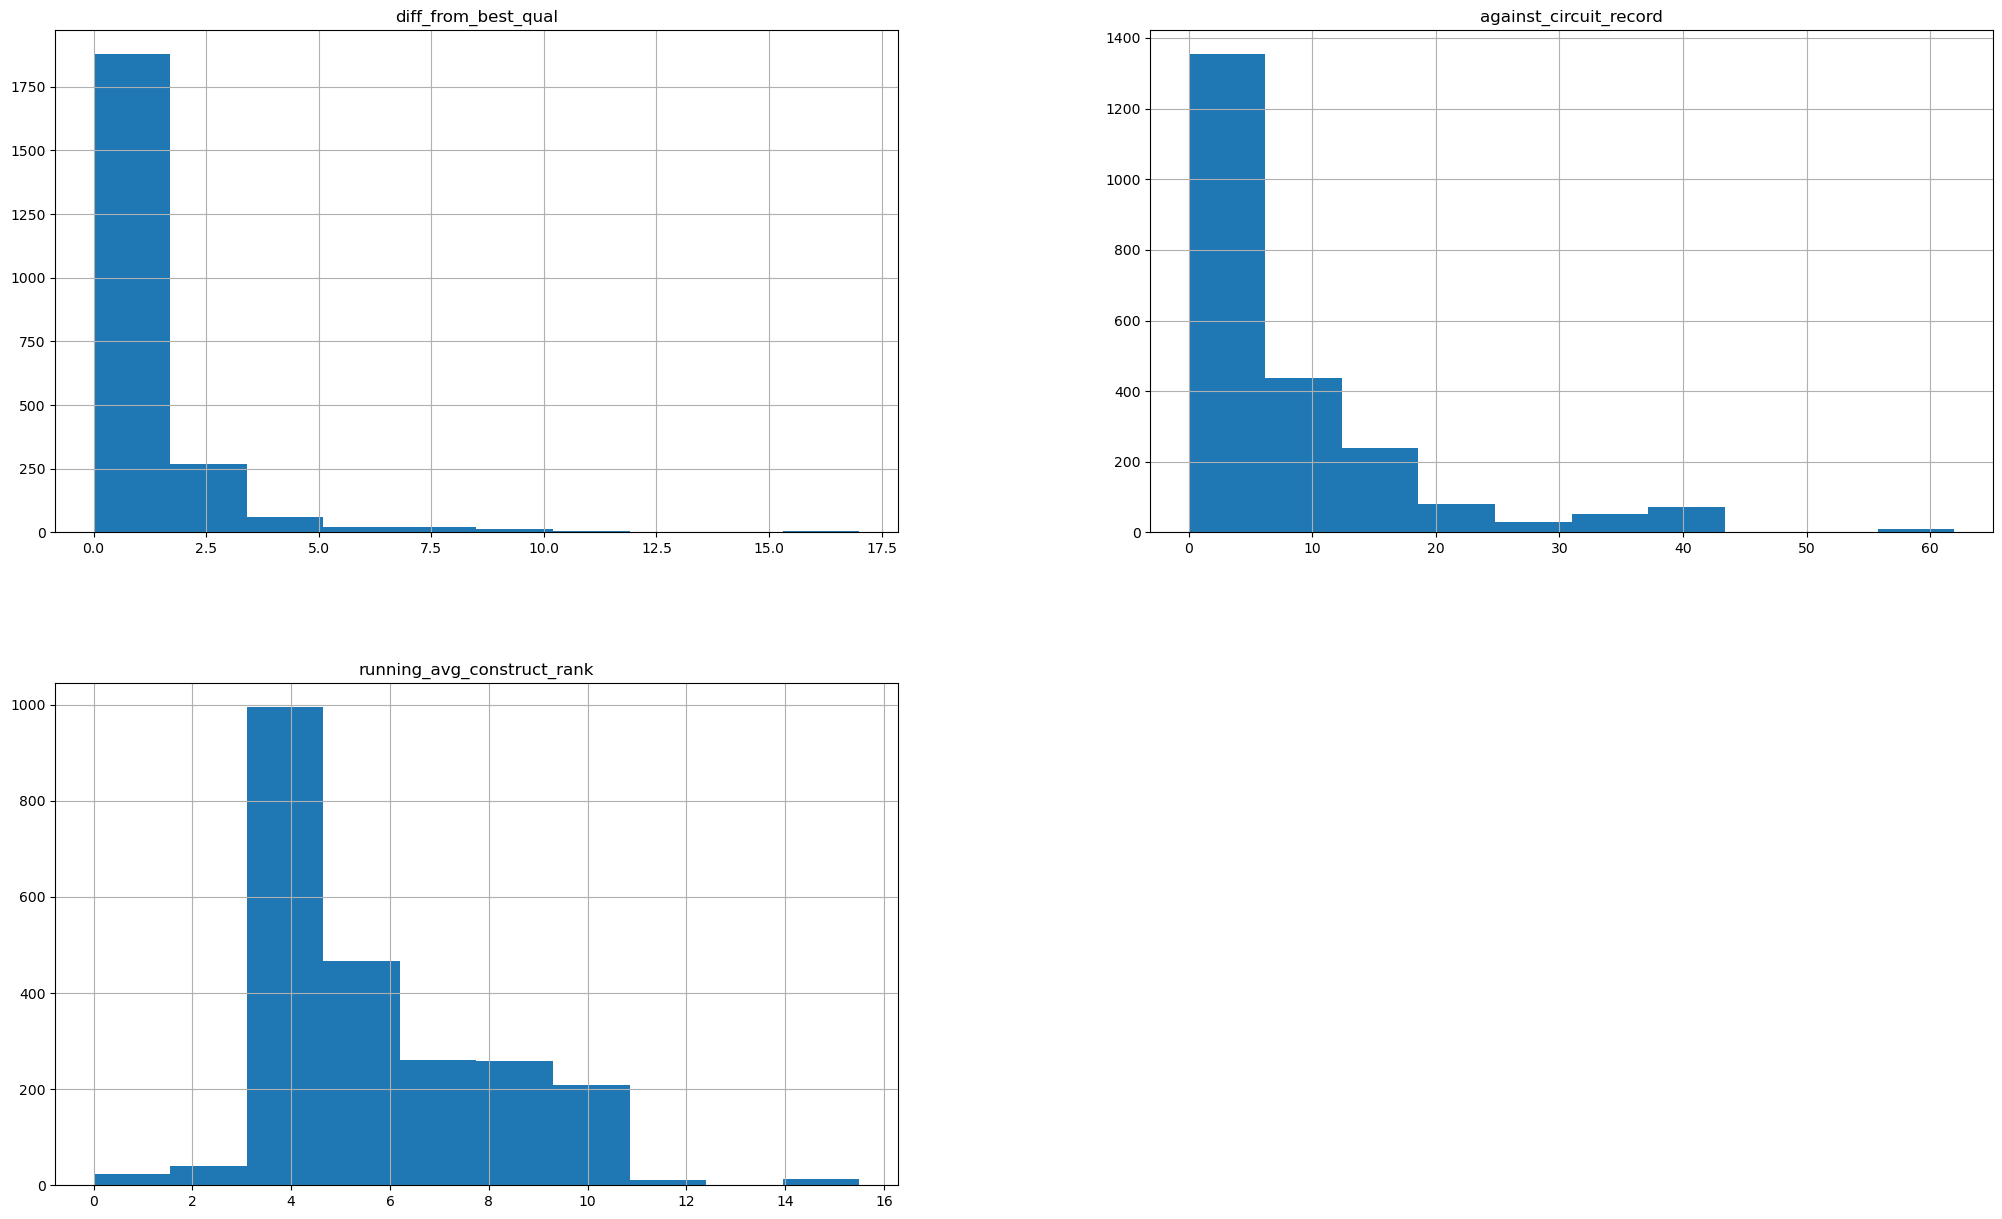

In [144]:
# Plot the histogram of only the remaining variables.
X_train_transformed[outliers[:3]].hist(figsize=(25,15))
plt.show()

In [145]:
# Find suitable quantiles to limit their outliers.
for c in outliers[:3]:
    print(c)
    quantile_finder(X_train_transformed, c)

diff_from_best_qual
0.01 quantile: 0.0
0.99 quantile: 8.925609999999994

0.03 quantile: 0.0
0.97 quantile: 5.237966666666658

0.05 quantile: 0.0
0.95 quantile: 3.852016666666684

against_circuit_record
0.01 quantile: 0.017413333333343956
0.99 quantile: 40.98488

0.03 quantile: 0.30996333333333936
0.97 quantile: 38.729780000000034

0.05 quantile: 0.5372499999999975
0.95 quantile: 35.00148333333333

running_avg_construct_rank
0.01 quantile: 2.0774999999999997
0.99 quantile: 10.870815217391305

0.03 quantile: 3.117419712070875
0.97 quantile: 10.197189153439155

0.05 quantile: 3.1878617281321677
0.95 quantile: 10.0



In [146]:
# Display the number of rows and columns. This can help determine how many rows we will lose with outlier handling below.
print(X_train_transformed.shape, X_test_transformed.shape)

(2278, 13) (977, 13)


In [147]:
# Define the rows of interest (masking) - rows that do not contain outliers in these 3 variables.
# diff_from_best_qual must fall below 97% quantile.
# against_circuit_record must fall below 99% quantile.
# running_avg_construct_rank must fall between 1% and 99% quantile.
rows_of_interest = ((X_train_transformed['diff_from_best_qual'] < X_train_transformed['diff_from_best_qual'].quantile(0.97)) & \
                    (X_train_transformed['against_circuit_record'] < X_train_transformed['against_circuit_record'].quantile(0.99)) & \
                    (X_train_transformed['running_avg_construct_rank'] < X_train_transformed['running_avg_construct_rank'].quantile(0.99)) & \
                    (X_train_transformed['running_avg_construct_rank'] > X_train_transformed['running_avg_construct_rank'].quantile(0.01)))
                    

# Keep only the rows of interest for input and target variables.
X_train_transformed = X_train_transformed.loc[rows_of_interest, :]
y_train = y_train.loc[rows_of_interest]

# Apply a similar concept to the testing dataset, except we use the maximum and/or minimums of the training dataset.
test_rows_of_interest = ((X_test_transformed['diff_from_best_qual'] < X_train_transformed['diff_from_best_qual'].max()) & \
                         (X_test_transformed['against_circuit_record'] < X_train_transformed['against_circuit_record'].max()) & \
                         (X_test_transformed['running_avg_construct_rank'] < X_train_transformed['running_avg_construct_rank'].max()) & \
                         (X_test_transformed['running_avg_construct_rank'] > X_train_transformed['running_avg_construct_rank'].min()))

# Keep only the rows of interest for input and target variables.
X_test_transformed = X_test_transformed.loc[test_rows_of_interest, :]
y_test = y_test.loc[test_rows_of_interest]

# Display the number of rows lost and how much of the original dataset we have retained.
print(f'No. of train rows dropped: {2278 - X_train_transformed.shape[0]}, out of 2278 rows ({(X_train_transformed.shape[0]/2278)*100}% of original left)')
print(f'No. of test rows dropped: {977 - X_test_transformed.shape[0]}, out of 977 rows ({(X_test_transformed.shape[0]/977)*100}% of original left)')

No. of train rows dropped: 131, out of 2278 rows (94.24934152765584% of original left)
No. of test rows dropped: 40, out of 977 rows (95.90583418628455% of original left)


Now plotting the distribution of these 3 variables, the degree of outliers has significantly reduced.

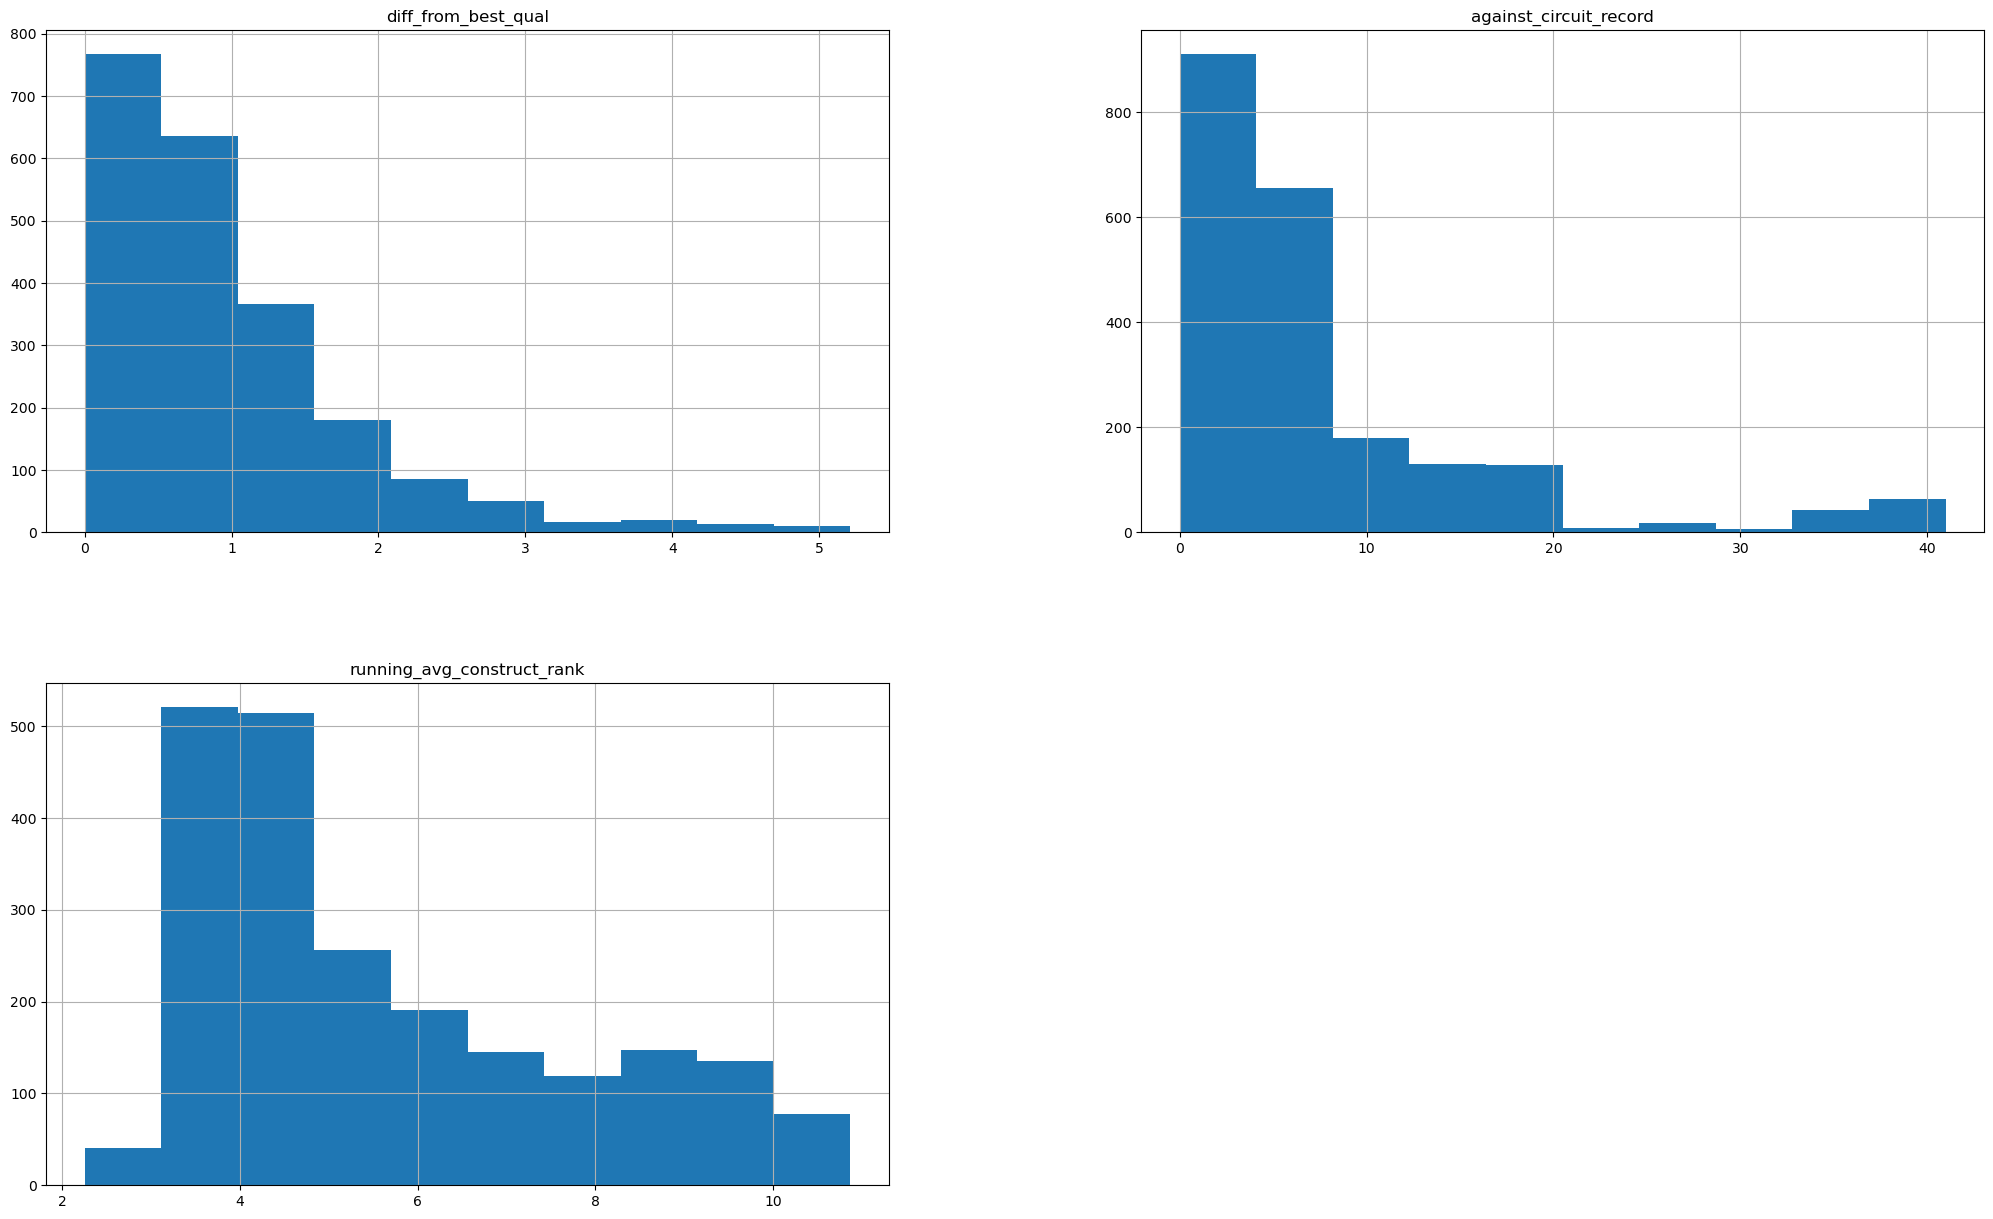

In [149]:
X_train_transformed[outliers[:3]].hist(figsize=(25,15))
plt.show()

For `race_mth`, while it would seem ideal to remove the outlier below 2, it's not necessary as it's discrete and the outlier doesn't seem to have a significant impact.

count    2147.000000
mean        7.179786
std         2.748939
min         0.000000
25%         5.000000
50%         7.000000
75%         9.000000
max        12.000000
Name: race_mth, dtype: float64


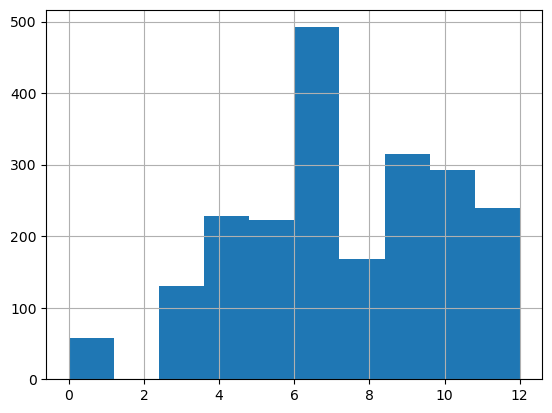

In [151]:
describe_distn(X_train_transformed, 'race_mth')

### 3.3. Data encoding & discretization

For `race_hr`, since it peaks more in the afternoon and it's discrete in nature, I performed 'One-Hot Encoding' where I grouped the race timings into morning, afternoon, and evening (evening was excluded). This was done for both training and testing datasets.

count    2147.000000
mean       11.983698
std         3.386588
min         3.000000
25%        12.000000
50%        12.000000
75%        13.000000
max        20.000000
Name: race_hr, dtype: float64


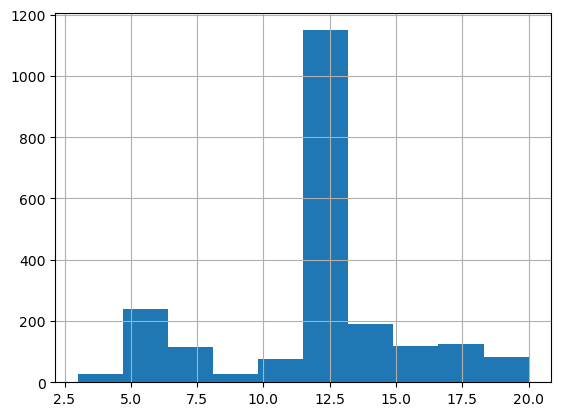

In [154]:
describe_distn(X_train_transformed, 'race_hr')

In [155]:
# Use np.where() to determine if it is a morning race, afternoon race, or neither.
# Then drop race_hr since we have encoded it.

X_train_transformed['morning_race'] = np.where(X_train_transformed['race_hr'] <= 8, 1, 0)
X_train_transformed['afternoon_race'] = np.where((X_train_transformed['race_hr'] > 8) & (X_train_transformed['race_hr'] <= 16), 1, 0)
X_train_transformed = X_train_transformed.drop('race_hr', axis=1)

X_test_transformed['morning_race'] = np.where(X_test_transformed['race_hr'] <= 8, 1, 0)
X_test_transformed['afternoon_race'] = np.where((X_test_transformed['race_hr'] > 8) & (X_test_transformed['race_hr'] <= 16), 1, 0)
X_test_transformed = X_test_transformed.drop('race_hr', axis=1)

# Display the counts of morning_race and afternoon_race.
print(X_train_transformed['morning_race'].value_counts())
print(X_train_transformed['afternoon_race'].value_counts())

morning_race
0    1767
1     380
Name: count, dtype: int64
afternoon_race
1    1561
0     586
Name: count, dtype: int64


For `alt`, since it is discrete and has many peaks and valleys (as seen earlier), equal frequency discretiser is utilised so that the model treats all members of a group similarly (e.g. lower altitude / extremely high altitude).

In [157]:
X_train_transformed['alt'].describe()

count    2147.000000
mean      164.880298
std       224.376323
min         0.000000
25%         7.000000
50%        45.000000
75%       194.000000
max       785.000000
Name: alt, dtype: float64

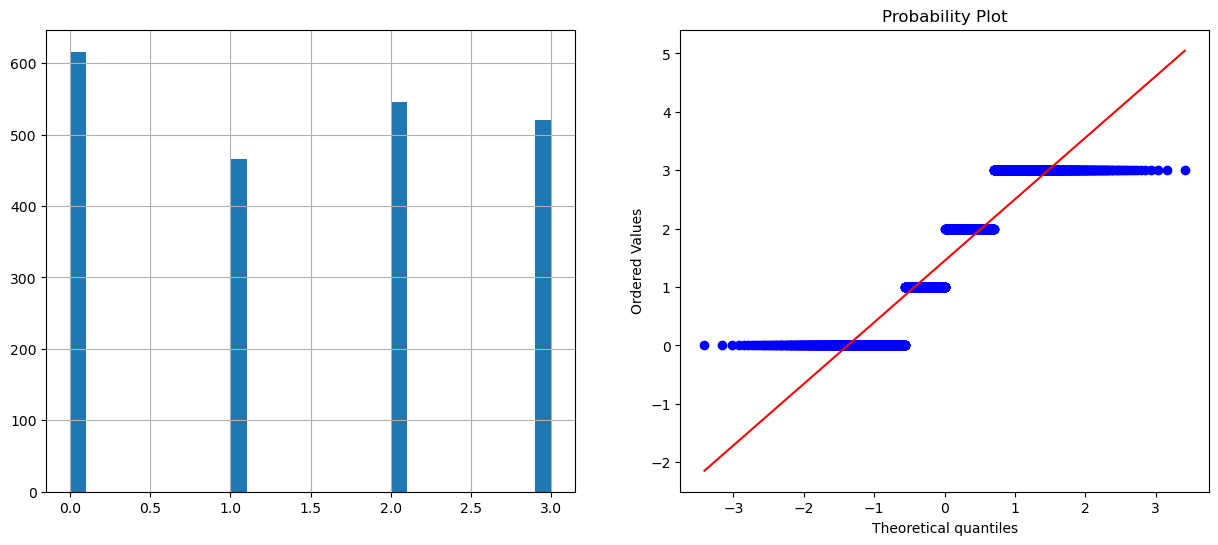

In [158]:
# Initialise EqualFrequencyDiscretiser for altitude.
alt_ewd = EqualFrequencyDiscretiser(q=4, variables='alt')

# Fit on training, transform both training and testing.
X_train_transformed = alt_ewd.fit_transform(X_train_transformed)
X_test_transformed = alt_ewd.transform(X_test_transformed)

diagnostic_plots(X_train_transformed, 'alt')

### 3.4. Numerical data transformation

Now handling skewedness, 7 variables are noted to be right-skewed.

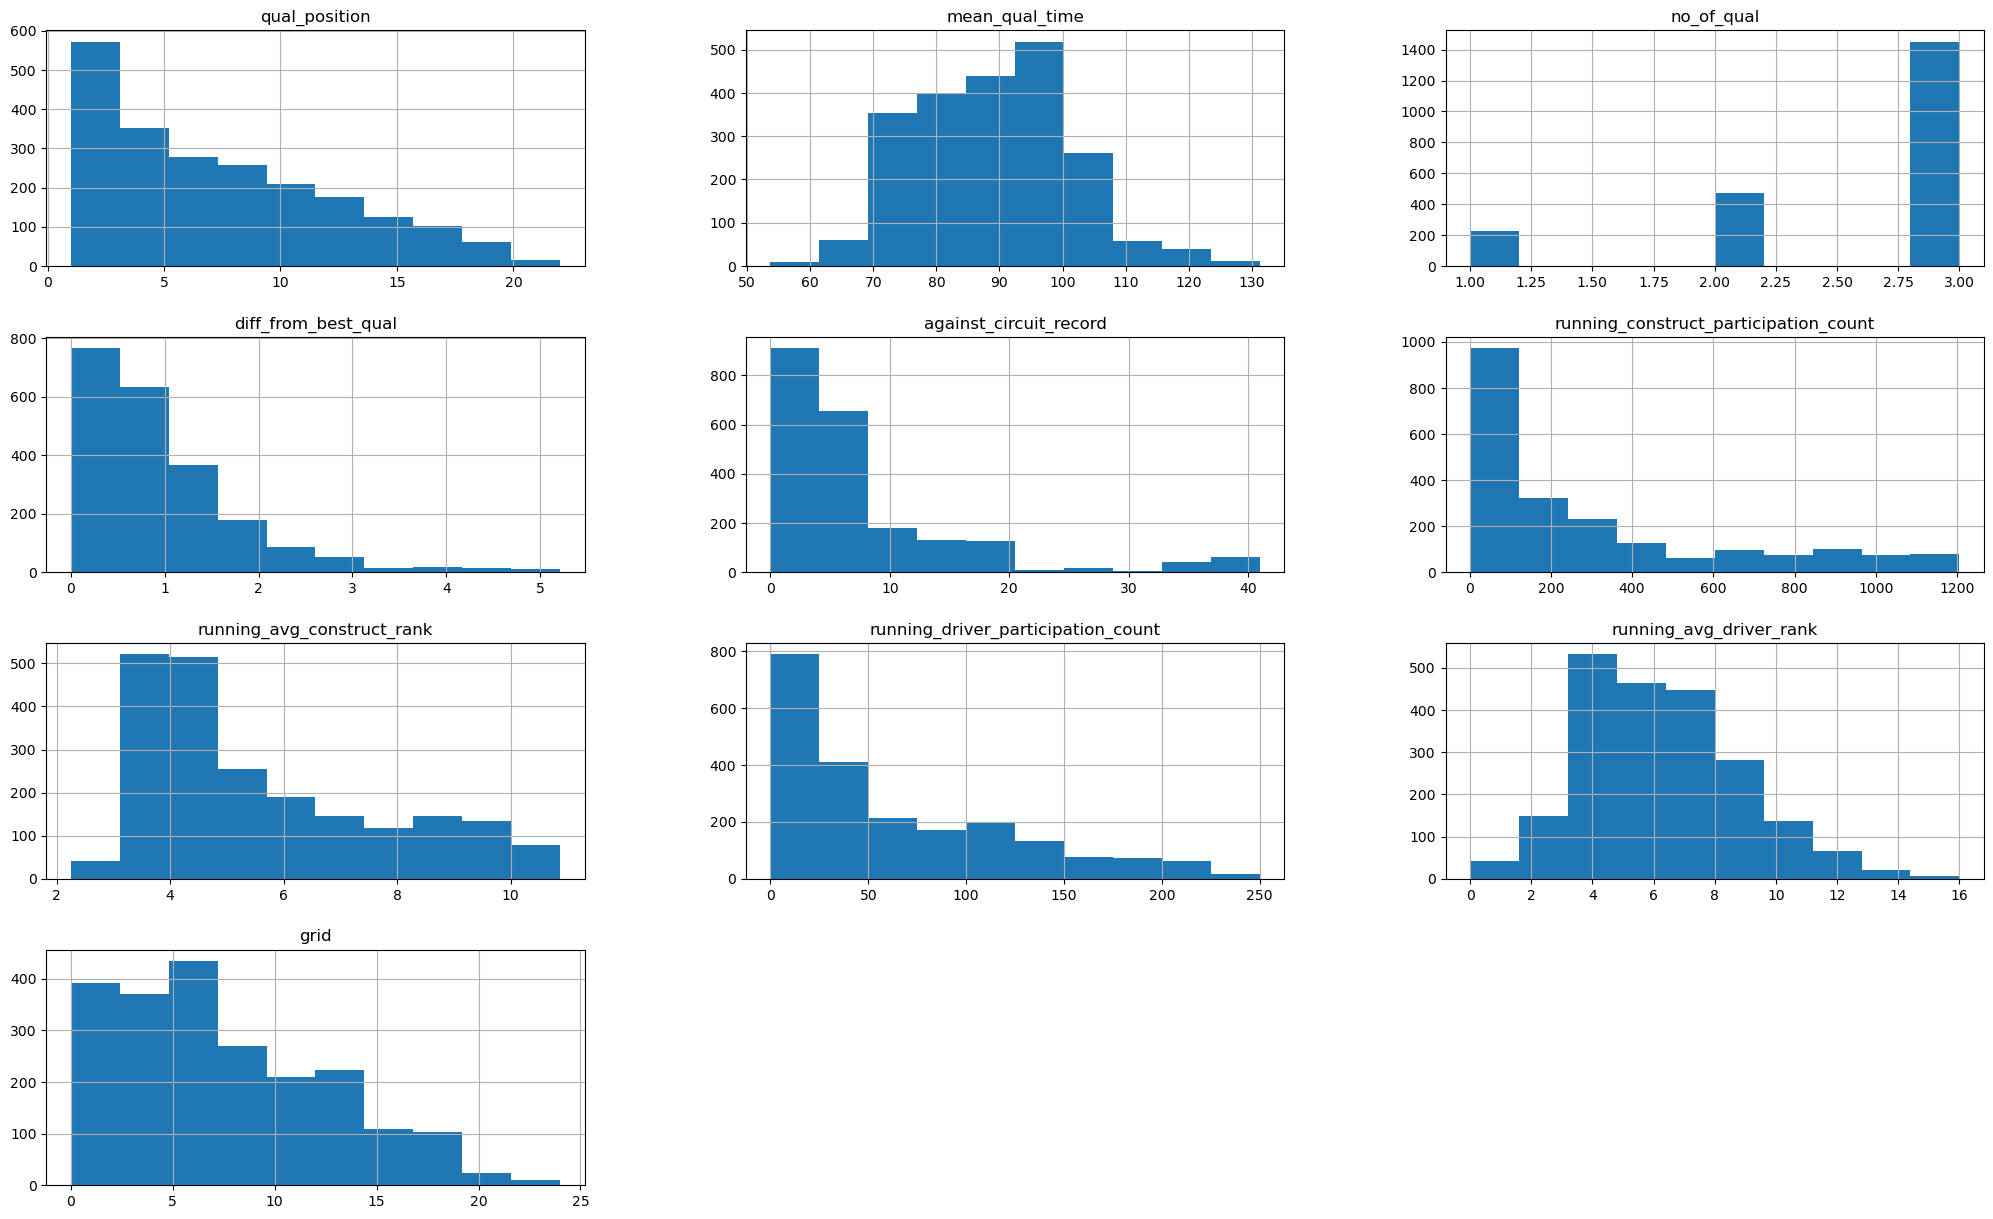

In [161]:
# Plot variables that I haven't handled yet.
X_train_transformed.drop(['morning_race', 'afternoon_race', 'race_mth', 'alt'], axis=1).hist(figsize=(25,15))
plt.show()

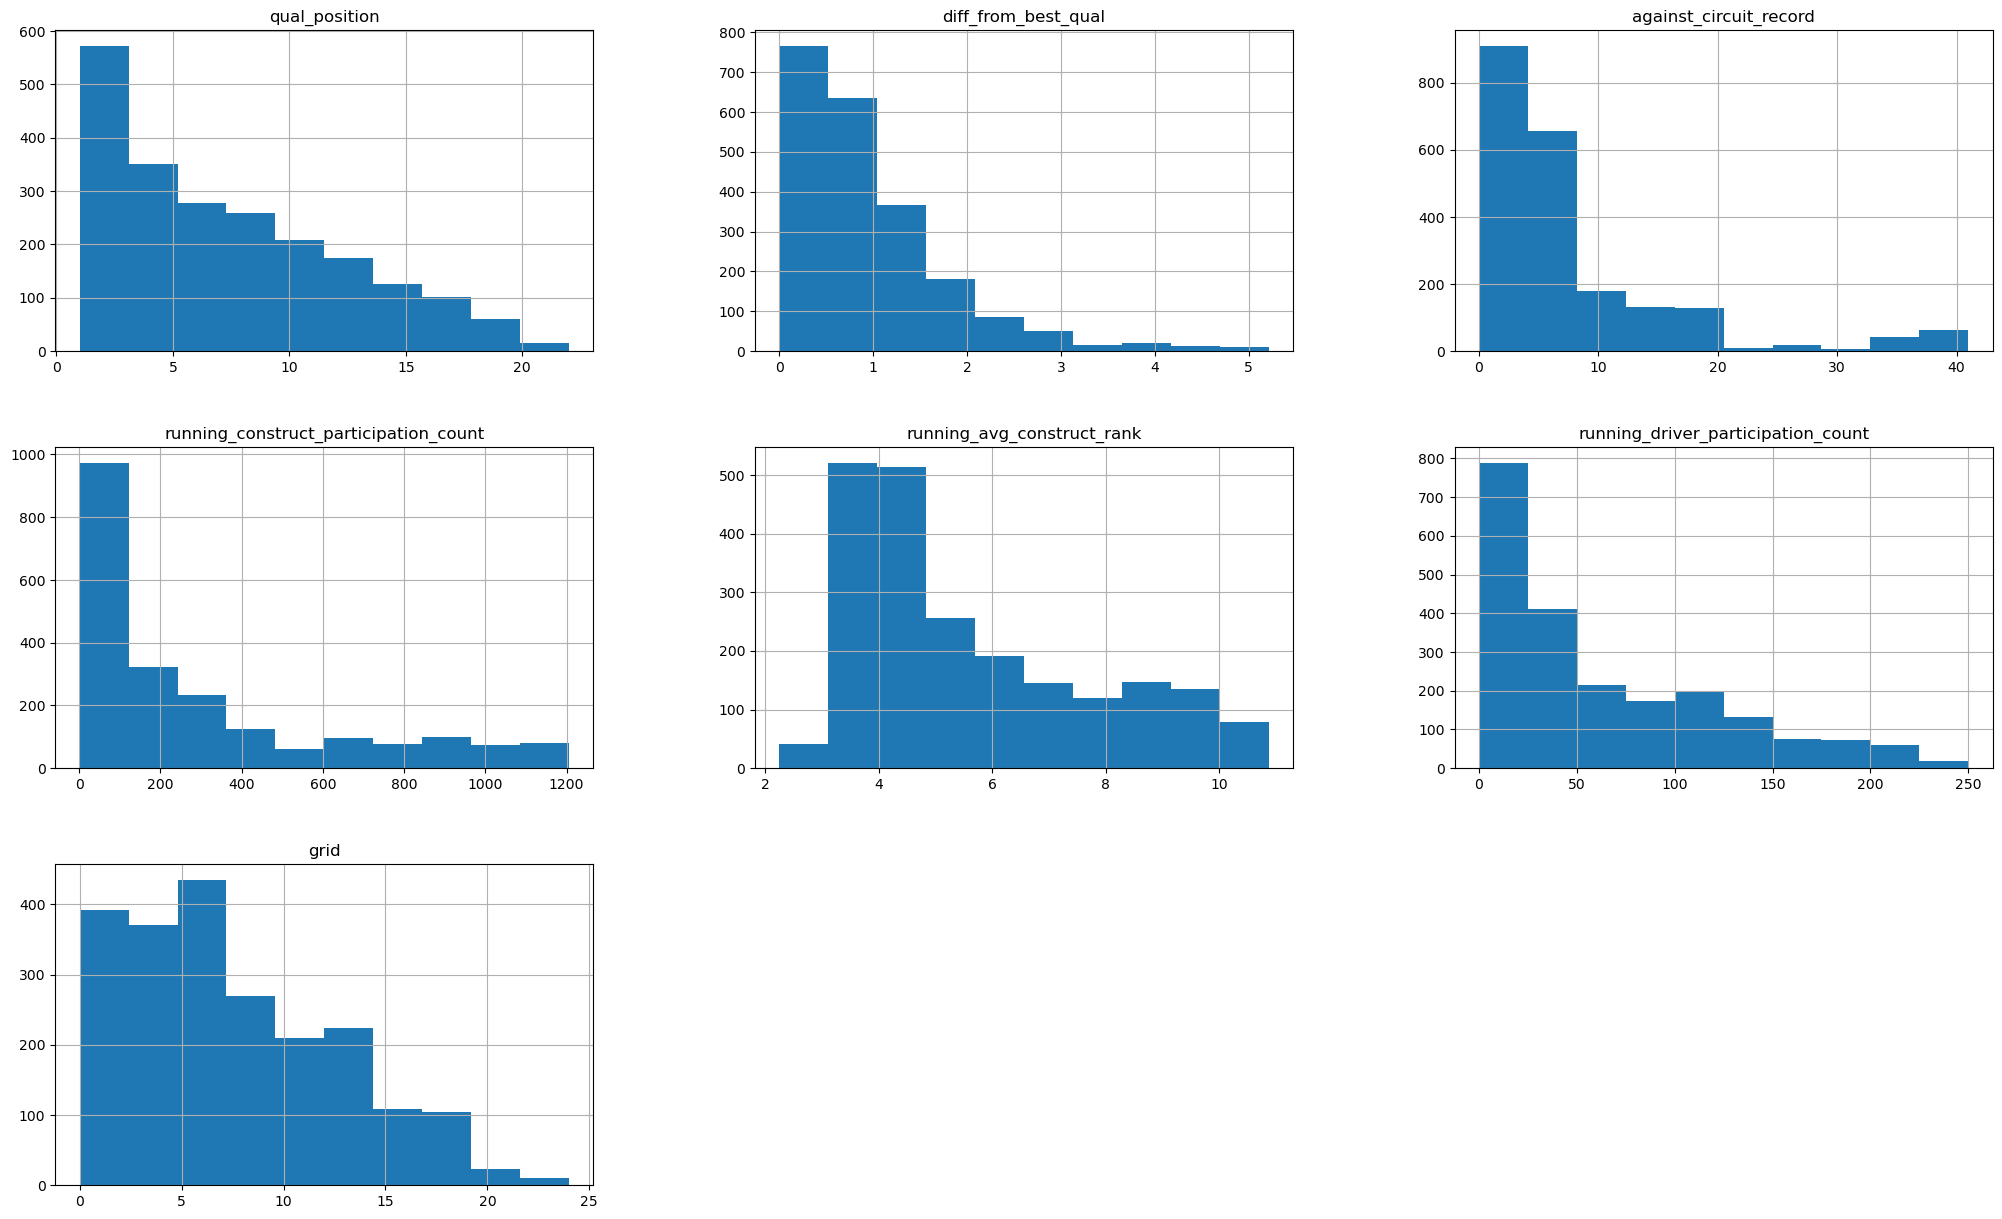

In [162]:
# Define the right skewed variables and plot them.
right_skewed = ['qual_position', 'diff_from_best_qual', 'against_circuit_record',
                'running_construct_participation_count', 'running_avg_construct_rank', 'running_driver_participation_count', 'grid']

X_train_transformed[right_skewed].hist(figsize=(25,15))
plt.show()

I will try 2 transformation techniques (on a copy of the data to not affect actual data) and see if it is effective. For positive variables, I will try Log Transformation (effective in normalising skewed variables). Otherwise, I will try Yeo-Johnson Transformation (it can normalise all types of data).

qual_position: Log Transformation.
diff_from_best_qual: Yeo-Johnson Transformation.
against_circuit_record: Yeo-Johnson Transformation.
running_construct_participation_count: Log Transformation.
running_avg_construct_rank: Log Transformation.
running_driver_participation_count: Yeo-Johnson Transformation.
grid: Yeo-Johnson Transformation.


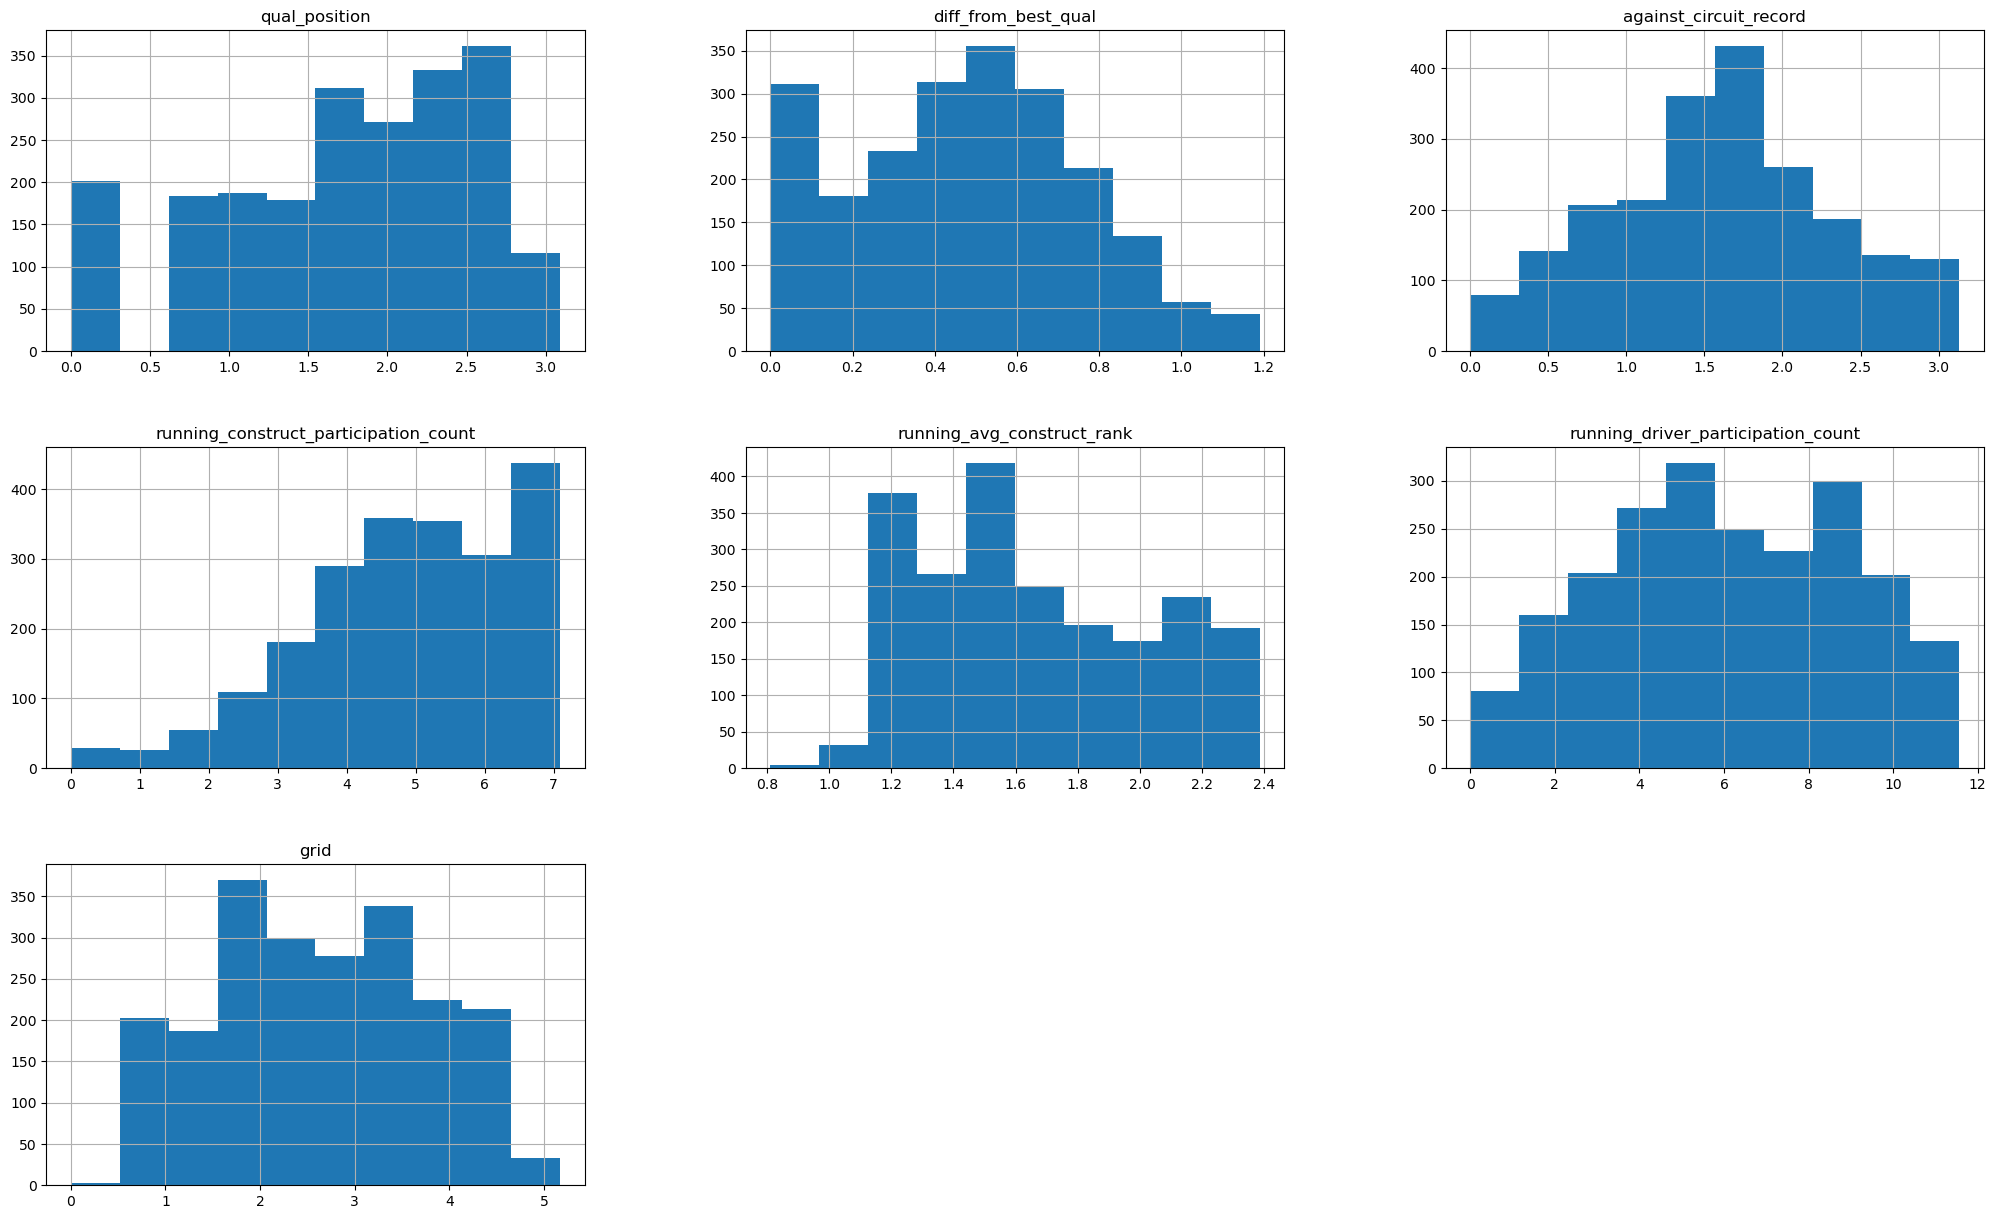

In [164]:
# Create a copy of the transformed variables.
X_train_transformed_copy = X_train_transformed.copy()

for c in right_skewed:
    try: 
        # LogTransformer for positive variables.
        lt = LogTransformer(variables=c)
        X_train_transformed_copy = lt.fit_transform(X_train_transformed_copy)
        print(f'{c}: Log Transformation.')
        
    except ValueError:
        # Means that variable has 0 and/or negative values, try Yeo-Johnson instead.
        yjt = YeoJohnsonTransformer(variables=c)
        X_train_transformed_copy = yjt.fit_transform(X_train_transformed_copy)
        print(f'{c}: Yeo-Johnson Transformation.')

# Plot the histogram of these treated variables.
X_train_transformed_copy[right_skewed].hist(figsize=(25,15))
plt.show()

Corresponding transformation techniques seemed to work for most variables (except `running_construct_participation_count` and `running_avg_construct_rank`). These transformation techniques will be applied on the actual data (except the 2 variables).

In [166]:
# Apply the transformation techniques identified on these skewed variables (except for the 2 variables identified).
lt = LogTransformer(variables=['qual_position'])
X_train_transformed = lt.fit_transform(X_train_transformed)
X_test_transformed = lt.transform(X_test_transformed)

yjt = YeoJohnsonTransformer(variables=['diff_from_best_qual', 'against_circuit_record', 'running_driver_participation_count', 'grid'])
X_train_transformed = yjt.fit_transform(X_train_transformed)
X_test_transformed = yjt.transform(X_test_transformed)

For the remaining 2 variables, I tried Box-Cox Transformation and Reciprocal Transformation. Box-Cox seemed to work for `running_construct_participation_count` and will be applied. However, both transformation worsened `running_avg_construct_rank`, so I will leave it as it is.

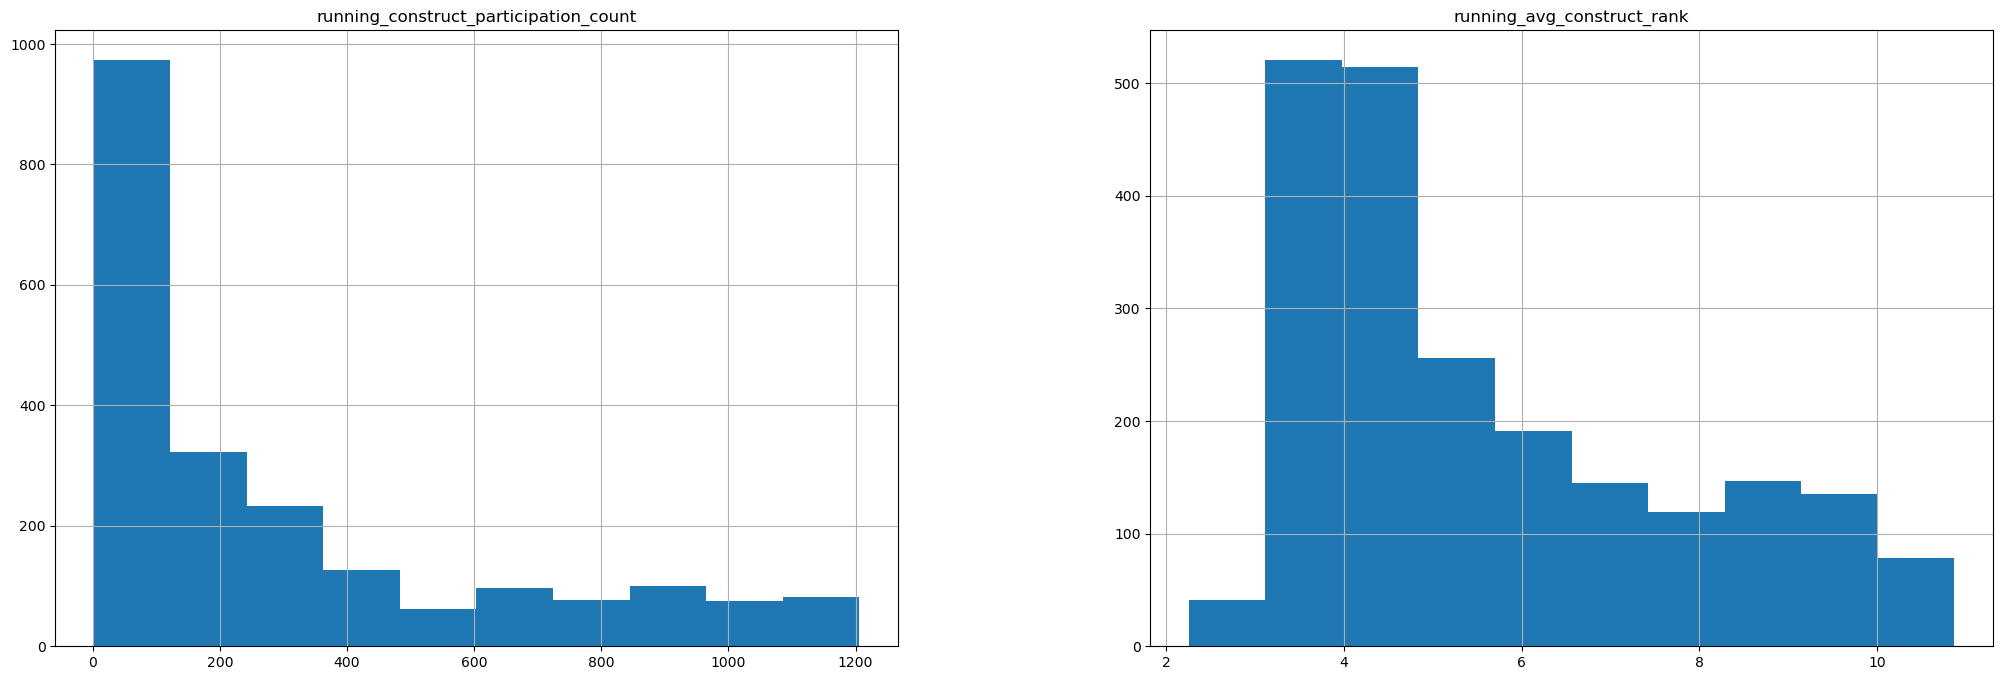

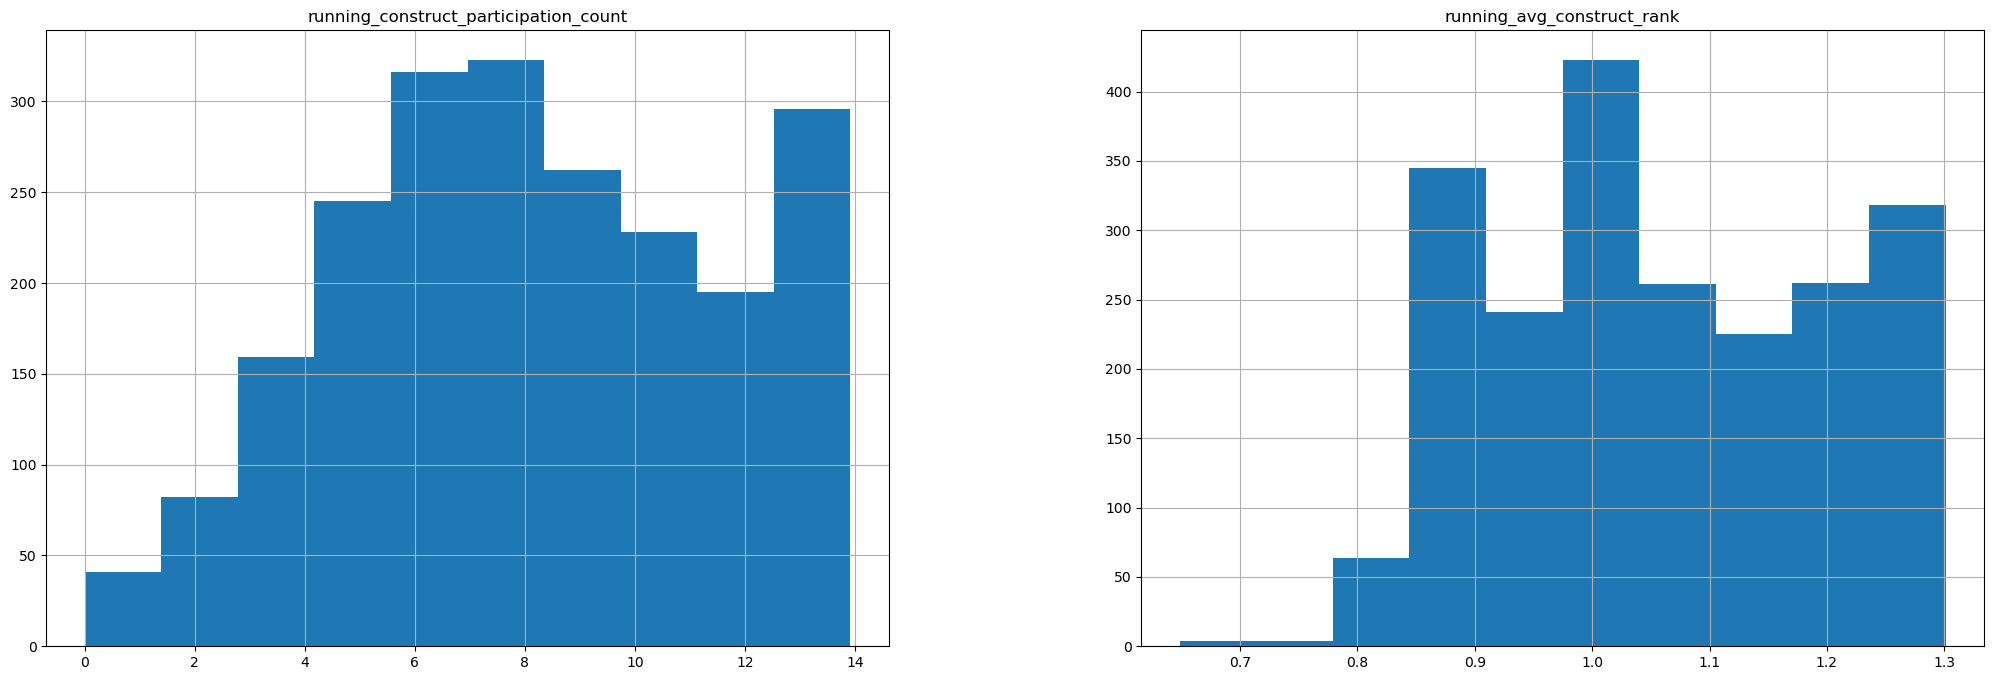

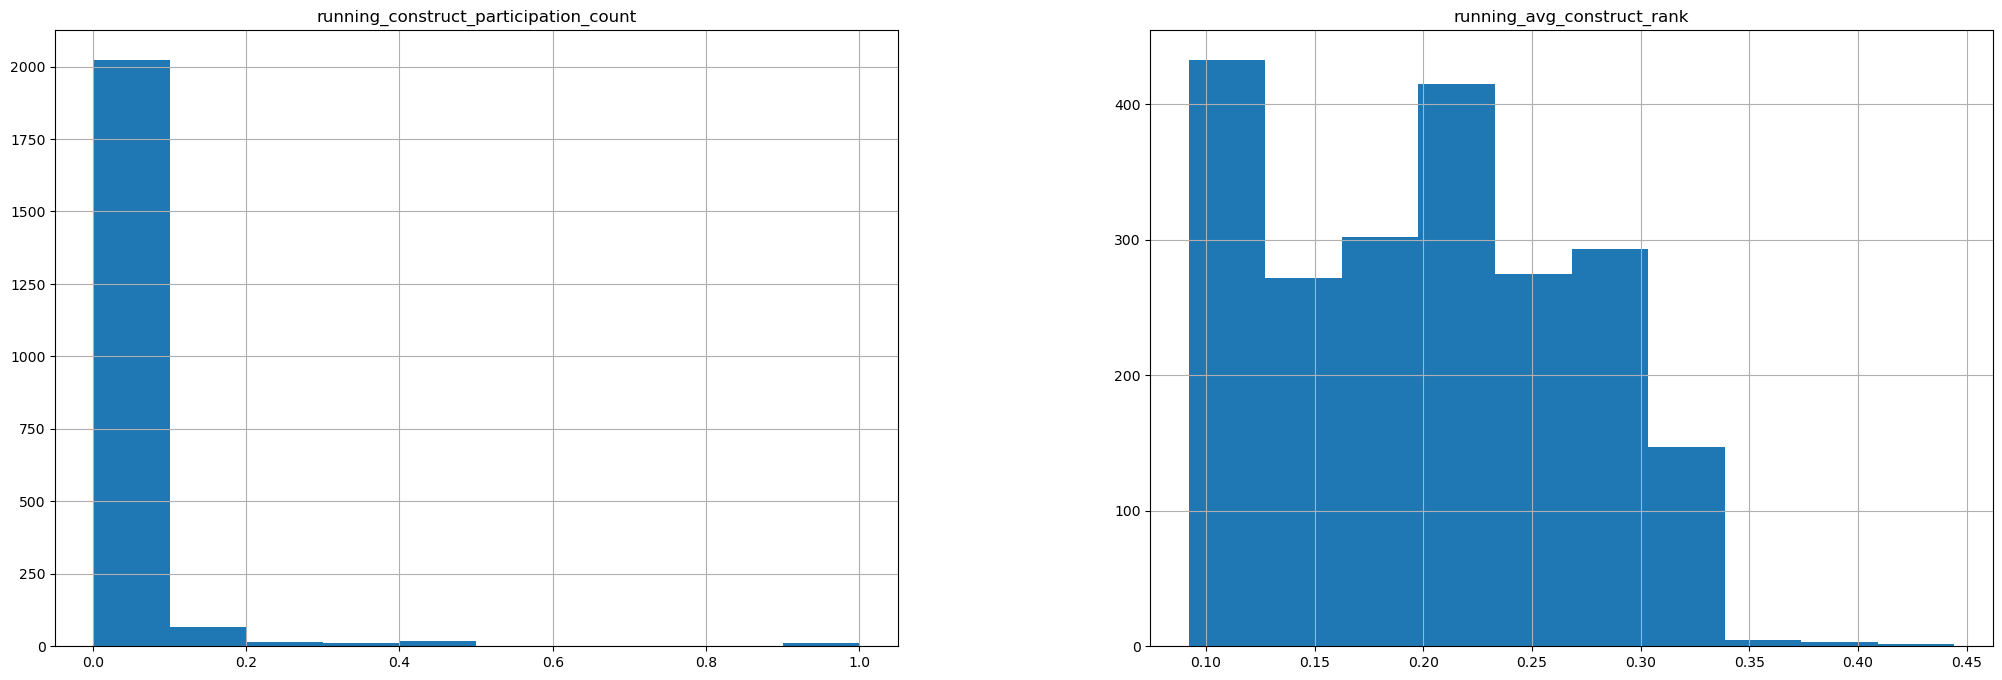

In [168]:
trial_vars = ['running_construct_participation_count', 'running_avg_construct_rank']

# Initialise BoxCoxTransformer and ReciprocalTransformer.
bct = BoxCoxTransformer(variables=trial_vars)
rt = ReciprocalTransformer(variables=trial_vars)

# Before starting, plot the original distribution.
X_train_transformed[trial_vars].hist(figsize=(25,8))

# Try Box-Cox Transformation on these variables and display the distribution.
X_train_transformed_copy = X_train_transformed.copy()
X_train_transformed_copy = bct.fit_transform(X_train_transformed_copy)
X_train_transformed_copy[trial_vars].hist(figsize=(25,8))

# Try Reciprocal Transformation on these variables and display the distribution.
X_train_transformed_copy = X_train_transformed.copy()
X_train_transformed_copy = rt.fit_transform(X_train_transformed_copy)
X_train_transformed_copy[trial_vars].hist(figsize=(25,8))

plt.show()

In [169]:
# Apply Box-Cox Transformer on running_construct_participation_count.
bct = BoxCoxTransformer(variables='running_construct_participation_count')
X_train_transformed = bct.fit_transform(X_train_transformed)
X_test_transformed = bct.transform(X_test_transformed)

Now visualising the distributions, there is no extreme outliers or skewedness.

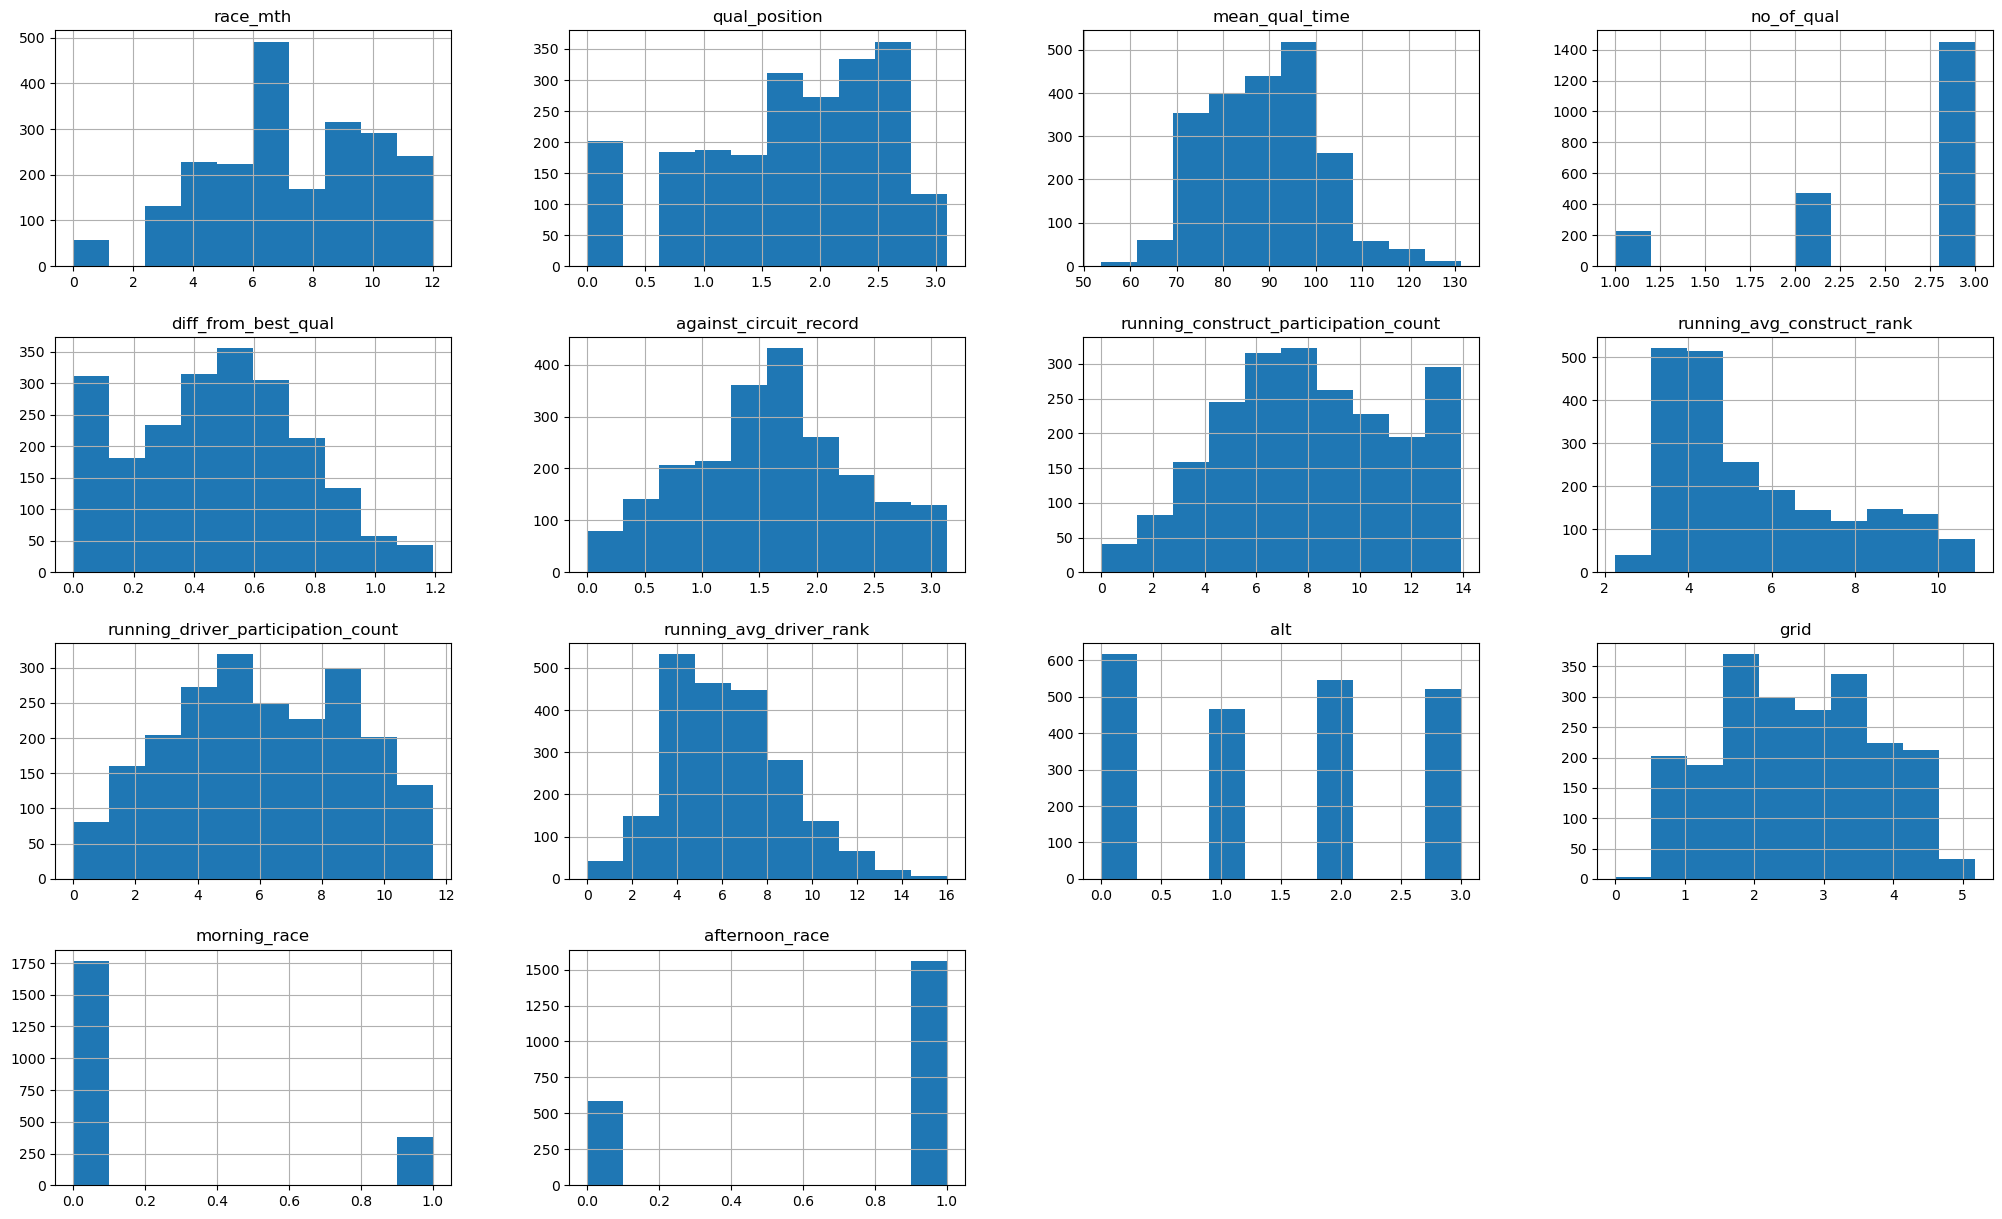

In [171]:
X_train_transformed.hist(figsize=(25,15))
plt.show()

For the last 2 variables I didn't touch, they seem fine on their own (no skewedness or outliers) and will be left as their raw values).

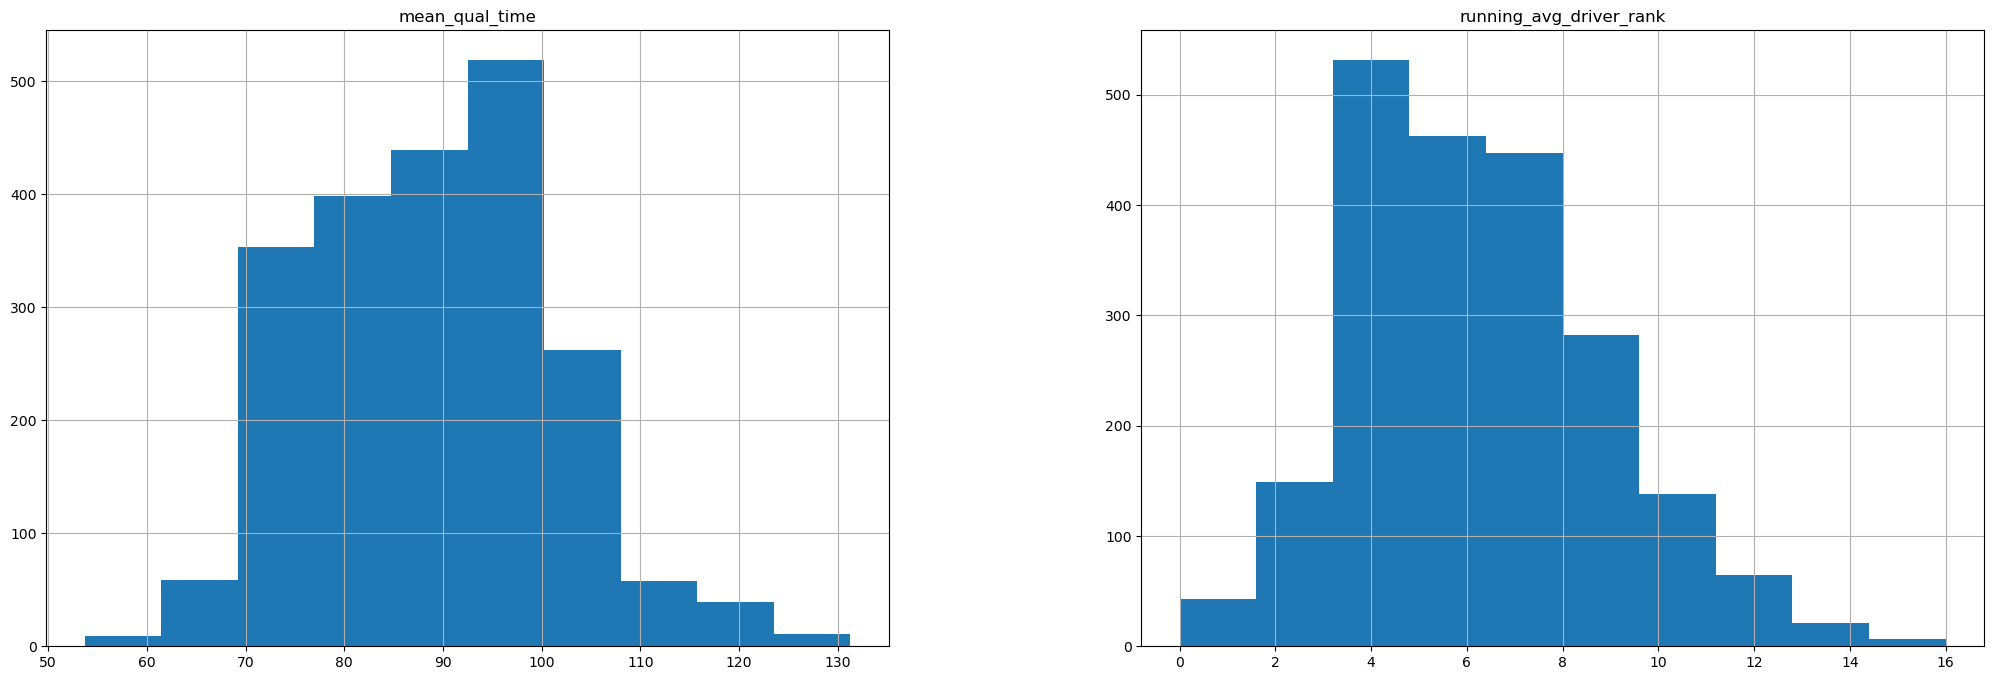

In [173]:
# PLot the selected variables.
remaining_vars = ['mean_qual_time', 'running_avg_driver_rank']
X_train_transformed[remaining_vars].hist(figsize=(25,8))
plt.show()

### 3.5. Correlation analysis & Conclusion

To check for satisifaction of the 2nd assumption of linear regression (that no input variables can have high correlation with each other), I will plot a correlation heatmap. It's noted that `qual_position` has a high correlation with `grid`.

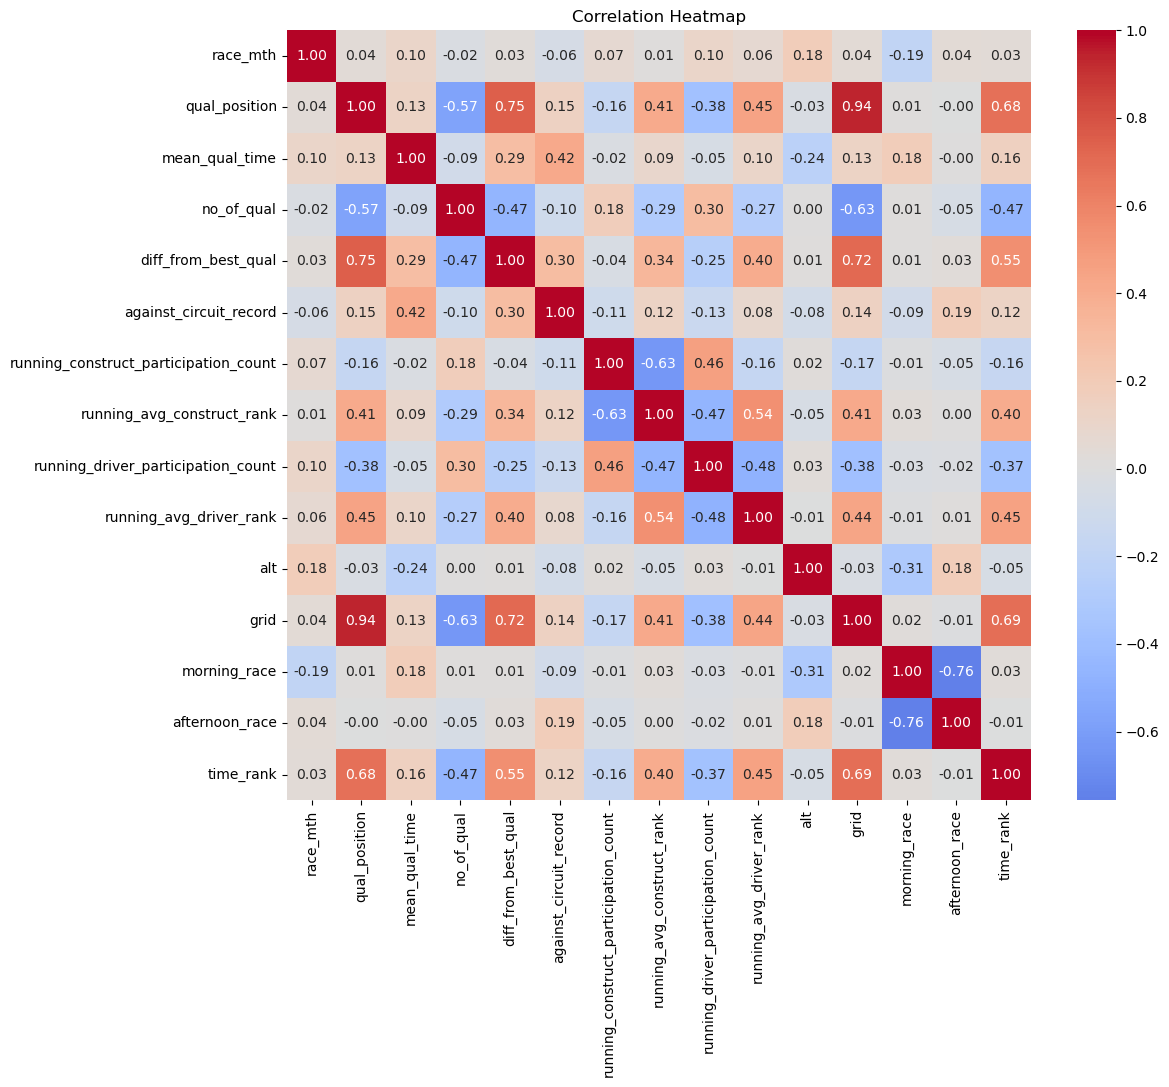

In [176]:
# Create the correlation array.
corr_matrix = X_train_transformed.copy()
corr_matrix['time_rank'] = y_train

corr_matrix = corr_matrix.corr()

# Plot the correlation array as a heatmap.
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title("Correlation Heatmap")
plt.show()

A new column, `starting_pos`, was introduced to combine features of the highly correlated variables (by taking the average of the 2 variables). Then drop the 2 variables (`qual_position` and `grid`).

In [178]:
# The new column takes the average of both variables.
X_train_transformed['starting_pos'] = (X_train_transformed['qual_position'] + X_train_transformed['grid']) / 2
# Drop the 2 variables.
X_train_transformed = X_train_transformed.drop(['qual_position', 'grid'], axis=1)

X_test_transformed['starting_pos'] = (X_test_transformed['qual_position'] + X_test_transformed['grid']) / 2
X_test_transformed = X_test_transformed.drop(['qual_position', 'grid'], axis=1)

Plot the new correlation heatmap. The 2nd assumption is now met.

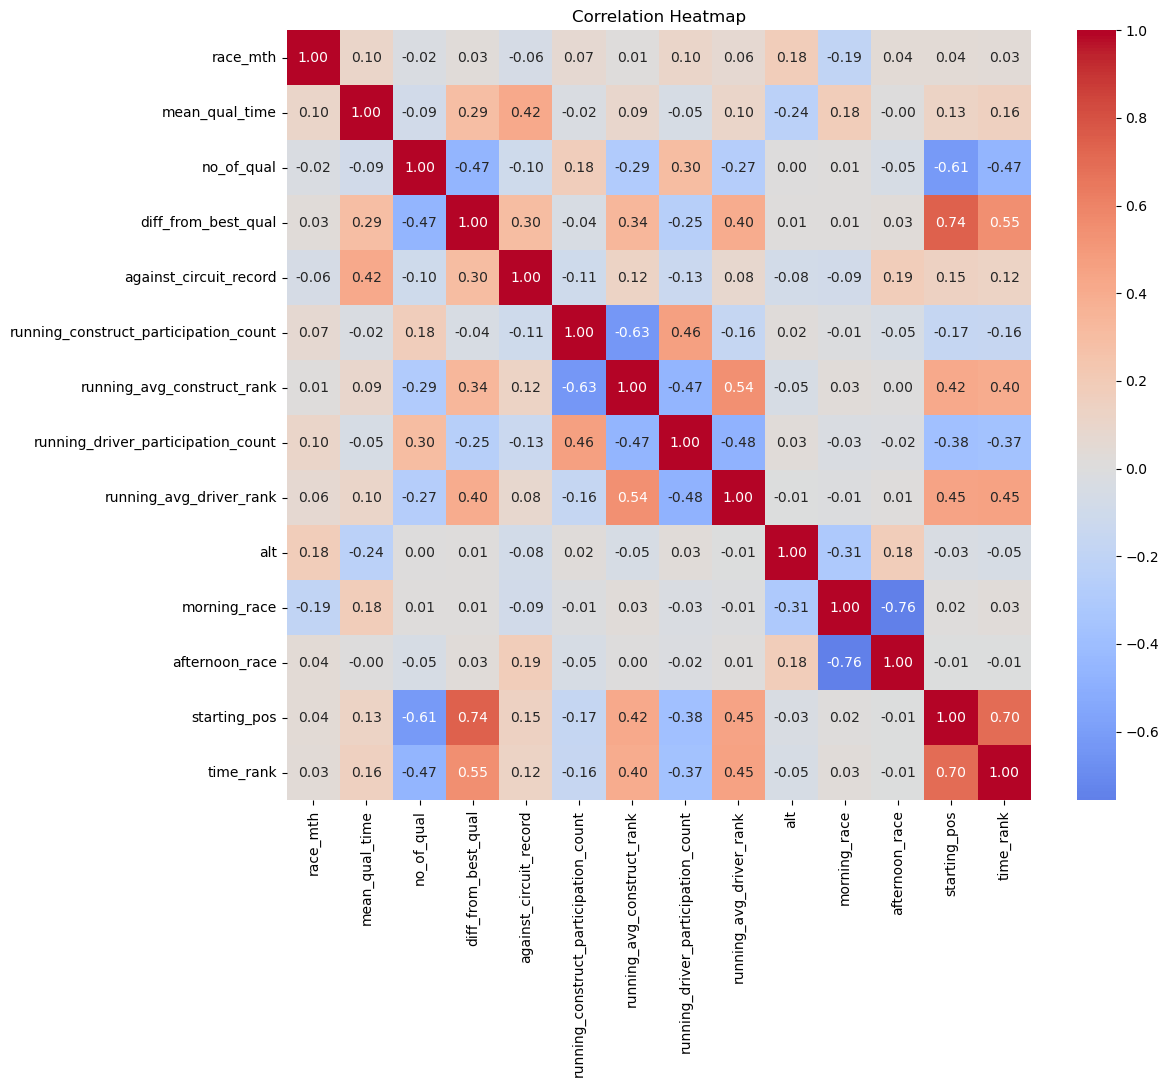

In [180]:
# Plot the new correlation heatmap.
corr_matrix = X_train_transformed.copy()
corr_matrix['time_rank'] = y_train

corr_matrix = corr_matrix.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title("Correlation Heatmap")
plt.show()

The residual distribution is now more stable. Left tail follows normality, and while right tail doesn't look like it follows normality, it actually is due to extreme residuals.

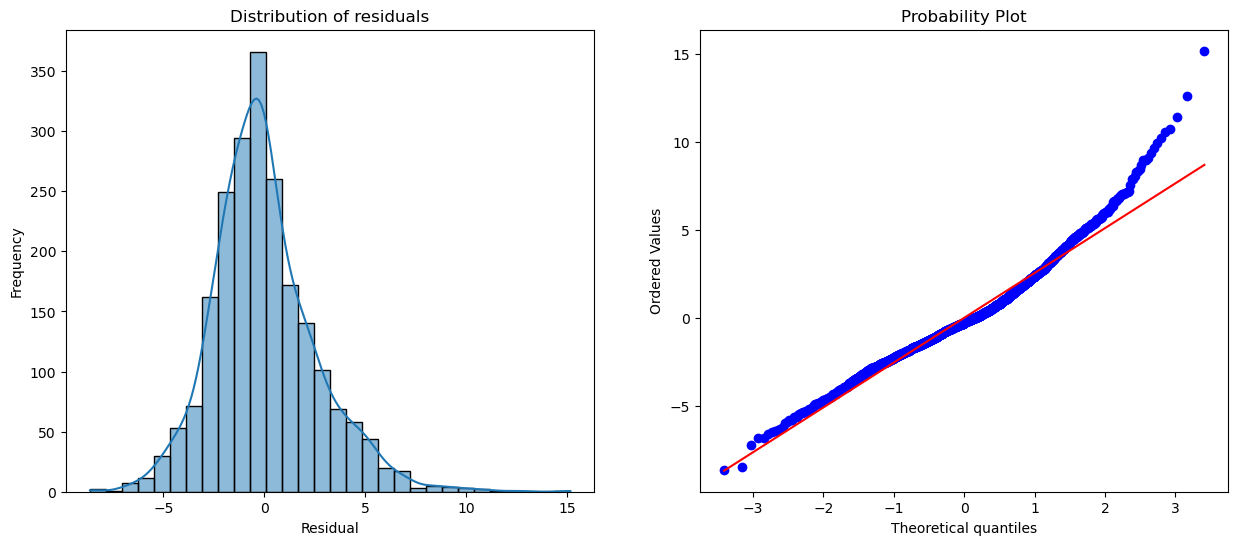

In [182]:
residual_plots(X_train_transformed)

## 4. Machine Learning Model
### 4.1. Naive Baseline Model

Display the rows and columns of the training and testing datasets.

In [185]:
print((X_train_transformed.shape, X_test_transformed.shape))

((2147, 13), (937, 13))


Create the Naive Baseline Model, which will always predict the mean of target variable. Display the R^2, MAE and RMSE.

In [187]:
# Create the arrays of target mean.
y_train_mean = [y_train.mean() for row in X_train_transformed.iloc[:,0]]
y_test_mean = [y_test.mean() for row in X_test_transformed.iloc[:,0]]

# Evaluation.
print('Naive Baseline Model:')

# Calculate and display the R^2, MAE and RMSE.
print("Train R^2:", r2_score(y_train, y_train_mean))
print("Test R^2:", r2_score(y_test, y_test_mean))

print("Train MAE:", mean_absolute_error(y_train, y_train_mean))
print("Test MAE:", mean_absolute_error(y_test, y_test_mean))

print("Train RMSE:", np.sqrt(mean_squared_error(y_train, y_train_mean)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_test_mean)))

Naive Baseline Model:
Train R^2: 0.0
Test R^2: 0.0
Train MAE: 3.075768899271066
Test MAE: 3.1309283129586576
Train RMSE: 3.730808310697298
Test RMSE: 3.7722839999426183


### 4.2. Linear Regression Model

Now create the Linear Regression Model.

In [190]:
# Instantiate the LinearRegression model.
lin_reg = LinearRegression()
lin_reg.fit(X_train_transformed, y_train)

# Predictions.
y_train_pred = lin_reg.predict(X_train_transformed)
y_test_pred = lin_reg.predict(X_test_transformed)

# Evaluation.
print("Train R^2:", r2_score(y_train, y_train_pred))
print("Test R^2:", r2_score(y_test, y_test_pred))

print("Train MAE:", mean_absolute_error(y_train, y_train_pred))
print("Test MAE:", mean_absolute_error(y_test, y_test_pred))

print("Train RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))

Train R^2: 0.5214058262197978
Test R^2: 0.5389498461758233
Train MAE: 1.9344050033500115
Test MAE: 1.9257732616595507
Train RMSE: 2.5809918858647527
Test RMSE: 2.5614062635406265


Evaluate for statistically insignificant predictors.

In [192]:
ln = sm.OLS(y_train, X_train_transformed).fit()
ln.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              time_rank   R-squared (uncentered):                   0.868
Model:                            OLS   Adj. R-squared (uncentered):              0.867
Method:                 Least Squares   F-statistic:                              1077.
Date:                Sun, 17 Aug 2025   Prob (F-statistic):                        0.00
Time:                        15:02:05   Log-Likelihood:                         -5082.6
No. Observations:                2147   AIC:                                  1.019e+04
Df Residuals:                    2134   BIC:                                  1.027e+04
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
race_mth                                  0.0078      0.022      0.352      0.725      -0.036       0.051
mean_qual_time                            0.0106      0.005      2.232      0.026       0.001       0.020
no_of_qual                               -0.3811      0.092     -4.145      0.000      -0.561      -0.201
diff_from_best_qual                       0.7455      0.309      2.411      0.016       0.139       1.352
against_circuit_record                   -0.0961      0.091     -1.053      0.293      -0.275       0.083
running_construct_participation_count     0.0415      0.023      1.793      0.073      -0.004       0.087
running_avg_construct_rank                0.1393      0.040      3.513      0.000       0.062       0.217
running_driver_participation_count       -0.0862      0.025     -3.396      0.001      -0.136      -0.036
running_avg_driver_rank                   0.1584      0.029      5.396      0.000       0.101       0.216
alt                                      -0.0846      0.052     -1.640      0.101      -0.186       0.017
morning_race                              0.1197      0.245      0.490      0.624      -0.360       0.599
afternoon_race                            0.0735      0.197      0.373      0.709      -0.313       0.460
starting_pos                              1.9557      0.094     20.871      0.000       1.772       2.140
==============================================================================
Omnibus:                      244.777   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              471.826
Skew:                           0.728   Prob(JB):                    3.50e-103
Kurtosis:                       4.776   Cond. No.                         520.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Drop all statistically insignificant predictors (`p-value` > 0.05). Then create the Linear Regression model based on this new dataset.

In [194]:
# Define the new datasets.
X_train_refined = X_train_transformed.drop(['race_mth', 'against_circuit_record', 'running_construct_participation_count', 'alt',
                                            'morning_race', 'afternoon_race'], axis=1)

X_test_refined = X_test_transformed.drop(['race_mth', 'against_circuit_record', 'running_construct_participation_count', 'alt',
                                          'morning_race', 'afternoon_race'], axis=1)

In [195]:
# Create the new Linear Regression model, trained on the updated datasets.
lin_reg2 = LinearRegression()
lin_reg2.fit(X_train_refined, y_train)

# Predictions.
y_train_pred = lin_reg2.predict(X_train_refined)
y_test_pred = lin_reg2.predict(X_test_refined)

# Evaluation.
print("Train R^2:", r2_score(y_train, y_train_pred))
print("Test R^2:", r2_score(y_test, y_test_pred))

print("Train MAE:", mean_absolute_error(y_train, y_train_pred))
print("Test MAE:", mean_absolute_error(y_test, y_test_pred))

print("Train RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))

Train R^2: 0.5195440246268193
Test R^2: 0.5366799959813745
Train MAE: 1.9358524315271413
Test MAE: 1.9250924555366118
Train RMSE: 2.5860072316524163
Test RMSE: 2.567703702236928


## 5. Summary and Further Improvements
### 5.1. Summary of findings

Find the distance of 3 Standard Deviations. Also merge the prediction and residuals for each training record.

In [198]:
# Create the new Linear Regression model.
lin_reg = LinearRegression()
lin_reg.fit(X_train_transformed, y_train)

# Predictions.
y_pred = lin_reg.predict(X_train_transformed)

# Calculate the residuals.
residuals = y_train - y_pred

# Calculate the Standard Deviation and limits.
std_residuals = np.std(residuals)
max_deviation = std_residuals * 3
print(max_deviation)

7.742975657594259


In [199]:
# Combine the input variables with target variable.
combined_train = pd.concat([X_train_transformed, y_train], axis=1)

# Introduce the prediction and residual columns.
combined_train['prediction'] = y_pred
combined_train['residual'] = residuals
combined_train.head()

race_mth  mean_qual_time  no_of_qual  diff_from_best_qual  \
476          7       79.825333         3.0             0.233629   
1816         4       93.514000         3.0             0.168800   
3332         9       97.177000         3.0             0.186672   
154          9       83.796000         3.0             0.262023   
56           5       75.702333         3.0             0.446732   

      against_circuit_record  running_construct_participation_count  \
476                 0.909737                               6.049944   
1816                3.113453                              12.137727   
3332                0.194255                              13.738275   
154                 1.590852                               4.083569   
56                  1.646609                               1.855083   

      running_avg_construct_rank  running_driver_participation_count  \
476                     4.730159                            5.113532   
1816                    3.199426                            7.558195   
3332                    3.363636                           10.637618   
154                     3.681818                            3.402680   
56                      7.400000                            1.966159   

      running_avg_driver_rank  alt  morning_race  afternoon_race  \
476                  3.703704    2             0               1   
1816                 3.410959    0             0               1   
3332                 3.221649    1             0               1   
154                  3.090909    2             0               1   
56                   6.750000    0             0               1   

      starting_pos  time_rank  prediction  residual  
476       1.704942          5    4.112010  0.887990  
1816      0.987689          8    2.537472  5.462528  
3332      1.392768          1    3.486139 -2.486139  
154       2.181815          2    4.873647 -2.873647  
56        2.704162          7    7.191910 -0.191910

Create a subset of `combined_train` that holds residuals exceeding 3 Standard Deviations from mean (0) - i.e. outliers.

In [201]:
# Create a subset of the DataFrame where residuals exceed 3 SD.
invalid_pred = combined_train[(combined_train['residual'] > max_deviation) | (combined_train['residual'] < -max_deviation)]
invalid_pred.head()

race_mth  mean_qual_time  no_of_qual  diff_from_best_qual  \
3043         0       92.872333         3.0             0.580355   
3595         4       74.852333         3.0             0.149859   
3298         7       72.707667         3.0             0.339585   
2086         4       93.448333         3.0             0.415522   
345          9       96.716667         3.0             0.414035   

      against_circuit_record  running_construct_participation_count  \
3043                0.664971                               3.922439   
3595                0.524945                              10.623489   
3298                0.472845                               5.060497   
2086                3.112331                              13.045624   
345                 2.542198                               4.799438   

      running_avg_construct_rank  running_driver_participation_count  \
3043                    8.950000                            6.345026   
3595                    4.330144                            8.499574   
3298                    4.263158                           10.869409   
2086                    3.158405                            8.815659   
345                     8.606061                            4.493081   

      running_avg_driver_rank  alt  morning_race  afternoon_race  \
3043                 7.043478    0             1               0   
3595                 7.504950    1             0               1   
3298                 4.280193    2             0               1   
2086                 5.357143    0             0               1   
345                  7.000000    2             0               1   

      starting_pos  time_rank  prediction   residual  
3043      2.847681         17    7.918961   9.081039  
3595      0.987689         11    3.126720   7.873280  
3298      1.961914         12    4.143666   7.856334  
2086      1.907674         15    4.781493  10.218507  
345       1.961914         14    5.939513   8.060487

Display the number of rows that have outlier residuals. Then plot the box-plot of all input variables to find if there's a pattern in why residuals are extreme.

In [203]:
print(f'No. of rows with residuals exceeding 3 SD from mean: {invalid_pred.shape[0]}')

No. of rows with residuals exceeding 3 SD from mean: 21


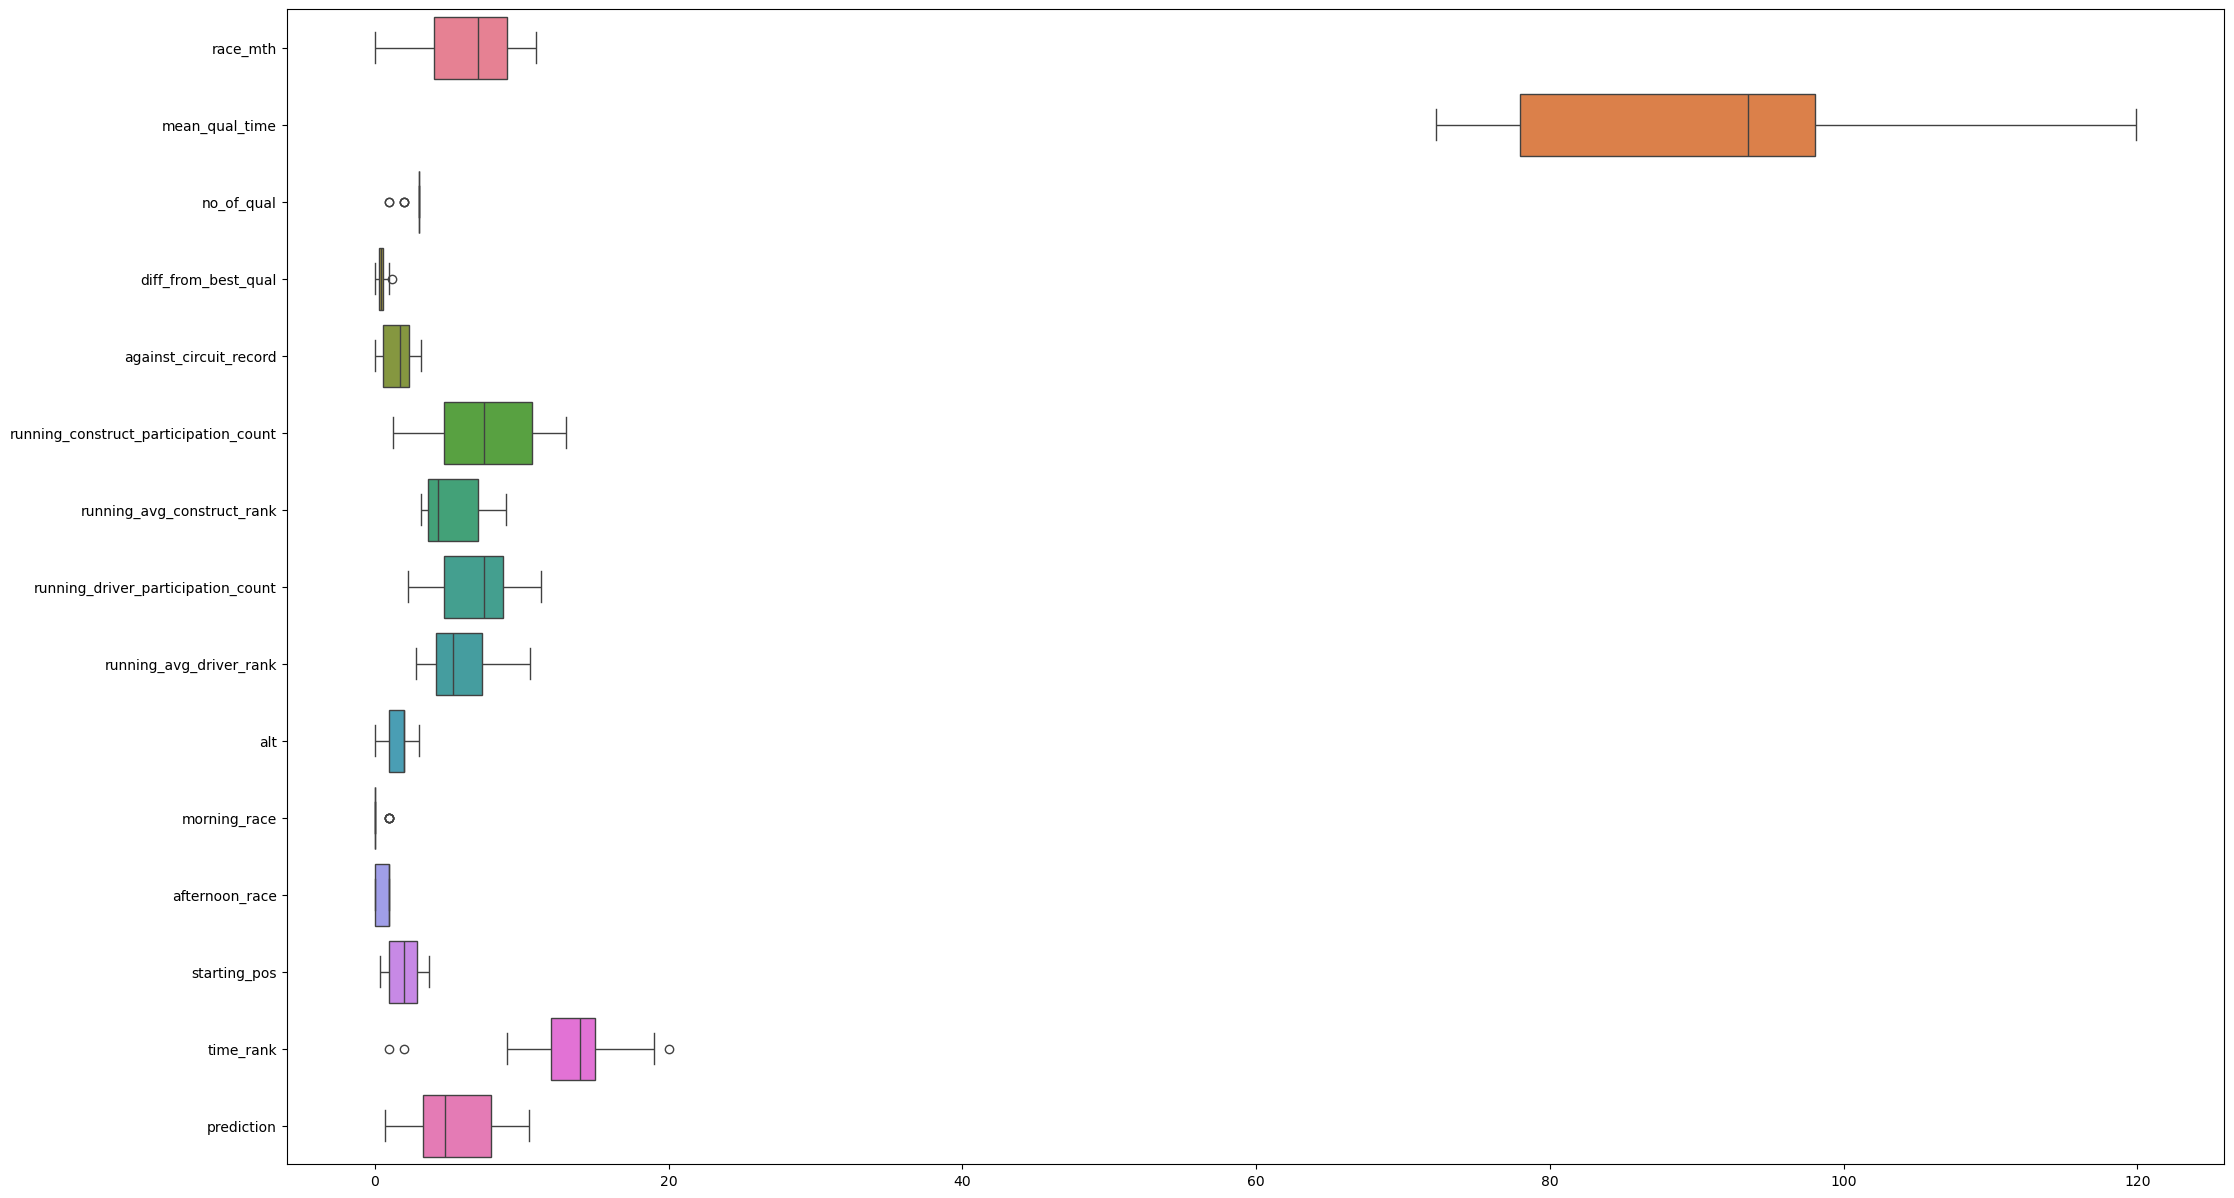

In [204]:
# Plot the boxplot.
plt.figure(figsize=(25,15))
sns.boxplot(invalid_pred.drop('residual', axis=1), orient='h')
plt.show()

Extreme residuals are probably due to low `time_rank` (50% of `time_rank` fall between 12 and 15), as explained in [section 6.1 of my report](#part6.1).

In [206]:
# Display numeric measures of time_rank.
invalid_pred['time_rank'].describe()

count    21.000000
mean     13.380952
std       4.695489
min       1.000000
25%      12.000000
50%      14.000000
75%      15.000000
max      20.000000
Name: time_rank, dtype: float64

# Assignment part 2: Report <a id="section2"></a>
## Table of contents
#### 1. [Introduction with Value Based Problem Statement](#part1)
- [1.1. Introduction to Formula 1](#part1.1)
- [1.2. The problem](#part1.2)

#### 2. [Problem Formulation](#part2)
- [2.1. Tables selected & Exploratory Data Analysis](#part2.1)
- [2.2. The prediction problem](#part2.2)

#### 3. [Data Wrangling on multiple tables](#part3)
- [3.1. Preparing tables individually & feature engineering](#part3.1)
- [3.2. Merging all the tables](#part3.2)

#### 4. [Data Cleansing and Transformation](#part4)
- [4.1. Missing value imputation & data transformation preparations](#part4.1)
- [4.2. Outlier handling](#part4.2)
- [4.3. Data encoding & discretization](#part4.3)
- [4.4. Numerical data transformation](#part4.4)
- [4.5. Correlation analysis & Conclusion](#part4.5)

#### 5. [Machine Learning Model](#part5)
- [5.1. Naive Baseline Model](#part5.1)
- [5.2. Linear Regression Model](#part5.2)
- [5.3. Comparing the 2 models](#part5.3)

#### 6. [Summary and Further Improvements](#part6)
- [6.1. Summary of findings](#part6.1)
- [6.2. Possible further improvements](#part6.2)

#### 7. [Reflection](#part7)

#### 8. [References](#part8)

## 1. Introduction with Value Based Problem Statement <a id="part1"></a>
### 1.1. Introduction to Formula 1 <a id="part1.1"></a>
The Formula 1 is the world’s most prestigious and anticipated single-seater racing competition, with a Grand Prix occurring every 1 to 2 weekends. Each race, the grid comprises of 10 teams and 20 drivers, with each team fielding 2 drivers. In 2025, there are 24 scheduled Grand Prix weekends, meaning that teams will compete in 24 different circuits.


For each circuit, characteristics will differ – some have multiple sharp turns, while others allow for easy overtaking. Teams may deploy different drivers throughout the year, meaning that the drivers' skills and performances may differ from race to race. Simultaneously, some constructors are known to produce better performing race cars and, in return, better performing drivers (such as Mercedes, who won the constructor championships for 8 years consecutively). All this shows that positions throughout the year are bound to fluctuate – in 1 race, a driver could be on the podium, and in the next, he could be at the bottom ranks.

### 1.2. The problem <a id="part1.2"></a>
Of course, it is possible to control and boost rankings. Given a circuit, certain constructor-driver pairings may perform better than others, and teams will obviously wish to deploy their best pair for a particular circuit. 


Given this, teams will wish to foresee a ranking prediction even before the Grand Prix begins, based on controllable factors. This can help them as they can perform any last-minute changes to strategies or who they field if they predict poor performance beforehand, to boost rankings.


As such, the objective of this project is to predict the grand prix ranking of a driver, given certain factors identified in [section 2](#part2). For this project to be successful, ranking predictions should be accurate, reasonable, and not merely guesswork.

## 2. Problem Formulation <a id="part2"></a>
### 2.1. Tables selected & Exploratory Data Analysis <a id="part2.1"></a>

In performing this project, I’ve selected 6 tables – Races, Qualifying, Constructors, Drivers, Circuits, and Results.

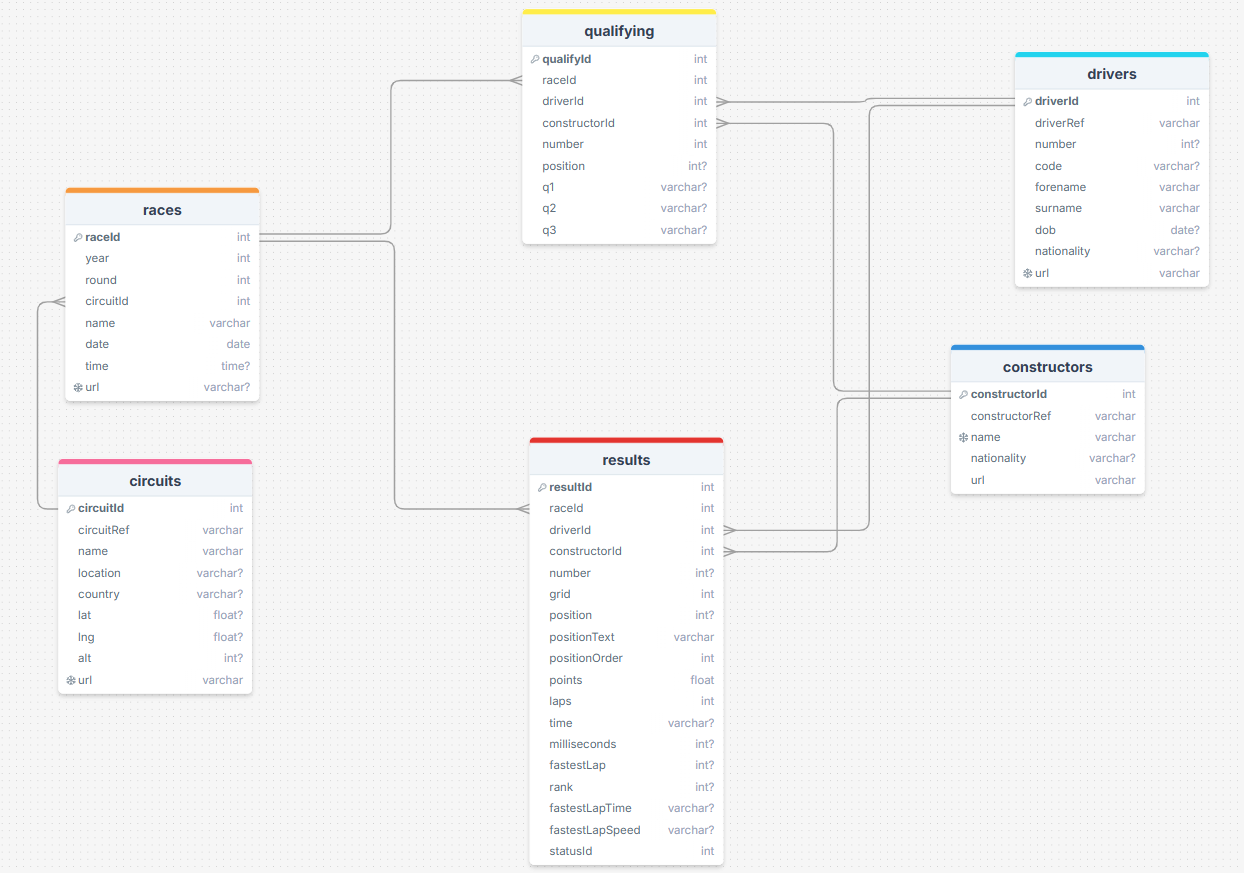
<center>Fig 2.1.1: Database schema of selected tables.</center>

For the races table, there are 1080 rows and 7 columns, with each record reflecting a unique race. Race ID is not sequential. 10 race dates are observed to be null, and 731 race times (67.69% of all races) hold `\N` (missing value). I could not find an obvious reason for missingness. It could not be due to old records, as races as recent as 2021 have missingness.

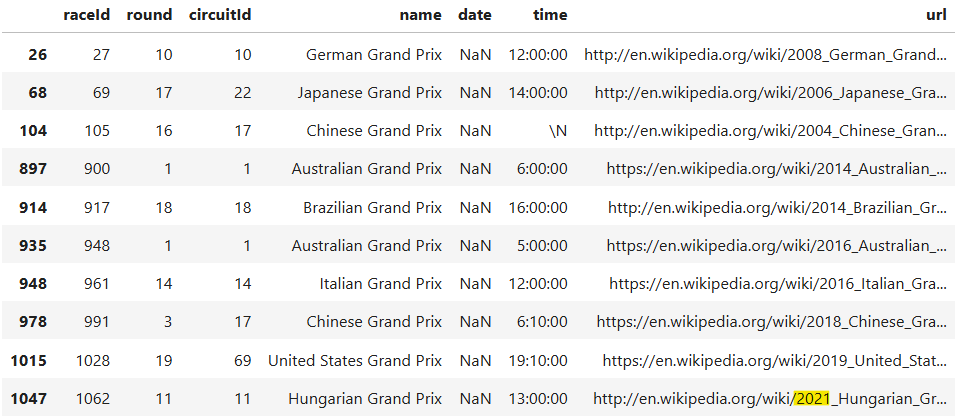
<center>Fig 2.1.2: Races across various years have missing race date.</center>

For the qualifying table, there are 9,135 rows and 9 columns. Qualifying records hold information for 426 races - a far cry from the races table. It’s noted that the maximum number of times a driver appeared was approximately 300, and for constructors, it was approximately 800. Qualifying also held several missing qualifying times, where if a qualifying round time was missing, then subsequent qualifying rounds will also have missed time. I’ve also noted that around 6,166 rows (or 67.50% of all rows) have at least 1 `/N` or null in qualifying time records, which could be due to disqualification or old records.

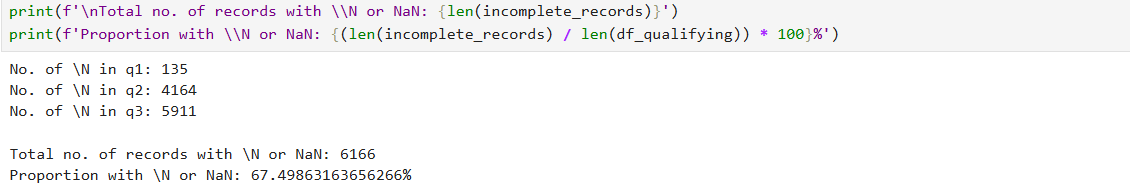
<center>Fig 2.1.3: Presence of NaN and \N values.</center>

For the constructors table, there are 211 rows and 5 columns. For the drivers table, there are 854 rows and 9 columns. These 2 tables will be wrangled later on, where I could have a running total or average for them.

For the circuits table, there are 79 rows and 9 columns. The altitude column was observed to be of object type when it should be of numeric type. In looking at its values, I noted 2 values containing `\N`, indicating missingness in data. These 2 values can be imputed with actual values from a quick search online.

For the results table, there are 25,399 rows and 18 columns. Several numeric columns are of object data type, so I suspect the presence of `\N` values again. My suspicions are confirmed when up to 18,590 rows have that value – that’s 75.19% of all records, which might make imputation difficult later. In checking the appearance of drivers and constructors, unique drivers have appeared up to approximately 350 times, and approximately 2200 times for constructors.

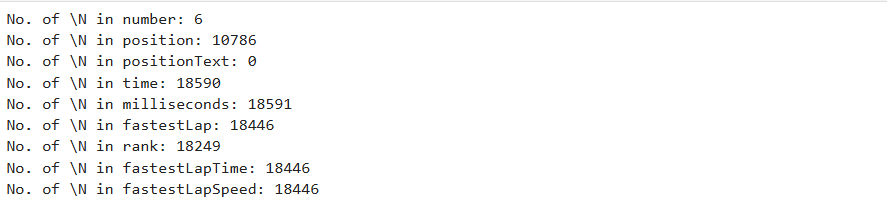
<center>Fig 2.1.4: Number of \N values in the results table.</center>

### 2.2. The prediction problem <a id="part2.2"></a>
Given my exploratory data analysis and [section 1](#part1), the goal of my project would be to predict the grand prix rank of a driver, given information from these 6 tables (excluding information obtained only during the race itself). Based on my prior knowledge, raw ranks are heavily influenced by penalties, so my target will be the rank based purely on time to complete the race. Looking at the tables, I have derived potential predictors as follows.

1. **Month** of race
2. **Hour** of race
3. Qualifying **position** (based on time alone)
4. **Mean** qualifying time
5. Number of qualifying **rounds**
6. Difference from the **best mean qualifying time** of the qualifying weekend
7. Difference from the **circuit record** mean qualifying time
8. Running count of **constructor participation**
9. Running count of **driver participation**
10. Running **average of driver's** rank
11. Running **average of constructor's driver** rank
12. **Altitude** of circuit
13. Official **grid** position

## 3. Data Wrangling on multiple tables <a id="part3"></a>
### 3.1. Preparing tables individually & feature engineering <a id="part3.1"></a>
With the goal of obtaining a centralised table with the mentioned columns in [section 2.1](#part2.1), the following are the steps performed.

For the races table, I extracted the month from race date (via `month_extraction` function) and the hour of race from race time (via `hr_extraction` function), while dropping irrelevant columns. I was left with 1,080 rows (same as before) and 4 columns – 2 identifiers and 2 new columns.

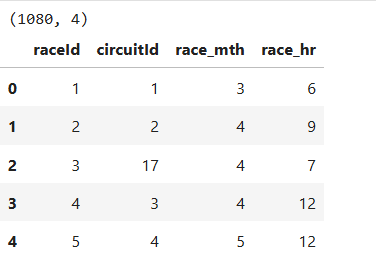
<center>Fig 3.1.1: Subset of final races table.</center>

For the qualifying table, I filtered for relevant columns and renamed `position` to `qual_position` to prevent confusion. I replaced all instances of `\N` and null with 0 in qualifying time records. Next, I converted the qualifying time strings to minutes (numeric data type) (via `time_convert` function), before deriving the mean qualifying time (via `mean_qualifying` function) and number of qualifying rounds. 

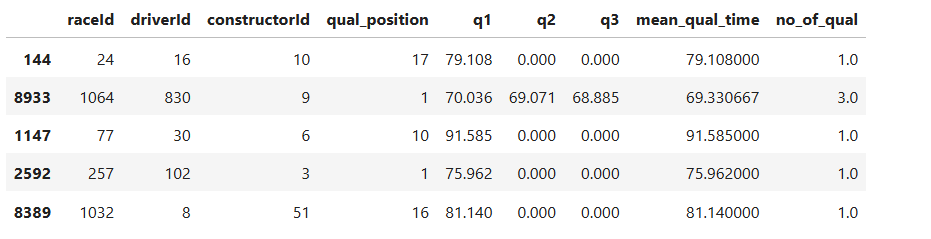
<center>Fig 3.1.2: Subset of qualifying table at this stage.</center>

I then derived the lowest mean qualifying time for each race (`df_qualifying_lowest_time` table) and merged it with the qualifying table, deriving the difference between the current record and the best record. Finally, I derived the circuit’s record mean qualifying time (`record_quals` table) and merged it with the qualifying table, deriving the difference between the current and circuit record.

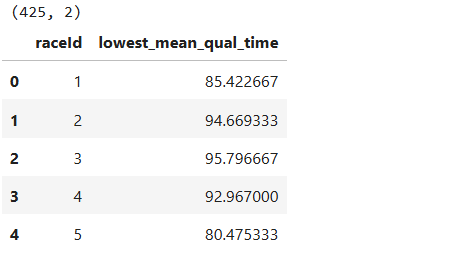
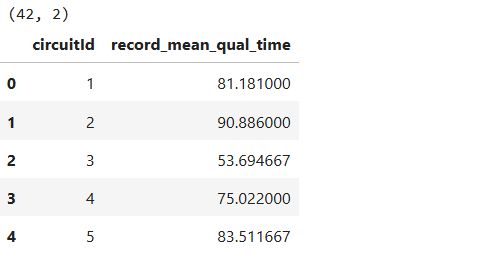
<center>Fig 3.1.3: Subset of df_qualifying_lowest_time & record_quals tables.</center>

To finish, I dropped 2 columns (`lowest_mean_qual_time` and `record_mean_qual_time` since we have the difference), resulting in the table seen in Fig 3.1.4.

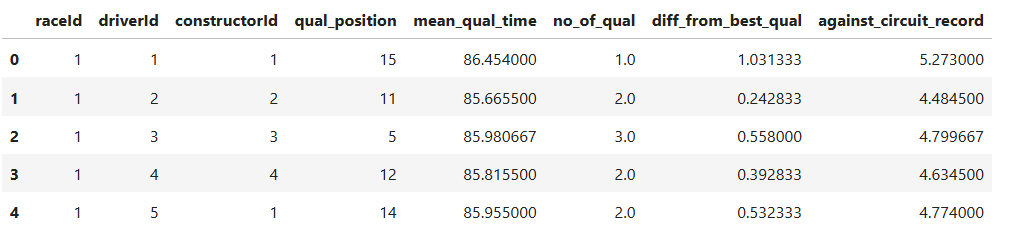
<center>Fig 3.1.4: Subset of final qualifying table.</center>

For the circuit table, I simply filtered to keep only the ID and altitude.

For the results table, I filtered to remove all rows with missing finishing times (`\N` value) and only kept relevant columns. I introduced `time_rank`, the finishing rank based on time only, as defined in [section 2.2](#part2.2), by grouping the races and utilising the `.rank()` function. I then dropped the time (as there’s `time_rank`) and sorted values by race and rank.

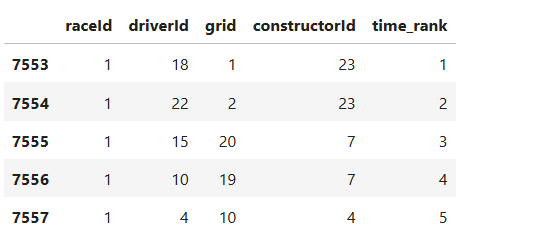
<center>Fig 3.1.5: Subset of final results table.</center>

For the constructors table, I merged it with the results table and introduced 2 columns – running count of constructor and running sum of the driver rank per constructor. I made sure that the running count and sums do not include the current row to prevent data leakage (with `.shift()` that shifts count behind by 1 row), so each value is the running sum/count up to the previous row of the constructor. 

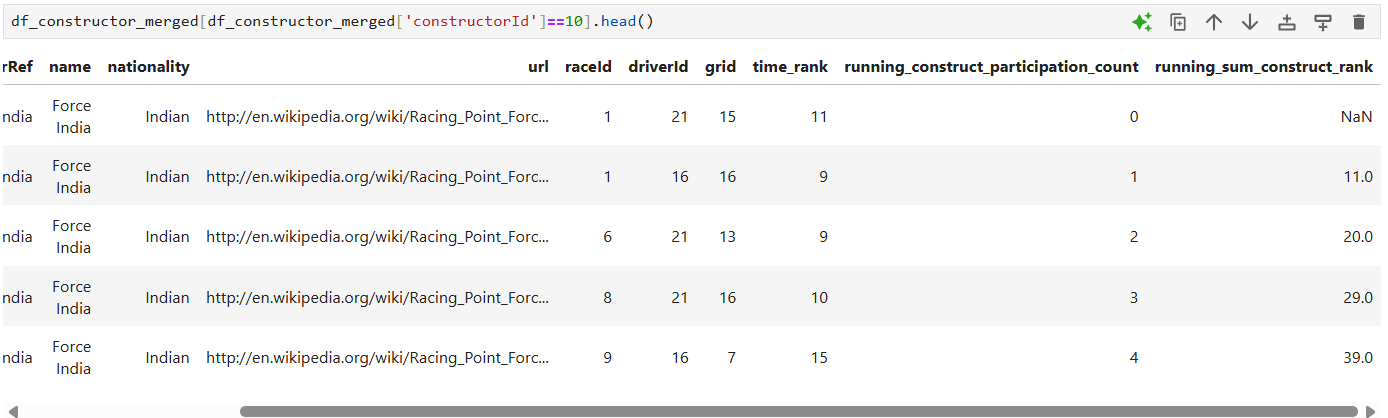
<center>Fig 3.1.6: Example of how running count and sum will work. The current row is not included in the calculation.</center>

Checking the table, the count and sums work as intended, so irrelevant columns were dropped, and the running average of rank was formulated. Lastly, I dropped the running sum (replaced with average). 

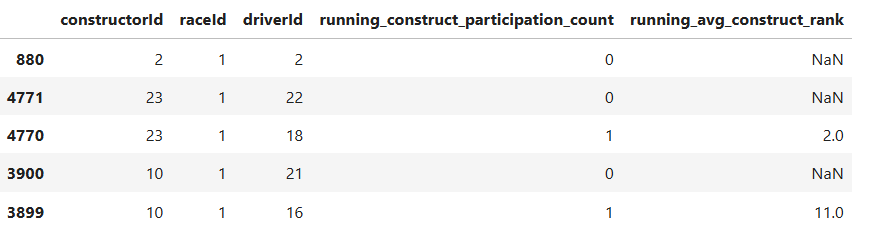
<center>Fig 3.1.7: Subset of final constructors table.</center>

For the drivers table, a similar method to the constructors table was introduced. The driver table was merged with the results table, and columns were filtered. The running count of a driver (to see how many times he has participated) and the running sum of rank was introduced. Then, the running average of rank was introduced, and the running sum of rank was dropped.

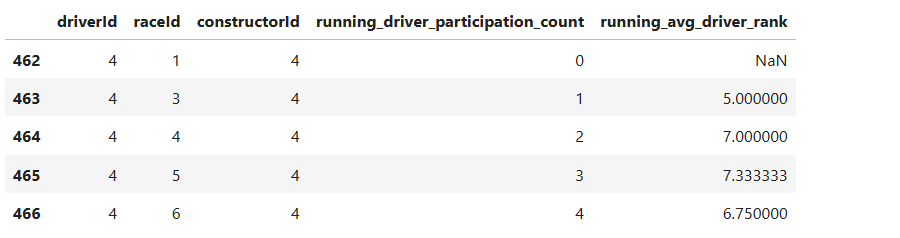
<center>Fig 3.1.8: Example of how running calculations work for drivers table.</center>

### 3.2. Merging all the tables <a id="part3.2"></a>

Merging of the tables was done with respect to the database schema, in the sequence below.

Sequence | Table | Foreign Key(s)
--- | --- | ---
1 | Races | 
2 | Qualifying | raceId
3 | Constructors | constructorId, raceId, driverId
4 | Drivers | constructorId, raceId, driverId
5 | Circuits | circuitId
6 | Results | constructorId, raceId, driverId

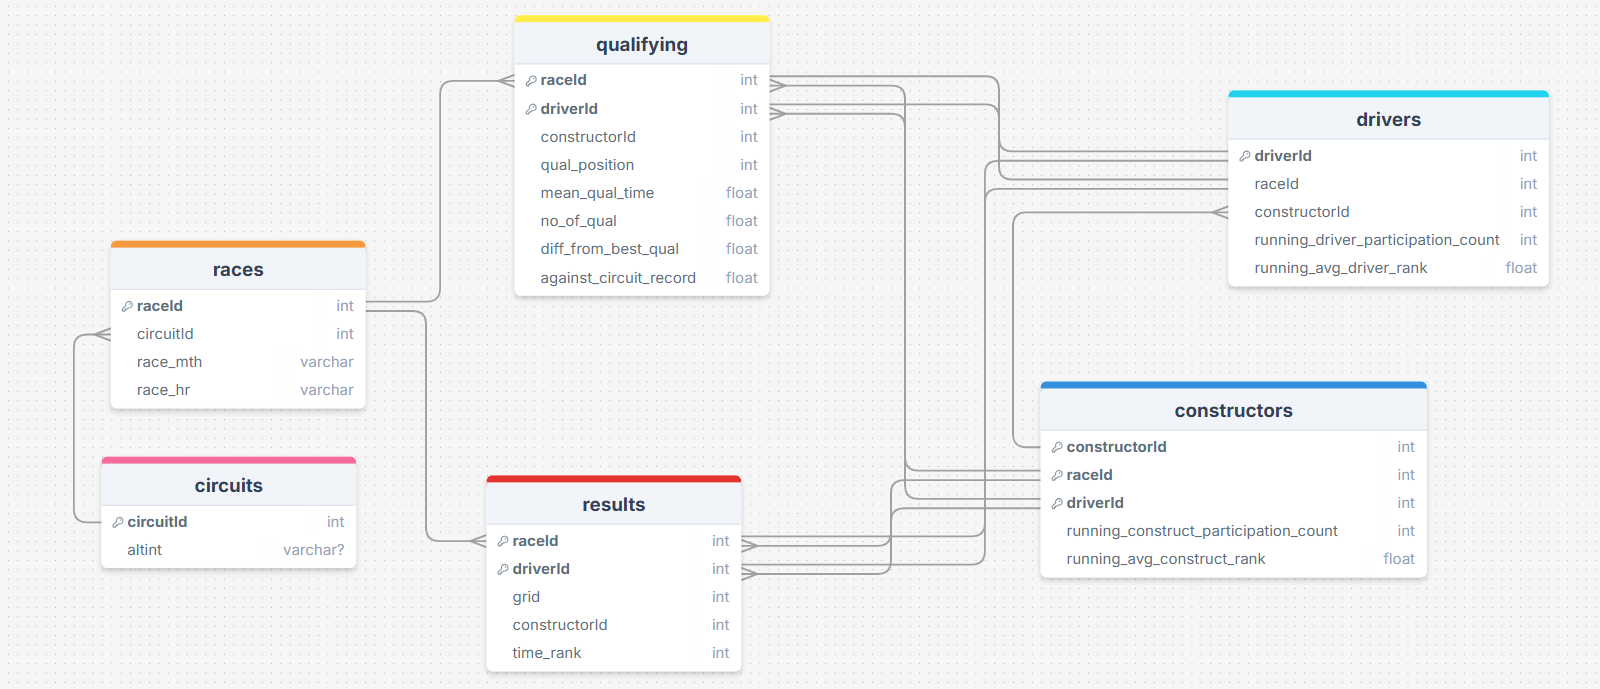
<center>Fig 3.2.1: Updated schema of my tables.</center>

The table has 3,805 rows and 18 columns. While this seems small, it’s reasonable as many official rankings were not derived from actual completion timings (there were 18,590 `\N` values in the raw results table) and were excluded as they don’t align with my project objectives.

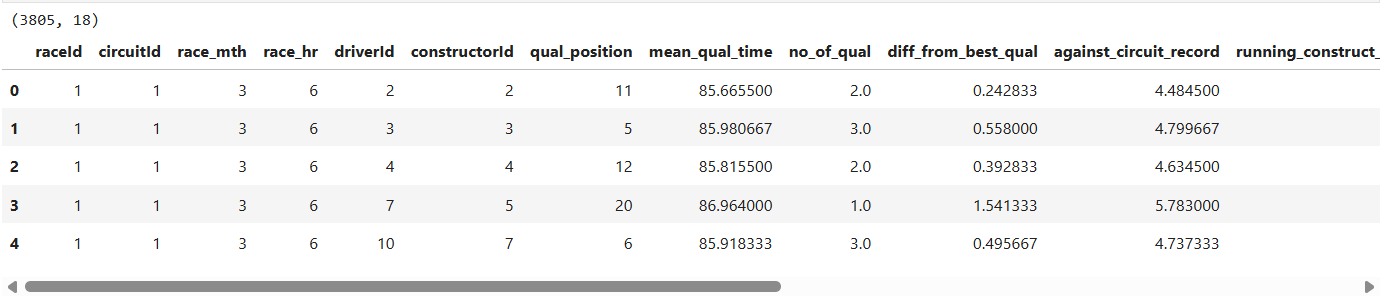
<center>Fig 3.2: Subset and shape of combined table.</center>

## 4. Data Cleansing and Transformation <a id="part4"></a>
### 4.1. Missing value imputation & data transformation preparations <a id="part4.1"></a>
I start by handling missing data. After converting all instances of `\N` to null across the table, 4 columns have null values (`race_hr`, `running_avg_construct_rank`, `running_avg_driver_rank`, and `alt`). The running averages had nulls as it is the first time the constructor / driver participated, and the running count of their participation would be 0; hence, missing values were also replaced with 0. 

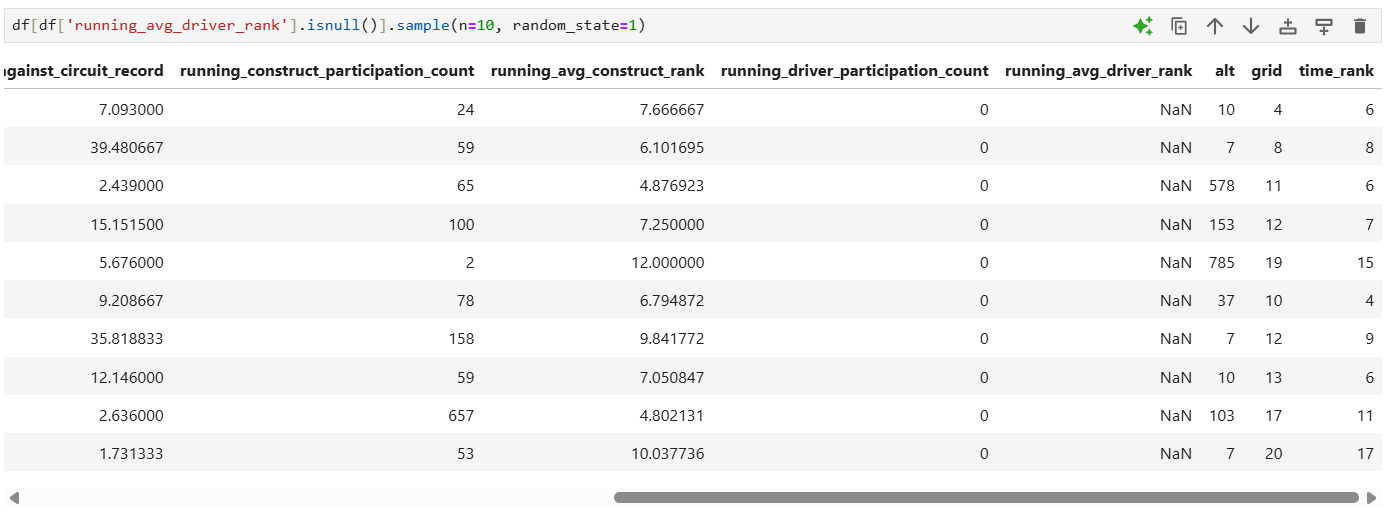
<center>Fig 4.1.1: Nulls in running_avg_driver_rank were a result of driver participation count being 0.</center>

For `race_hr`, data was missing due to old records; as such, records with missing `race_hr` were dropped (as how F1 was conducted in the past will differ from how it is now). For `alt`, 8 records had nulls due to 1 circuit having a missing altitude. A quick internet search allowed me to replace it with its true value.

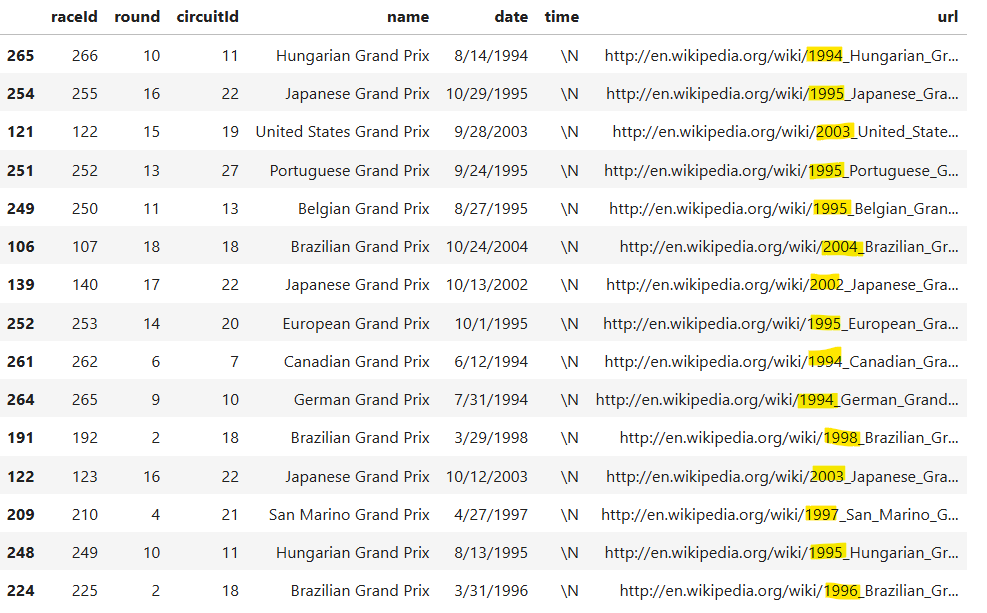
<center>Fig 4.1.2: Most races (with race_hr missing) were before the 21st century - more than 25 years ago.</center>

Lastly, identifiers were dropped, resulting in 3255 rows and 14 columns. Columns were converted to numerical data type, and the dataset was split into training and testing datasets (30% testing).

### 4.2. Outlier handling <a id="part4.2"></a>
Since this is a regression problem, linear regression is utilized. There are 2 assumptions of linear regression I must focus on – residuals should be normalised (not the input columns), and input variables cannot be highly correlated with each other. To help me, I created 4 functions to help achieve these objectives. 

Plotting the residuals, the distribution is quite normalised, but residuals closer to the tails don’t follow normality, and the distribution seems unstable. This may be due to skewedness and outliers in input variables, and I will try to reduce both in data transformation. 

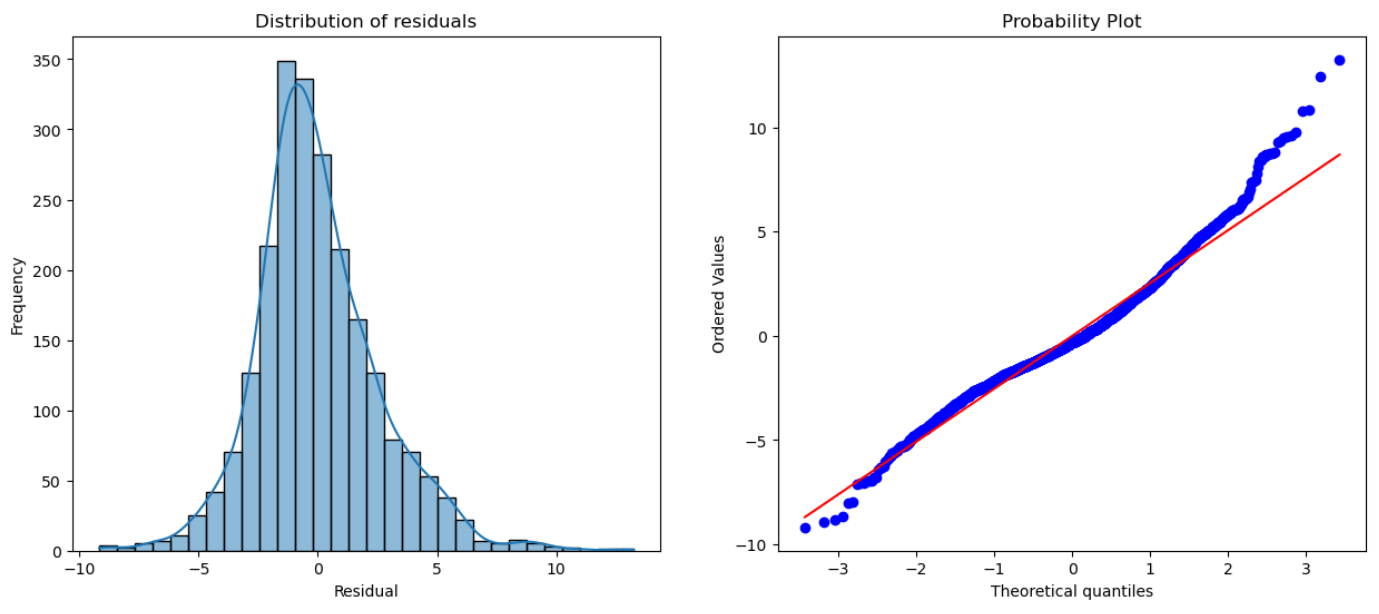
<center>Fig 4.2.1: Distribution of residuals before data transformation. Note the non-normality on both tails.</center>

I first handle extreme outliers, identified in 4 columns (`diff_from_best_qual`, `against_circuit_record`, `running_avg_construct_rank`, `alt`), which are right-skewed. For `alt`, I performed 3% winsorization (capping) as it is a discrete variable. For the rest, looking at the quantile values and distribution, I performed the following.

Variable | Action | Reason
--- | --- | ---
diff_from_best_qual | Winsorization (trimming), 3% to the right | Heavy right-skewedness, 3% trimming will heavily reduce the degree of skewedness.
against_circuit_record | Winsorization (trimming), 1% to the right | Get rid of the small outlier observed around value of 60.
running_avg_circuit_record | Winsorization (trimming), 1% on both tails | Outliers on both tails, remove a small amount of extreme outliers


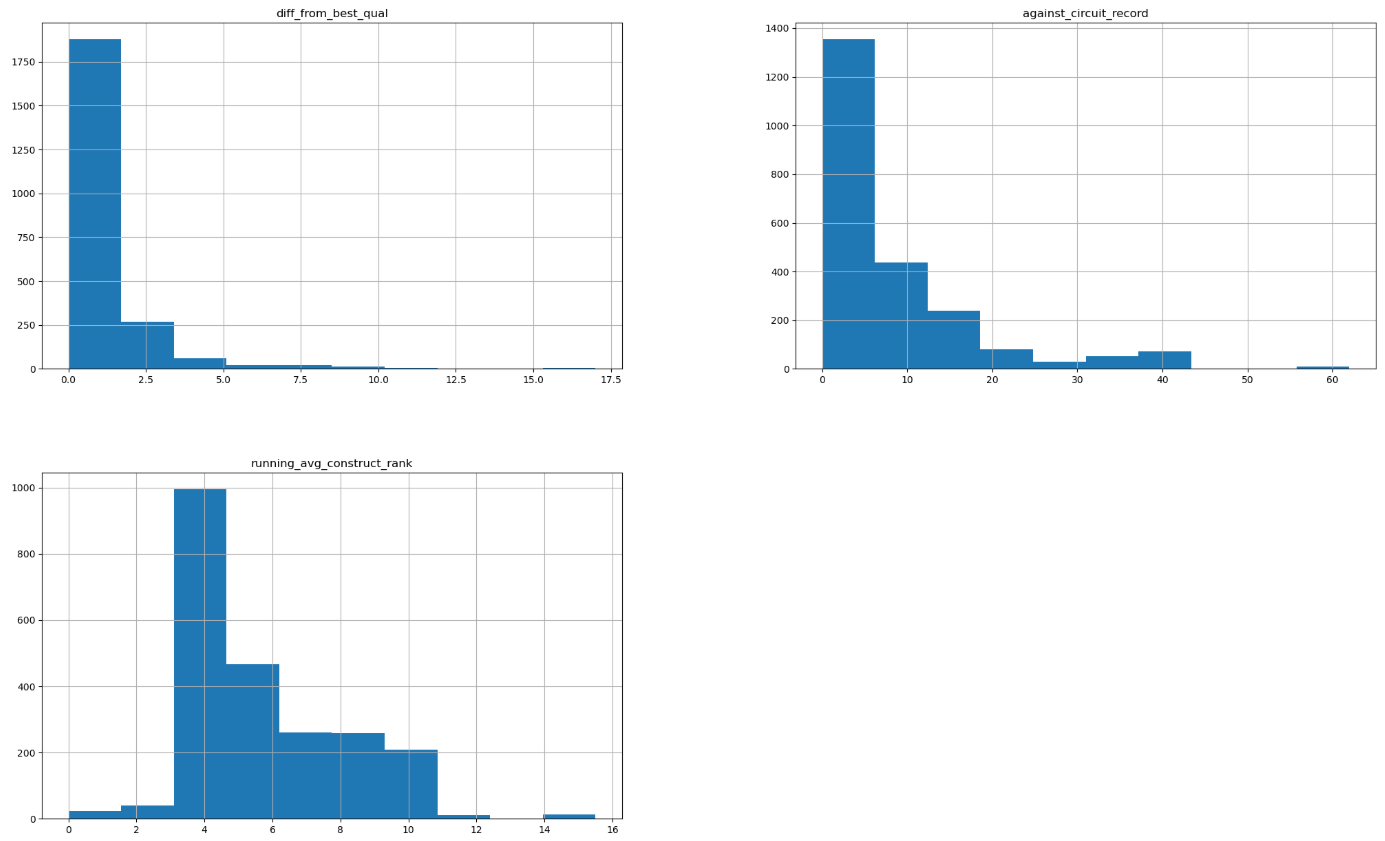
<center>Fig 4.2.2: Distribution of variables with outliers <b>before</b> transformation.</center>

This was done on the training and testing datasets. As a result, extreme outliers were removed, which may improve model performance.

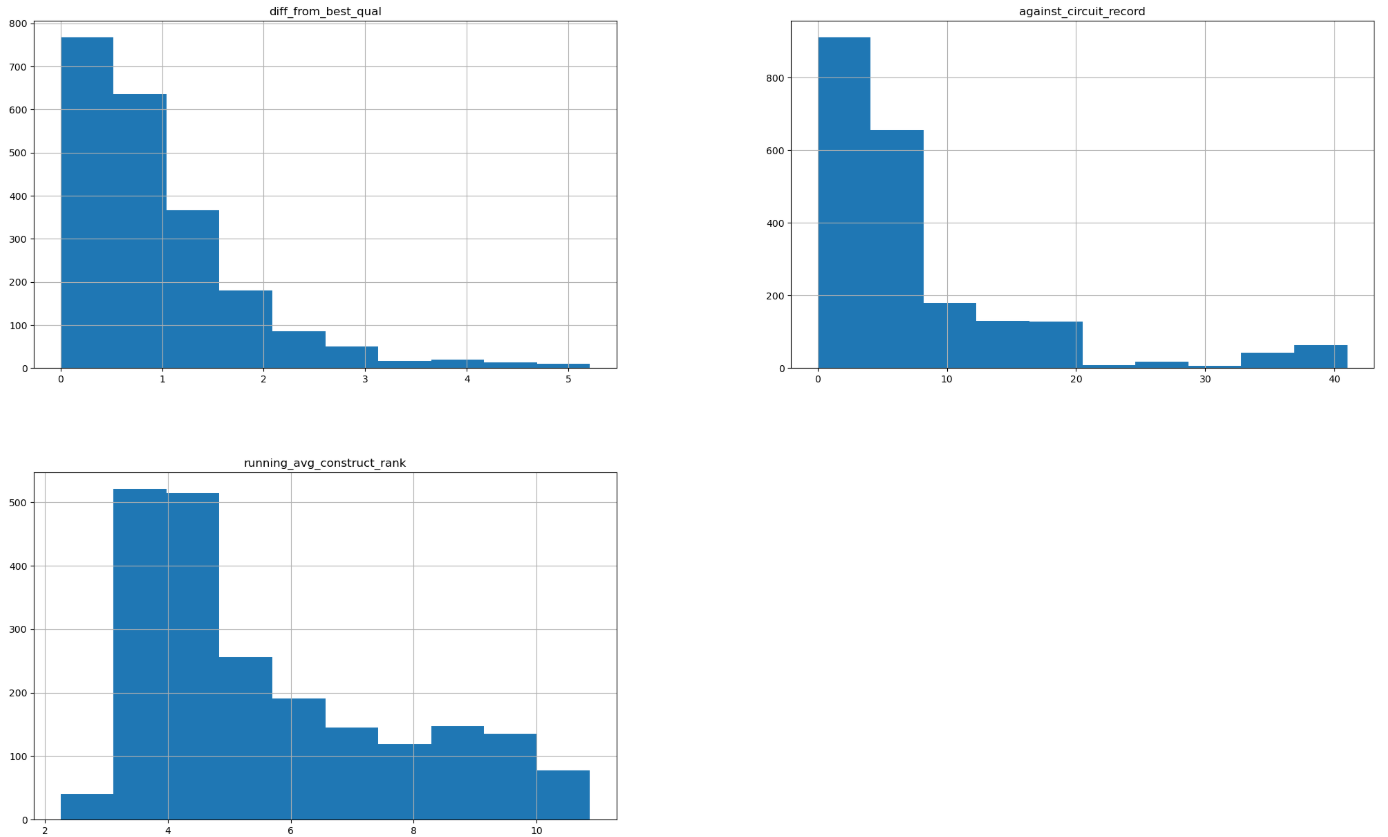
<center>Fig 4.2.3: Distribution of variables with outliers handled via transformation.</center>

### 4.3. Data encoding & discretization <a id="part4.3"></a>

Moving onto discretization and encoding, `race_hr` won’t hold any significant predictive power over rank, so it was One-Hot Encoded into `morning_race` (up to 8am) and `afternoon_race` (up to 4pm), and `evening_race` is intentionally left out. For `alt`, due to its discrete nature, I performed equal frequency discretisation, grouping into 4 groups. 

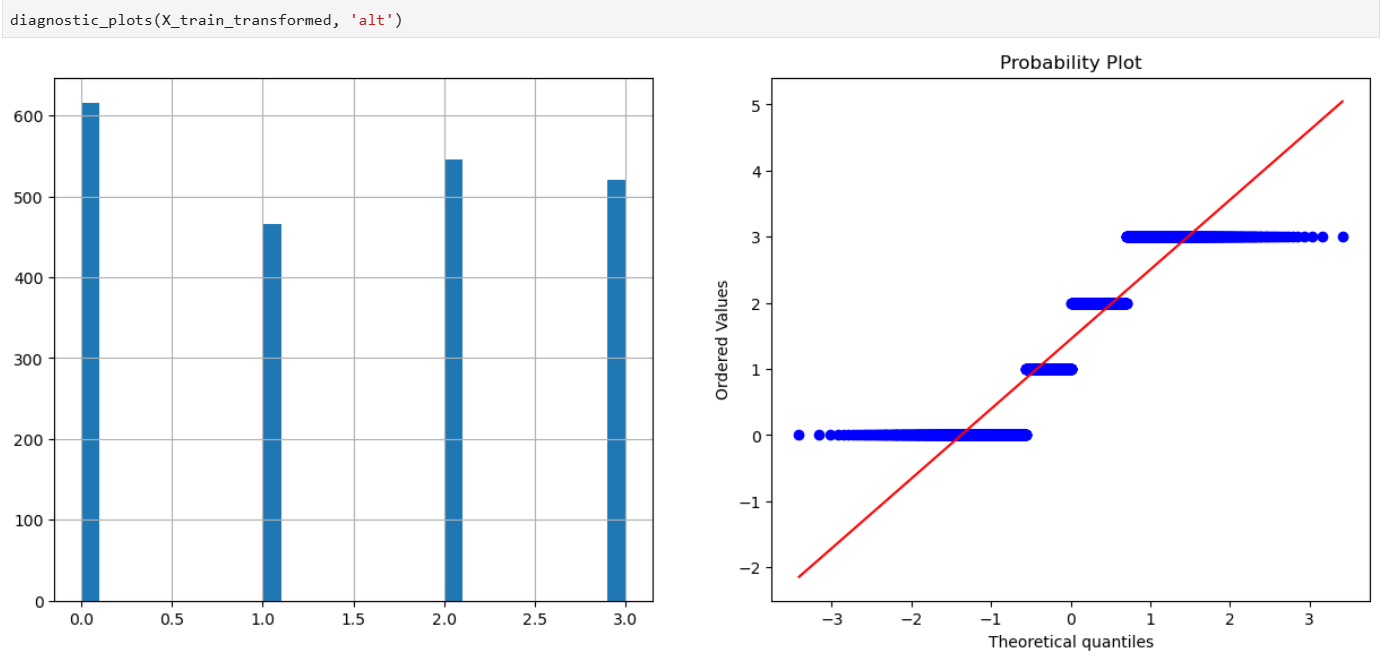
<center>Fig 4.3: Distribution for altitude column.</center>

### 4.4. Numerical data transformation <a id="part4.4"></a>
Data transformation helps reduce skewedness of the remaining variables. I tried 2 methods on identified skewed variables:
1. Log transformation if it is positive (powerful in normalising skewed data)
2. Yeo-Johnson transformation if it has 0 or negative values (can normalise all numeric data).

This technique of trying 2 methods worked for all variables except `running_construct_participation_count` (still left skewed) and `running_avg_construct_rank` (has outliers on the left).

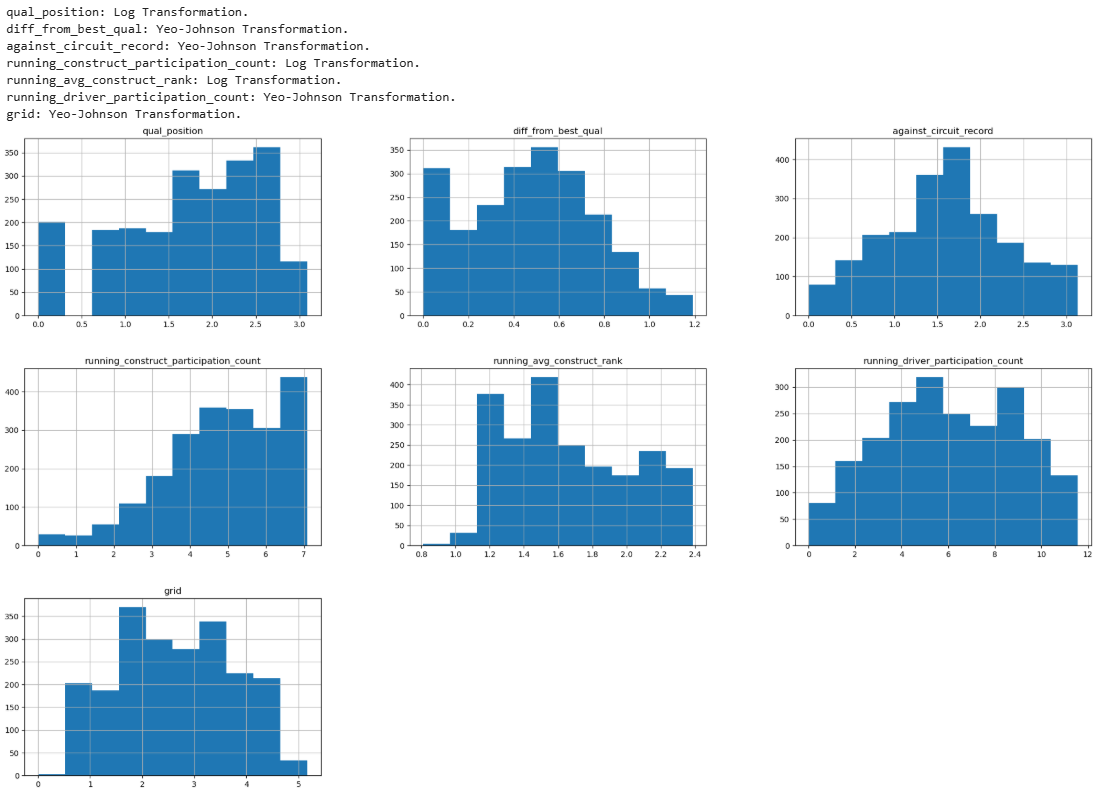
<center>Fig 4.4.1: Trying log transformation and Yeo-Johnson transformation on skewed variables.</center>

After transforming the successful variables with their corresponding transformation techniques, I tried 2 more transformation techniques on the remaining 2 variables – Box-Cox transformation and reciprocal transformation. Box-Cox transformation works well for `running_construct_participation_count` and will be applied, but no transformation seems to fit `running_avg_construct_rank`, so it will be left as its raw data.

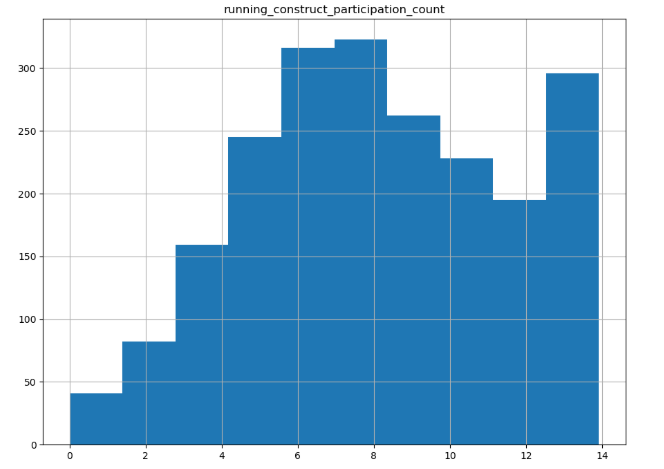
<center>Fig 4.4.2: Impact of Box-Cox transformation on running_construct_participation_count.</center>

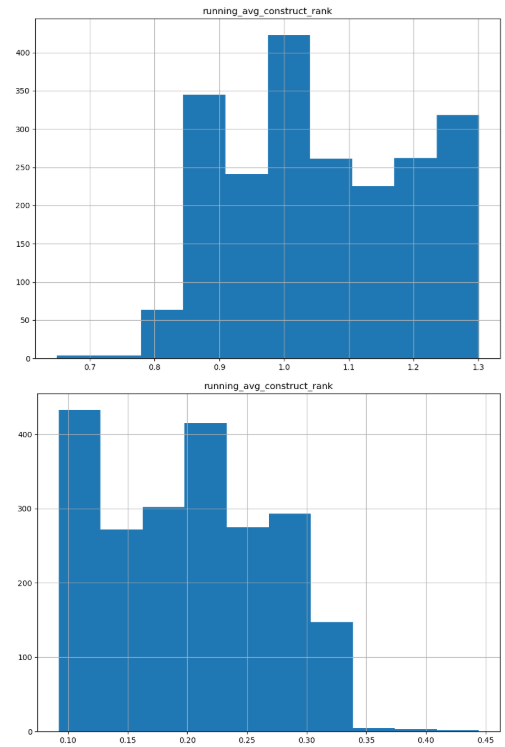
<center>Fig 4.4.3: The remaining transformation techniques will result in outliers for running_avg_construct_rank.</center>

Now looking at the untouched variables, they are neither skewed nor possess outliers, so they will be left as their values. 

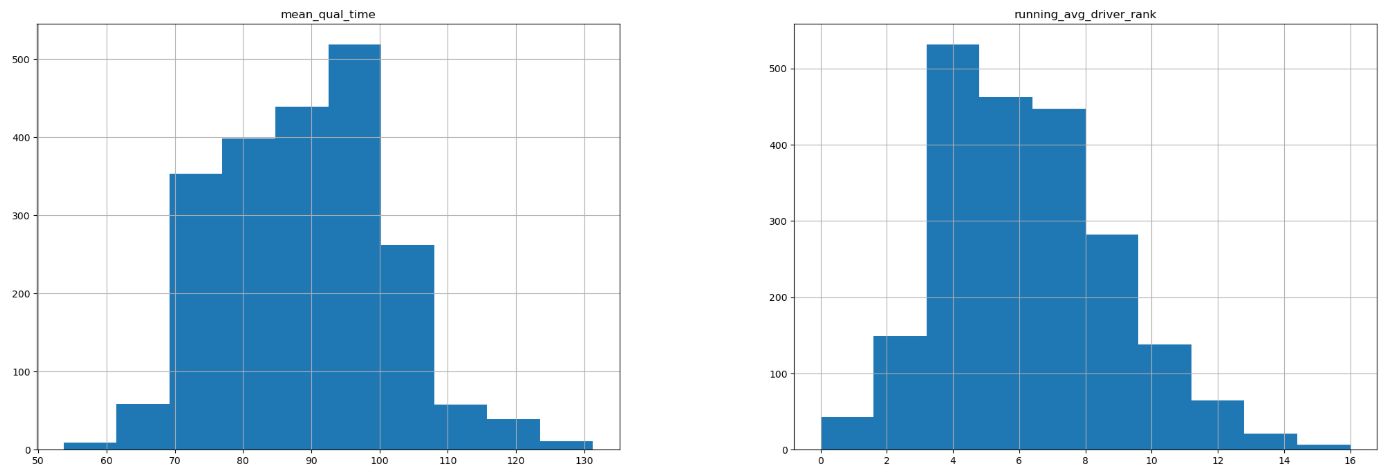
<center>Fig 4.4.4: There's no need to transform the remaining 2 variables.</center>

### 4.5. Correlation analysis & Conclusion <a id="part4.5"></a>
Focusing on the 2nd assumption of no high correlation between input variables, `qual_position` and `grid` have a correlation of 0.94, due to their similar purpose - `qual_position` is the presumed grid position based on time, whereas `grid` factors in penalties. 

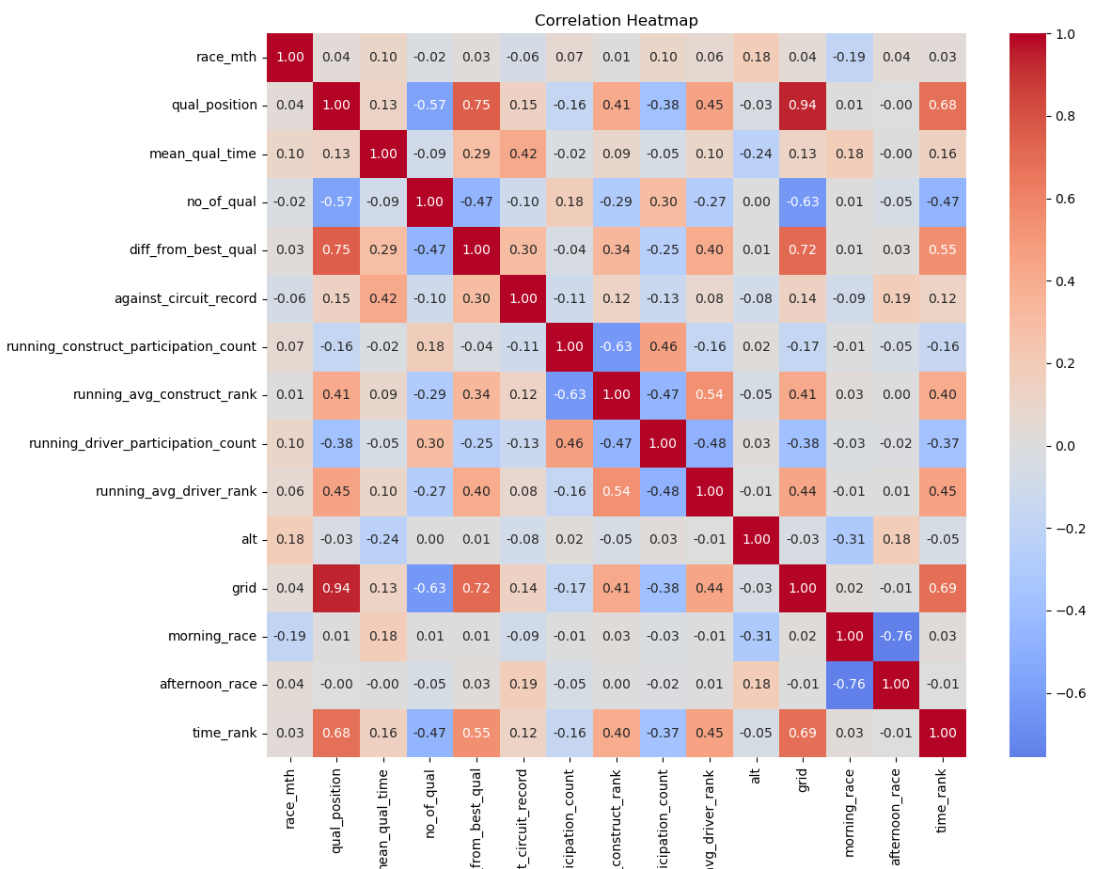
<center>Fig 4.5.1: Note the high correlation between the 2 mentioned variables.</center>

As such, `starting_pos` is introduced to take the average of both columns. With this new column, `qual_position` and `grid` are dropped, and the 2nd assumption is satisfied.

To conclude, the residual distribution is better. The distribution is more stable, left tail resembles a normal distribution, and outliers are handled. While the right tail might seem deviated from normality, this is due to extreme residual predictions.

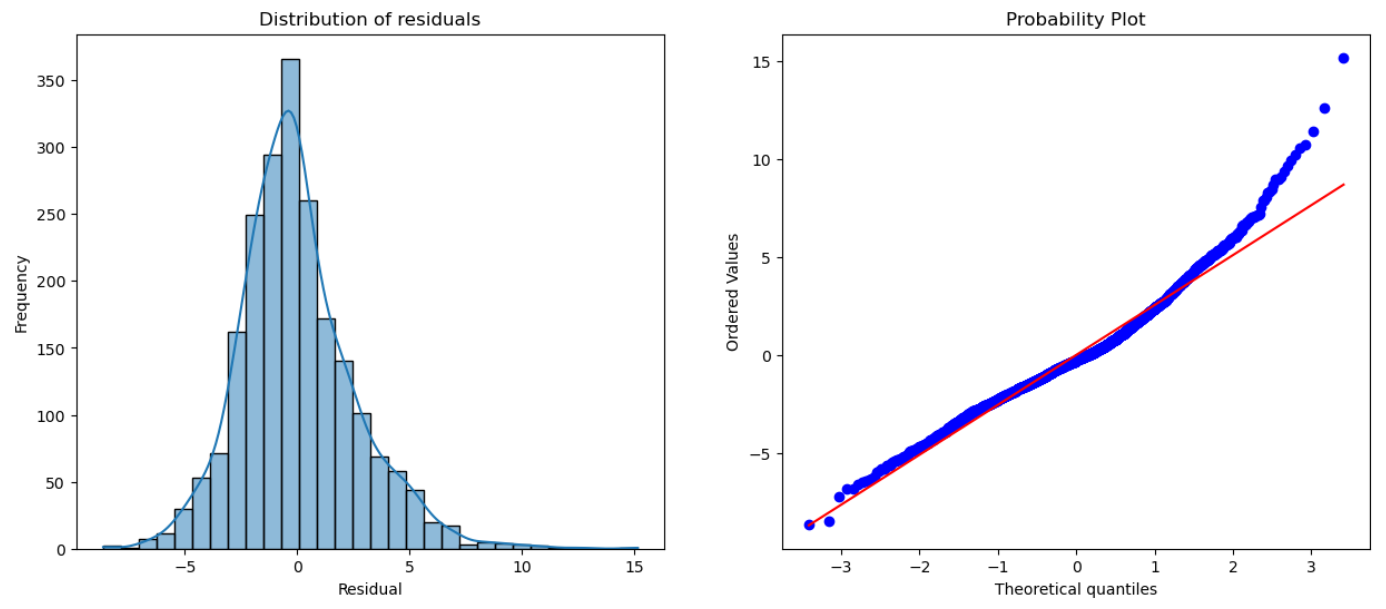
<center>Fig 4.5.2: Resulting distribution of residuals.</center>

## 5. Machine Learning Model <a id="part5"></a>
At this stage, the training dataset has 2,147 rows and 13 columns, and the testing dataset has 937 rows and 13 columns. 

### 5.1. Naive Baseline Model <a id="part5.1"></a>
I start by introducing a Naive Baseline Model, which will always predict the target mean. The results are as follows.

Dataset | R^2 | Mean Absolute Error (MAE) | Root Mean Squared Error (RMSE)
--- | --- | --- | ---
Train | 0.0 | 3.076 | 3.731
Test | 0.0 | 3.131 | 3.772
Gap | 0.0 | +0.055 | +0.041


Interpreting the results, on average, the Naive Baseline Model has an error of approximately 3 ranks, approximately 15.79% of the target range. An R^2 of 0 means that no variance is explained at all, which is expected.

### 5.2. Linear Regression Model <a id="part5.2"></a>
Now building the Linear Regression model, I obtain the following results.

Dataset | R^2 | MAE | RMSE
--- | --- | --- | ---
Train | 0.521 | 1.934 | 2.581
Test | 0.539 | 1.926 | 2.561
Gap | +0.018 | -0.008 | -0.020

Interpreting the results, on average, the model predictions deviate from the actual rank by 2 positions. The model is also able to explain approximately 54% of the variance. Additionally, the gaps are very small and negligible – I’m not concerned that the testing dataset performs better, given that the overall dataset is small. 

While the errors may seem large, I find these results reliable and errors acceptable, due to the following reasons.

1.	F1 rankings are heavily influenced by actual race conditions (such as penalties, weather conditions, even accidents which are obviously unforeseen), so past performance can only act as a moderate predictor of actual rankings.
2.	There are many unaccounted factors that were not included in this project. They range from factors not available in the dataset (e.g. aforementioned in reason 1), to intangible factors (e.g. driver’s health and state of mind).

In the earlier correlation heatmap, some variables were observed to have low correlation with `time_rank`. By using the `stats_models.api` package, I removed 6 non-influential predictors and achieved this new score.

Dataset | R^2 | MAE | RMSE
--- | --- | --- | ---
Train | 0.520 | 1.936 | 2.586
Test | 0.537 | 1.925 | 2.568
Gap | +0.017 | -0.011 | -0.018

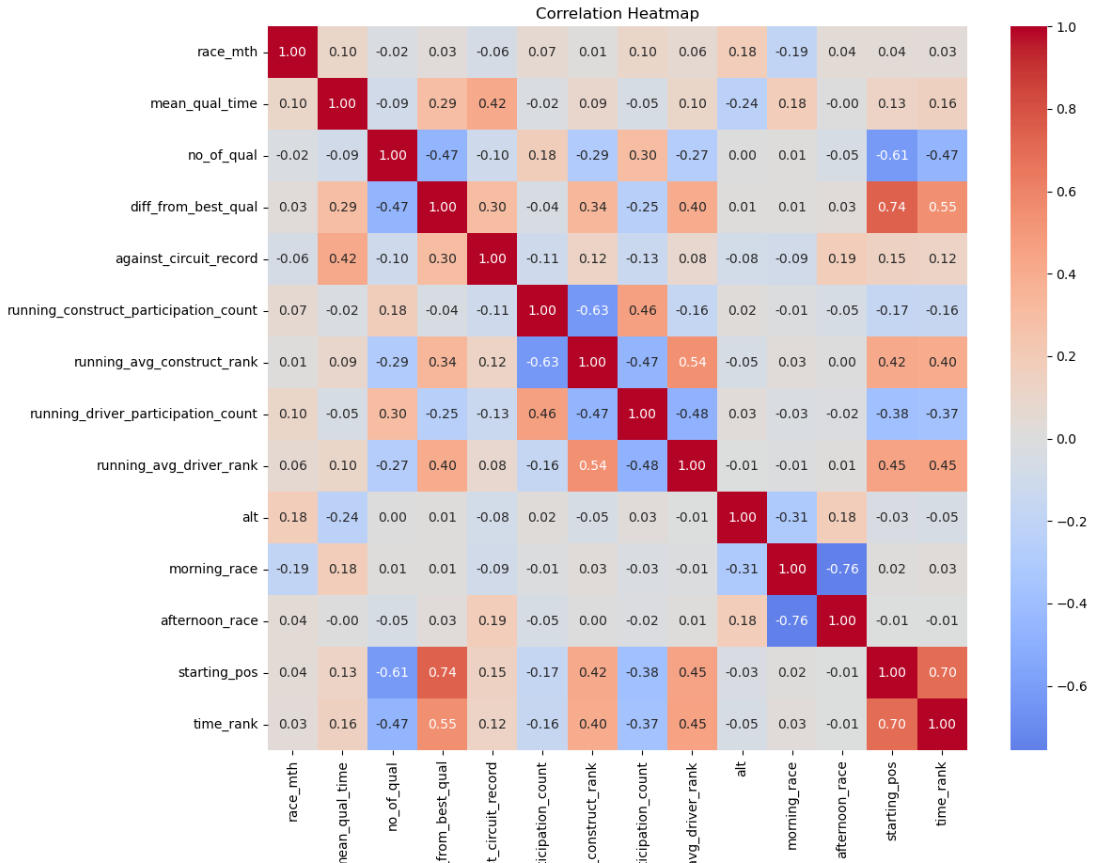
<center>Fig 5.2: Correlation heatmap (note the correlations on the last column of time_rank).</center>

There is a very small increase in error that’s negligible, so removing non-influential predictors wasn’t that useful. As such, I will use the previous linear regression model.

### 5.3. Comparing the 2 models <a id="part5.3"></a>
There has been a huge improvement from the Naive Baseline model to the linear regression model.

Model | R^2 | MAE | RMSE
--- | --- | --- | ---
Naive Baseline (test) | 0.0 | 3.076 | 3.731
Linear Regression (test) | 0.539 | 1.926 | 2.561
Gap & Percentage improvement | +0.539 | -1.15 (-37.4%) | -1.17 (-31.4%)

The error has decreased by an entire rank, and errors saw around a 30-40% decrease. Additionally, the increase in R^2 of almost half the maximum range proves model satisfaction. 

## 6. Summary and Further Improvements <a id="part6"></a>
### 6.1. Summary of findings <a id="part6.1"></a>
To summarise the processes, 6 tables were utilized (Races, Qualifying, Constructors, Drivers, Circuits, Results) and had rows and columns filtered. New columns, such as running calculations or group-wide operations, were feature-engineered, and these tables were merged via foreign keys (identifiers) – producing 3,805 rows and 14 columns.

Next, missing values were either replaced based on logic or dropped. Data transformation was targeted at normalising residuals and preventing high correlation between input variables. A myriad of techniques, from discretisation to transformation techniques like Yeo-Johnson and Box-Cox were deployed to reduce skewedness, while 1 pair of variables with high correlation was handled accordingly. 

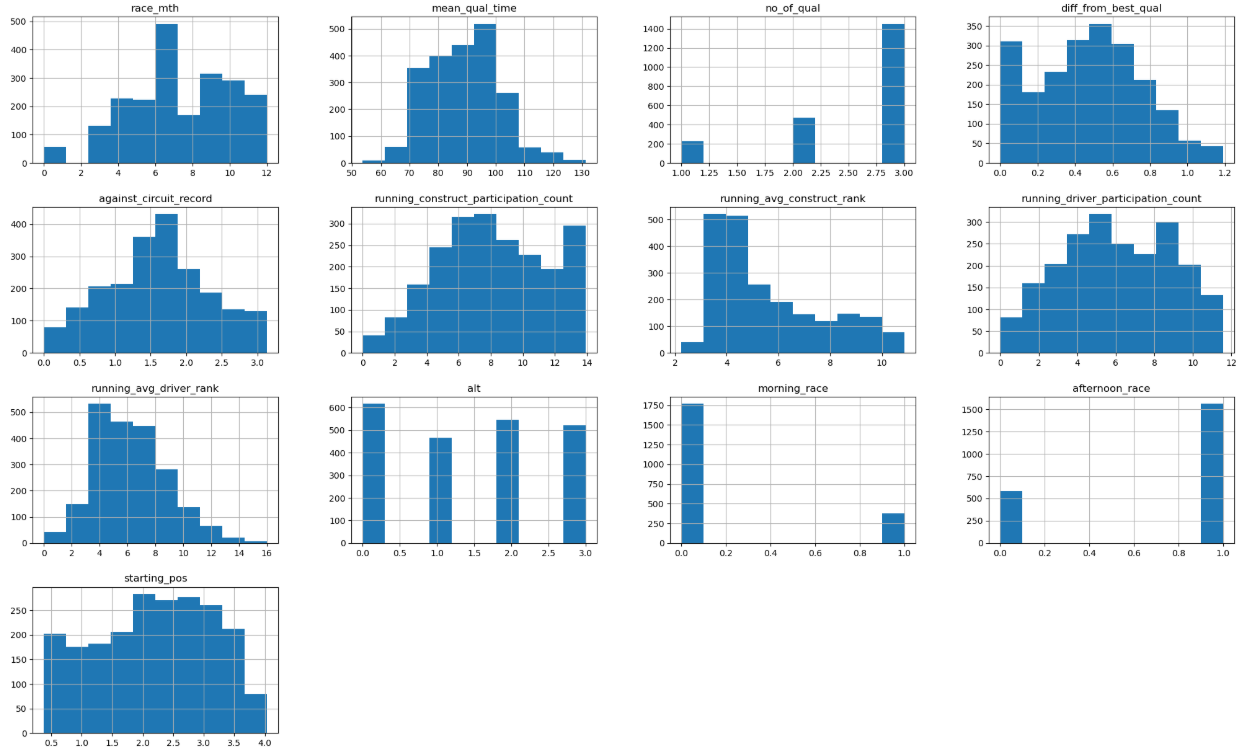
<center>Fig 6.1.1: Distribution of variables after transformation & correlation analysis.</center>

Finally, the project ends with machine learning models, where a Linear Regression model was built and compared against a Naive Baseline model, with the linear regression model performing approximately 35% better in terms of errors.

In investigating what causes extreme residuals (>3 standard deviations from 0), 21 rows show high residuals, and most of them are between rank 12 to 15. This is expected, as in the actual race, overtaking lower ranks (weaker racers) is far easier than overtaking higher ranks (stronger racers), so the performance between qualifying and grand prix for these players will differ strongly. 

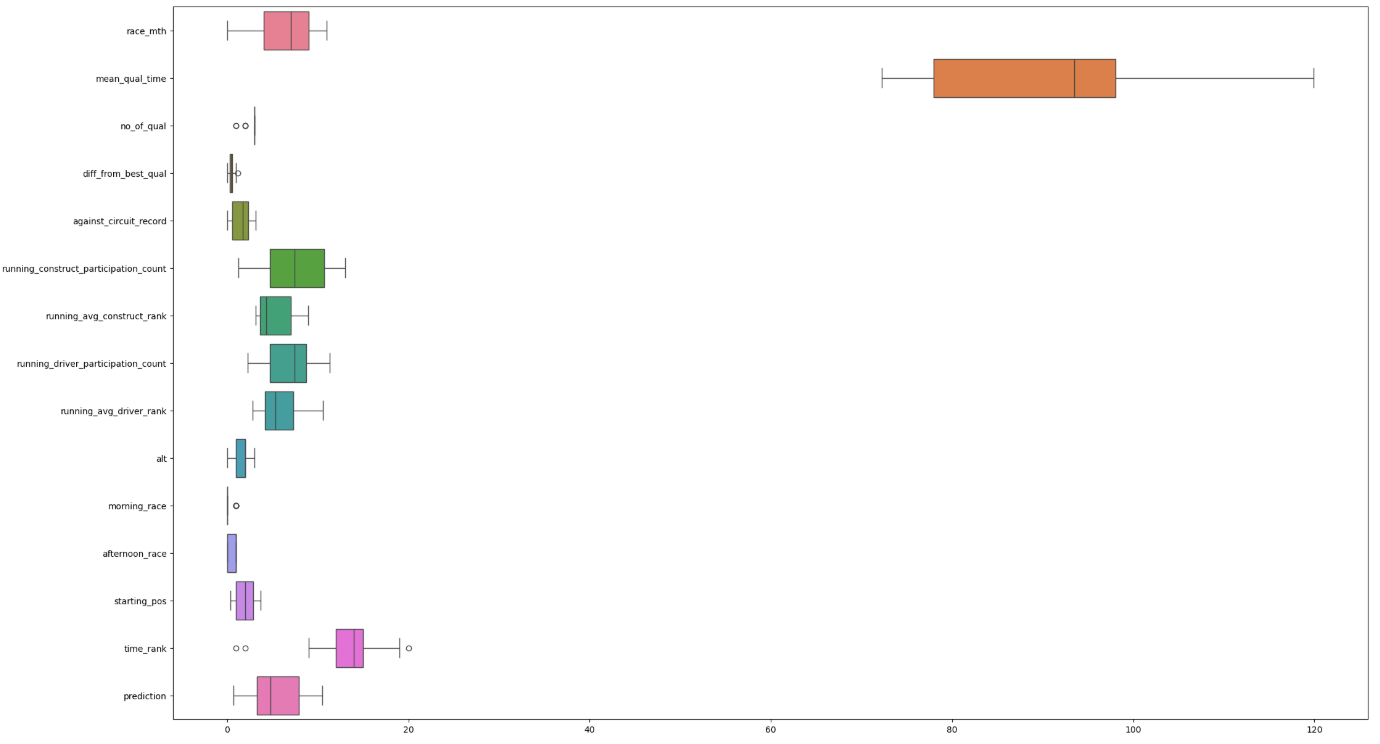
<center>Fig 6.1.2: Box plot of records with residual exceeding 3 standard deviations from mean (0).</center>

### 6.2. Possible further improvements <a id="part6.2"></a>

Further improvements are possible. They are as follows.

1.	Too many columns were realised to be non-influential predictors towards the end. More careful and thoughtful feature selection can be performed to prevent extra efforts in handling useless columns while improving the scores.
2.	Many rows were dropped, resulting in a small dataset during data merging. It is worth investigating why the dataset size had drastically reduced and address the issue. For example, if it is due to 1 feature, the feature could be dropped to preserve more rows.
3.	In analysing the residual plot, the distribution has a long right tail (extreme residuals), which was deemed to be due to low ranks. More techniques (e.g. transforming the target variable itself) or preserving more data (building on point 2) could be utilised.

Nevertheless, given the nature of the F1 dataset and our model performance, I will say that this project is a success, and further improvements can potentially improve model performance. 

## 7. Reflection <a id="part7"></a>
Reflecting on my module experience, I learnt how data wrangling acts as the foundation in any machine learning project. My biggest takeaway is that there’s no definite or ‘correct’ method to handle data, as there are many factors controlling what I (as a data wrangler) can do. For example, Linear Regression assumes normality in residuals, so my data transformation should not focus on normalising input columns like I usually would. Another takeaway is that I must invest time in exploratory data analysis before I start transforming data. For instance, when I started this assignment, I immediately hopped onto merging data, but found it difficult to continue data cleansing as I didn’t know the most suitable method for variables that are foreign to me.

With my 2 key takeaways in mind, I feel that what I’ve learnt in this module will benefit me practically with anything related to data science. There are so many applications of data wrangling that data wrangling is probably one of the most important skills a data scientist must have. For instance, the most obvious example is machine learning models, where encoding techniques are needed to convert categorical data. At this stage, the next period where I would need this skillset would likely be my capstone project or internship, where I need to apply data wrangling independently to solve real-world problems for my stakeholders.

Thinking back, what surprised me the most was how much time is spent on data wrangling. When my lecturer initially pointed out that 50-80% of time is spent on data wrangling, I was not convinced and thought more time is spent on model hyperparameter tuning. However, this assignment (and the Machine Learning module assignment) really highlighted how slow and steadily it must be done, as rushed data wrangling would lead to poor data and poor models. I found myself going through the data wrangling cycle multiple times, going back and froth between stages (especially data discovery and data cleansing) and investing so much more time on handling data over building the linear regression model.

Now, if I could redo my practicals, one thing I would change is to do it slowly and without relying too much on the class examples or large language models. Because I had other modules’ work to do, I used to rush through the practicals, copying and pasting the code template and changing variable names. Then when it came to doing it without reference (e.g. during this assignment, where it’s impossible for me to copy and paste everything), I found myself a little stuck and had to spend quite some time looking back at class exercises and relearning the code concepts. 

For this assignment, if I could, one thing I would have changed is to start doing this assignment earlier, and not until 1 week prior to submission. I underestimated how complex it was to understand, merge, and transform data within a short time frame, and found myself rushing a little to complete this assignment properly. Like I said earlier, most of the time is spent on data wrangling, so I should have been aware of that in determining when to start this assignment.

Reflecting on my learning process, what could have helped is that I should have been more proactive and not shy to ask my lecturer any questions I had, especially when it wasn’t class time. When I had queries, I usually resorted to asking my classmates, which mostly ended in both of us being confused, or me getting the wrong answer. While there was the AI learning assistant which helped to an extent, it also sometimes provided me with incorrect information or hallucinated. Yes, AI assistants are very knowledgeable, but given the risks of using these assistants, I think that asking an expert (my lecturer) would have been the most effective. 

All in all, I enjoyed this module and felt that this module is probably one of the most important modules I will learn, as it lays the foundation for basically everything. Thinking back, I could have taken some steps or measures to ensure I maximise my learning experience, but I do not regret my experience with data wrangling. 

## 8. References <a id="part8"></a>

##### References (information)
Drijgers, M. (2024, Nov 29). <i>Hitting the Apex: Lusail International Circuit</i>. https://www.alongtheracingline.com/hitting-the-apex-lusail-international-circuit/

Formula 1. (2025). <i>Everything you need to know about F1 – Drivers, teams, cars, circuits and more</i>. https://www.formula1.com/en/latest/article/drivers-teams-cars-circuits-and-more-everything-you-need-to-know-about.7iQfL3Rivf1comzdqV5jwc


##### References (code)
pandas. (n.d.). <i>pandas.DataFrame.rank</i>. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rank.html

pandas. (n.d.). <i>pandas.core.groupby.DataFrameGroupBy.cumcount</i>. https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.cumcount.html